In [1]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
import csv
import scipy.stats as st
import csv
import seaborn as sns; 
import pandas as pd
%matplotlib inline
import csv
import math
sns.set_theme(style="white", palette=None)

In [2]:
import seaborn as sns
import pickle

def save_result(file_path, inst, n_arr, y_arr):
    pickle.dump([n_arr, y_arr], open(f"./test_arrys_{file_path}.pickle", "wb"))
    inst.savefig(f"./test_fig_{file_path}", format='eps')


def plot_distri(user1_pref, title):
    sns.set_style("white")

    # Import data
    x1 = user1_pref[:,0]
    x2 = user1_pref[:,1]
    x3 = user1_pref[:,2]
    x4 = user1_pref[:,3]

    # Plot
    kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(x1, color="dodgerblue", label="f1", **kwargs)
    sns.distplot(x2, color="orange", label="f2", **kwargs)
    sns.distplot(x3, color="deeppink", label="f3", **kwargs)
    sns.distplot(x4, color="blue", label="f4", **kwargs)
    plt.title(title)
    plt.legend()

In [3]:
def _get_rd_rate(scores):
    """Gives a random comparison score

        scores (list of float): local preferences of the comparaison between videos i and j
        compx (int) : index of comparaison  prefer scores in argument _scores_
    Returns:
        (float): random comparison score
    """
    # print("scooore", scores)
    preference_arg = list(scores)

    class MyPdf(st.rv_continuous):

        def _pdf(self, r, preference_arg):
            dens = 1 / (1 + np.exp(-np.matmul(np.array([preference_arg]), np.array([r]))))
            return dens

        def _argcheck(self, preference_arg):
            return True  # to admit also negative values

    my_cv = MyPdf(a=-1, b=1, name="my_pdf")
    return my_cv.rvs(preference_arg)

def _unscale_rating(r):
    """Converts [-1,1] to [0, 100]"""
    return [(index + 1) * 50 for index in r]

def rescale_rating(ratings):
    """rescales from [0,100] to [-1,1] float"""
    return [rating / 50 - 1 for rating in ratings]

In [4]:
# recover result data from results_name.txt file
def model_vol_pref(file):
    with open(f'../tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users = []
        pref_arr_users = []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5:
                temp = line.strip().split(':')
                temp_vol = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp_pref = np.array(temp[1].strip().split(', [')[1].strip().split('])')[0].strip().split(','))
                temp_pref = temp_pref.astype(np.float)
                temp_vol = temp_vol.astype(np.float)
                vol_arr_users += [temp_vol]
                pref_arr_users += [temp_pref]
            count += 1
    vol_arr_users = np.array(vol_arr_users)
    pref_arr_users = np.array(pref_arr_users)
    
    return vol_arr_users, pref_arr_users


In [5]:
rating_columns = ["reliability", "importance", "engaging", "pedagogy", "layman_friendly", "diversity_inclusion", 
                  "backfire_risk", "better_habits", "entertaining_relaxing"]

def plot_distri_per_crit(users, vol_arr_users, pref_arr_users, title_legend, xlabel, ylabel):
    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    axs[0, 0].scatter(users, vol_arr_users.T[0], s=3, c="red")
    axs[0, 0].scatter(users, pref_arr_users.T[0], s=3, c="blue")
    axs[0, 0].set_title(rating_columns[0])

    axs[0, 1].scatter(users, vol_arr_users.T[1], s=3, c="red")
    axs[0, 1].scatter(users, pref_arr_users.T[1], s=3, c="blue")
    axs[0, 1].set_title(rating_columns[1])

    axs[0, 2].scatter(users, vol_arr_users.T[2], s=3, c="red")
    axs[0, 2].scatter(users, pref_arr_users.T[2], s=3, c="blue")
    axs[0, 2].set_title(rating_columns[2])

    axs[1, 0].scatter(users, vol_arr_users.T[3], s=3, c="red")
    axs[1, 0].scatter(users, pref_arr_users.T[3], s=3, c="blue")
    axs[1, 0].set_title(rating_columns[3])

    axs[1, 1].scatter(users, vol_arr_users.T[4], s=3, c="red")
    axs[1, 1].scatter(users, pref_arr_users.T[4], s=3, c="blue")
    axs[1, 1].set_title(rating_columns[4])

    axs[1, 2].scatter(users, vol_arr_users.T[5], s=3, c="red")
    axs[1, 2].scatter(users, pref_arr_users.T[5], s=3, c="blue")
    axs[1, 2].set_title(rating_columns[5])

    axs[2, 0].scatter(users, vol_arr_users.T[6], s=3, c="red")
    axs[2, 0].scatter(users, pref_arr_users.T[6], s=3, c="blue")
    axs[2, 0].set_title(rating_columns[6])

    axs[2, 1].scatter(users, vol_arr_users.T[7], s=3, c="red")
    axs[2, 1].scatter(users, pref_arr_users.T[7], s=3, c="blue")
    axs[2, 1].set_title(rating_columns[7])

    axs[2, 2].scatter(users, vol_arr_users.T[8], s=3, c="red")
    axs[2, 2].scatter(users, pref_arr_users.T[8], s=3, c="blue")
    axs[2, 2].set_title(rating_columns[8])

    fig.tight_layout()
    fig.legend([title_legend], loc='lower right', bbox_to_anchor=(1,1), ncol=2, bbox_transform=fig.transFigure)
    for ax in axs.flat:
        ax.set(xlabel=xlabel, ylabel=ylabel)

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app

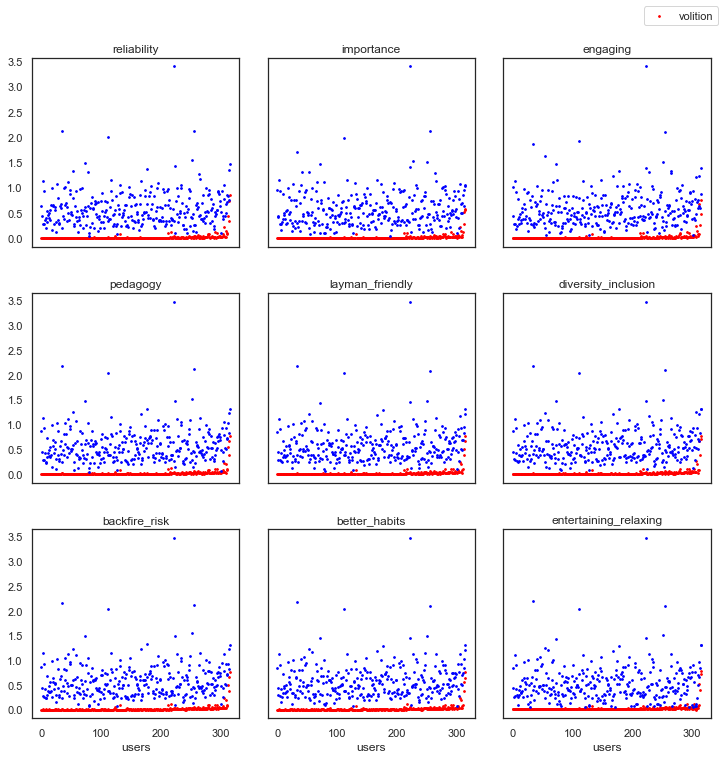

In [6]:
vol_arr_users, pref_arr_users = model_vol_pref("Adam_1650214381")
users = range(0, len(vol_arr_users))
plot_distri_per_crit(users, vol_arr_users, pref_arr_users, "volition", "users", "")

NameError: name 'plot_y_test' is not defined

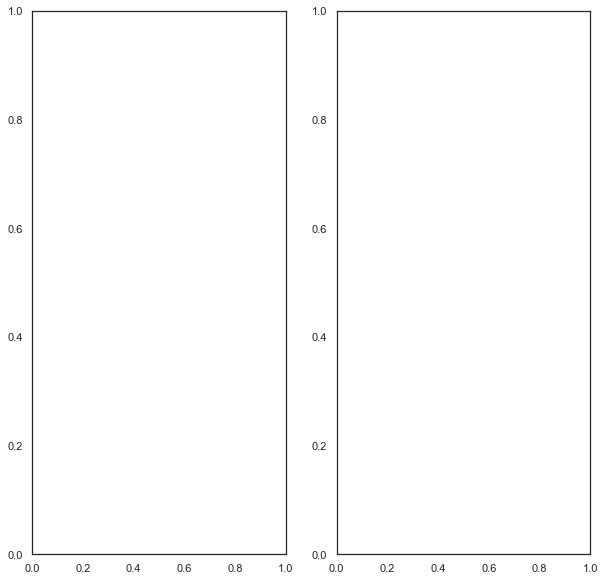

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10,10))
yy_train = plot_y_test("../tournesol_runs/Adam_1650132135", "train", axs[0])
yy_test = plot_y_test("../tournesol_runs/Adam_1650132135", "test", axs[1])

print(np.linalg.norm(mu)) 

# We can set the number of bins with the *bins* keyword argument.


In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats
stats.probplot(y_data, plot=pylab)
pylab.show()

In [ ]:
def y_noise_per_criter(res):
    noise_arr = []
    y_arr = []
    for rr in res.values():
        for r in rr:
            noise_arr += [r[5]]
            y_arr += [r[4]]
      
    noise_arr = np.array(noise_arr)
    y_arr = np.array(y_arr)
    plot_distri_per_crit(y_arr, noise_arr, "noise_k", "noise_k", "y")
y_noise_per_criter(res5)

In [ ]:
def plot_y_noise(res):
    y_data_arr = []
    quotient_arr = []
    for r in res.values():
        for rr in r:
            y_data_arr += [rr[4]]
            quotient_arr += [rr[5]]

    plt.xlabel("l2(noise)")
    plt.ylabel("y_data")
    print(pearsonr(y_data_arr, quotient_arr))
    print(max(quotient_arr), min(quotient_arr))
    plt.scatter(quotient_arr, y_data_arr, s=15)

In [ ]:
    
def calc_rating(brad_prob, pref):
    
    return [-np.log(-2*(np.log(brad_prob[i]) + np.log(2)) + 1) / pref[i] for i in range(len(pref))]

def v2_result_real_data(file, pref=0):
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    y_data = []
    largely_rec = []
    weight_largely_rec = []
    # recover data from test_file
    with open(f'../tournesol_runs/{file}/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            if row["Criterion"] != "largely_recommended":
                uid_vol_arr += [int(row["user_ID"])]
                rating_arr += [float(row["rating"])]
                weights_arr += [float(row["weight"])]
                y_data += [float(row["y_data"])]
            else:
                largely_rec += [float(row["rating"])]
                weight_largely_rec += [float(row["weight"])]
                
    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], y_data[i]]
                 for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    print(np.mean(y_data))
    with open(f'../tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users= {}
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    cnt, q = 0, []
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    noises_arr = []
    results_users_dict = {}
    users_ids = np.unique(np.array(test_vol_dic)[:, 0])
    for i in users_ids:
        results_users_dict.update({i: []})
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2_scaled =[]
        unrated = 0
        for r in r2:
            if r == -1.0:
                r2_scaled += [-1]
                unrated += 1
            else:
                r2_scaled += [1 - r / 100]
                
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria)]
        encoded_weight = []
        for (w, r) in zip(weight, r2_scaled):
            encoded_weight += [_encode_weights(w, r)]
            
        encoded_weight = np.array(encoded_weight)                       
        y_data = test_vol_dic[i][3] 
        normalized_y_data = y_data / 100000#np.sqrt(np.sum(np.array(test_vol_dic)[:,3] ** 2))
        #noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        #user_pref = vol_arr_users.get(uid) + noises
        # taking only volition as user preferences
        #bradely = [1/(1+np.exp(-np.multiply(user_pref[i], encoded_weight[i] * r2_scaled[i]))) for i in range(len(user_pref))]
        # takinh noisy preferences : volition + noises
        #bradely = [[1/(1+np.exp(-np.multiply(user_pref[i][j], encoded_weight[j] * r2_scaled[j]))) 
                    #for j in range(len(user_pref[i]))] for i in range(len(user_pref))]
        #mean_proba = np.array(bradely).mean(axis=0)
        #mean_noise = np.array([-np.log(mean_proba[i]) / mean_proba[i] - vol_arr_users.get(uid)[i] for i in range(len(mean_proba))])
        #mean_noise = np.array(noises).mean(axis=0)
        p=0.95
        pref = [0, 0, 0, 0, 0, 0, 0, 0, 0]

        pref = -np.log((np.linalg.norm(mu) * np.exp(-np.linalg.norm(mu) * normalized_y_data) - p) / p)/(np.mean(r2_scaled))
                       
        #print(uid,": ", abs(mean_proba - r2_scaled))
        #quotient = np.linalg.norm(mean_noise)
        import math
        if math.isnan(pref):
            pref = 0.
        quotient = pref - np.linalg.norm(vol_arr_users.get(uid))
        print("pref= ", pref, "\n", quotient)
        q += [quotient]
        #res_uid = [i, uid, r2_scaled, mean_proba, mean_noise, y_data, quotient, unrated]
        res_uid = [i, uid, r2_scaled, p, pref, normalized_y_data, quotient, unrated]

        current_res_uid = results_users_dict.get(uid)
        current_res_uid += [res_uid]
        results_users_dict.update({uid: current_res_uid})
        

    return results_users_dict, np.array(q).mean(), mu

In [ ]:
re, mean_q, mu = v2_result_real_data("Adam_1655389837")

In [ ]:
def __plot_y_noise(res, m_mu_new, largely_rec=None, weight_largely_rec=None):
    y_data_arr = []
    quotient_arr = []
    bradly_proba = []
    mean_rating = []
    bradely_vol_proba = []
    diff = []
    weights = []
    tp, tn, fp, fn = 0, 0, 0, 0

    for r in res.values():
        for rr in r:
            #if((np.mean(rr[7]) > 0.5 and np.mean(rr[7]) < 0.6)):#or (np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
            y_data_arr += [rr[5]]
            quotient_arr += [rr[6]]
            bradly_proba += [rr[4]]
            mean_rating += [np.mean(np.array(rr[2]))]

    new_p = []
    new_large = []
    if largely_rec is not None:
        for i in range(len(largely_rec)):
            if largely_rec[i] != -1:
                new_p += [np.mean(bradely_vol_proba[i])]
                new_large += [(largely_rec[i])] #* _encode_weights(weight_largely_rec[i], (1 - largely_rec[i] / 100))]
        
    #print(f"precision: {precision}, recall: {recall}, accuracy: {accuracy}")
    fig, axs = plt.subplots(1, 3, figsize=(10,10))
    mydata_vol = pd.DataFrame({"bradely_proba": bradly_proba, "l2(noise)":quotient_arr})
    mydata = pd.DataFrame({"mean_rating": mean_rating, "bradely_proba":bradly_proba})
    mydata_noise = pd.DataFrame({"mean_rating": mean_rating, "l2(noise)":quotient_arr})

    print(min(bradly_proba))
    print(spearmanr(y_data_arr, quotient_arr))
    print(np.mean(quotient_arr))
    axs[0].scatter(quotient_arr, y_data_arr, s=15)
    axs[0].set(xlabel="l2(noise)", ylabel="y_data")

    axs[1].scatter(mean_rating, bradly_proba, s=15, c="red")
    axs[1].set(xlabel="mean_rating", ylabel="proba P")
    
    sns.regplot(ax=axs[2], x="bradely_proba", y="l2(noise)", data=mydata_vol)

__plot_y_noise(re, mu)

1.5964462478430075
1.31610130159083


NameError: name 'mean_q' is not defined

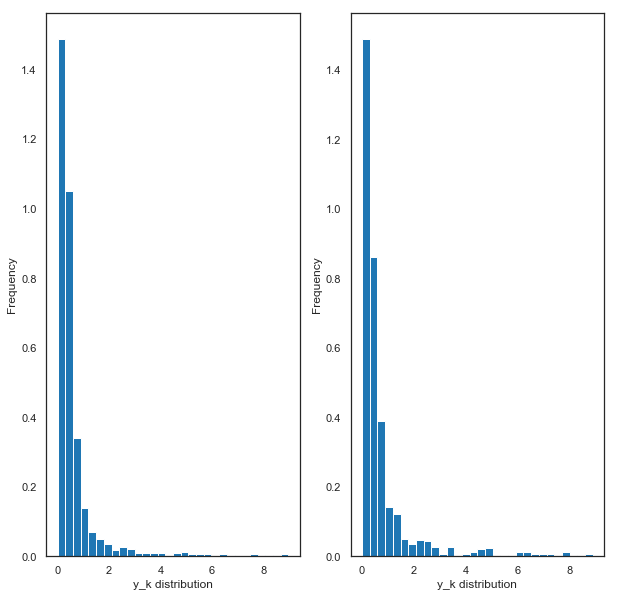

In [9]:
def plot_y_test(file, traintest, ax):
    n_bins = 30
    with open(f'{file}/{traintest}.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        y_data = []
        count = 0
        for row in csv_reader:
            if count % 9 == 0:
                y_data += [float(row["y_data"])]
            count += 1
    y_data_normalized = np.array(y_data) / 100000# np.sqrt(np.sum(np.array(y_data) ** 2))
    y_data.sort(reverse=True)
    ax.hist(y_data_normalized, bins=n_bins, density=True)
    ax.set(xlabel="y_k distribution", ylabel="Frequency")
    plt.savefig(f"./y_k.eps", format='eps')

    print(len(y_data_normalized)/(sum(y_data_normalized)))
    return y_data_normalized

fig, axs = plt.subplots(1, 2, figsize=(10,10))
yy_train = plot_y_test("../tournesol_runs/Adam_1650213018", "train", axs[0])
yy_test = plot_y_test("../tournesol_runs/Adam_1650213018", "test", axs[1])
print(mean_q, 1/np.linalg.norm(mu)) 


In [8]:
# recover data from test_file
l = 1.59

def graph(l, maxx, yy):
    n_bins = 40
    x = np.arange(0, maxx, maxx/6)
    y = l * np.exp(-l*x)
    plt.hist(yy, bins=n_bins, density=True)
    plt.plot(x, y)
    plt.xlabel("y")
    plt.ylabel("Frequency")
    plt.savefig("y_data_fig.eps", format='eps')


#graph(2, np.max(data), data)

def _encode_weights(w, r):
    
    if r != -1:
        if w == 0.:
            return 1.
        elif w == 1.:
            return 1.3
        else:
            return w
    else:
        return 0


## Simulation with Tournesol data

In [10]:
def result_real_data(file, pref=0):
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    y_data = []
    largely_rec = []
    weight_largely_rec = []
    # recover data from test_file
    with open(f'../tournesol_runs/{file}/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            if row["Criterion"] != "largely_recommended":
                uid_vol_arr += [int(row["user_ID"])]
                rating_arr += [float(row["rating"])]
                weights_arr += [float(row["weight"])]
                y_data += [float(row["y_data"])]
            else:
                largely_rec += [float(row["rating"])]
                weight_largely_rec += [float(row["weight"])]
                
    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], y_data[i]]
                 for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file

    with open(f'../tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users= {}
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users.update({int(line.strip().split(' :')[0]): temp})
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    noises_arr = []
    results_users_dict = {}
    users_ids = np.unique(np.array(test_vol_dic)[:, 0])
    for i in users_ids:
        results_users_dict.update({i: []})
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2_scaled =[]
        unrated = 0
        for r in r2:
            if r == -1.0:
                r2_scaled += [-1]
                unrated += 1
            else:
                r2_scaled += [1 - r / 100]
                
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria)]
        encoded_weight = []
        for (w, r) in zip(weight, r2_scaled):

            encoded_weight += [_encode_weights(w, r)]
            
        encoded_weight = np.array(encoded_weight)                       
        y_data = test_vol_dic[i][3]
        normalized_y_data = y_data / 100000#np.sqrt(np.sum(np.array(test_vol_dic)[:,3] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users.get(uid) + noises
        bradely = [1/(1+np.exp(-np.matmul(user_pref[i], encoded_weight * r2_scaled)))
                   for i in range(len(user_pref))]
        bradely_vol = 1/(1+np.exp(-np.matmul(vol_arr_users.get(uid), encoded_weight * r2_scaled)))

        mean_pref, vol = np.array(user_pref).mean(axis=0), vol_arr_users.get(uid)
        rs = []
        ws = []
        assert len(r2_scaled) == len(mean_pref - vol)
        for r in range(len(r2_scaled)):
            if r2_scaled[r] != -1:
                rs += [r2_scaled[r]]
                ws += [encoded_weight[r]]
        
        y = [sc.stats.expon.pdf(normalized_y_data, scale=1 / np.linalg.norm(noises[i])) for i in range(len(noises))]
        #y = sc.stats.expon.pdf(normalized_y_data, scale=1 / np.linalg.norm(mu))
        #y = 1 - np.exp(-np.linalg.norm(mu) * normalized_y_data)

        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        #assert len(bradely) == len(y) == len(proba_noises)
        #dens = [(bradely[i] * y[i]) for i in range(len(noises))]
        dens = [sc.special.expit(bradely[i] * y[i]) for i in range(len(noises))]
        min_dist = [abs(d - np.mean(rs)) for d in dens]
        min_dist_dens_rating = np.argmin(np.array(min_dist))
        
        dens_vol = bradely_vol * normalized_y_data
        max_index = np.argmax(np.array(dens))
        #print(vol_arr_users[uid], user_pref[max_index])
        #quotient = np.linalg.norm(noises[max_index]) #/ (nb_criteria - unrated)
                
        #res_uid = [i, uid, r2_scaled, mean_proba, mean_noise, y_data, quotient, unrated]

        res_uid = [i, uid, r2_scaled, ws, normalized_y_data, 
                   mean_pref, vol, dens[max_index], rs, dens_vol, noises[max_index], noises[min_dist_dens_rating],
                   dens[min_dist_dens_rating], min_dist[min_dist_dens_rating]]

        #res_uid = [i, uid, r2_scaled, encoded_weight, y_data, noises[max_index], quotient, dens[max_index]]
        current_res_uid = results_users_dict.get(uid)
        current_res_uid += [res_uid]
        results_users_dict.update({uid: current_res_uid})
        print(f"{uid} || {dens_vol} || {dens[max_index]} || {np.mean(dens)} ||")
        #print(f"{uid} ||{quotient} || {dens} || {rs}")

    return results_users_dict, mu, largely_rec, weight_largely_rec

In [11]:
def _plot_y_noise(res, m_mu_new, largely_rec=None, weight_largely_rec=None):
    y_data_arr = []
    quotient_arr = []
    bradly_proba = []
    mean_rating = []
    bradely_vol_proba = []
    diff = []
    weights = []
    tp, tn, fp, fn = 0, 0, 0, 0

    for r in res.values():
        for rr in r:
            #if((np.mean(rr[7]) > 0.5 and np.mean(rr[7]) < 0.6)):#or (np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
            y_data_arr += [rr[4]]
            quotient_arr += [np.linalg.norm(rr[10])]
            bradly_proba += [rr[7]]
            mean_rating += [np.mean(np.array(rr[8]))]
            bradely_vol_proba += [np.mean(rr[6] + rr[10])]
            diff += [rr[12]]
            temp = np.mean([w for w in rr[3] if w != 1.])

            if math.isnan(temp):
                weights += [0.]
            else:
                weights += [temp]
                
            if rr[7] > 0.5 and np.mean(rr[8]) > 0.5:
                tp += 1
            elif rr[7] > 0.5 and np.mean(rr[8]) <= 0.5:
                fp += 1
            elif rr[7] <= 0.5 and np.mean(rr[8]) > 0.5:
                fn += 1
            elif rr[7] <= 0.5 and np.mean(rr[8]) <= 0.5:
                    tn += 1
    graph(np.linalg.norm(m_mu_new), np.max(y_data_arr), y_data_arr)
    print("lambda= ", np.linalg.norm(m_mu_new))
    print("tp=",tp,"fp=",fp,"fn=",fn,"tn=",tn)
    #precision = tp / (tp + fp)
    #recall = tp / (tp + fn)
    #accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    new_p = []
    new_large = []
    new_large_weight = []
    new_mean_r = []
    new_y = []
    new_weights = []
    new_quotient = []
    for i in range(len(largely_rec)):
        if largely_rec[i] != -1:
            new_p += [np.mean(bradely_vol_proba[i])]
            new_large += [1 - (largely_rec[i])/100] #* _encode_weights(weight_largely_rec[i], (1 - largely_rec[i] / 100))]
            new_large_weight += [weight_largely_rec[i]]
            new_mean_r += [mean_rating[i]]
            new_y += [y_data_arr[i]]
            new_weights += [weights[i]]
            new_quotient += [quotient_arr[i]]
        
    
    #print(f"precision: {precision}, recall: {recall}, accuracy: {accuracy}")
    fig, axs = plt.subplots(2, 4, figsize=(10,10))
    mydata_vol = pd.DataFrame({"bradely_proba": bradly_proba, "l2(noise)":quotient_arr})
    mydata = pd.DataFrame({"avg_rating": mean_rating, "bradely_proba":bradly_proba})
    mydata_noise = pd.DataFrame({"avg_rating": mean_rating, "l2(noise)":quotient_arr})

    print(min(bradly_proba))
    print(spearmanr(y_data_arr, quotient_arr))
    print(np.mean(quotient_arr))
    axs[0, 0].scatter(quotient_arr, y_data_arr, s=15)
    axs[0, 0].set(xlabel="l2(noise)", ylabel="y_data")
    axs[0, 0].set_title("Figure 1")

    axs[0, 1].scatter(mean_rating, bradly_proba, s=15, c="red")
    axs[0, 1].set(xlabel="avg_rating", ylabel="proba P")
    axs[0, 1].set_title("Figure 2")
    sns.regplot(ax=axs[0, 2], x="avg_rating", y="l2(noise)", data=mydata_noise)
    axs[0, 2].set_title("Figure 3")

    #fig.savefig(f"./pref_proba.png")

    #sns.regplot(ax=axs[1], x="bradely_proba", y="mean_rating", data=mydata)
    #sns.regplot(ax=axs[3], x="mean_rating", y="l2(noise)", data=mydata_noise)
    axs[0, 3].scatter(quotient_arr, bradly_proba, s=5)
    axs[0, 3].set(xlabel="l2(noise)", ylabel="proba P")
    axs[0, 3].set_title("Figure 4")

    axs[1, 0].scatter(mean_rating, weights, s=5)
    axs[1, 0].set(xlabel="mean ratings", ylabel="avg_weights")
    axs[1, 0].set_title("Figure 5")

    axs[1, 1].scatter(quotient_arr, weights, s=5)
    axs[1, 1].set(xlabel="l2 noise", ylabel="avg_weights")
    axs[1, 1].set_title("Figure 6")

    axs[1, 2].scatter(y_data_arr, weights, s=5)
    axs[1, 2].set(xlabel="y_data", ylabel="avg_weights")
    axs[1, 2].set_title("Figure 7")
    
    axs[1, 3].scatter(mean_rating, y_data_arr, s=5)
    axs[1, 3].set(xlabel="avg_rating", ylabel="y_data")
    axs[1, 3].set_title("Figure 8")
    
    plt.figure(figsize=(6,5))
    axes = plt.axes(projection='3d')
    print(type(axes))
    axes.scatter3D(weights, y_data_arr, mean_rating)

    axes.set_xlabel('avg_weights')
    axes.set_ylabel('y_data_arr')
    axes.set_zlabel('avg_rating')

    axes.view_init(45, 215)

    fig.tight_layout()
    plt.show()


In [13]:
re_new, mu_new, largely_rec, weight_largely_rec = result_real_data("Adam_1660175335", pref=0) # with lambda = ||noise_k||

0 || 0.1042212001274305 || 0.8696239671706665 || 0.7669405319433757 ||
0 || 0.09975512092142694 || 0.8789731725652333 || 0.7755326364810421 ||
0 || 0.08042667711240295 || 0.9156073843213721 || 0.8113657063311266 ||
1 || 0.14454255207953304 || 0.7855159428878856 || 0.7330044218699788 ||
2 || 0.24316503487744692 || 0.6789069110072049 || 0.6494789021887261 ||
3 || 0.13292301374243995 || 0.8350782799625046 || 0.7723635579685157 ||
3 || 0.1150800733973893 || 0.8627804620608958 || 0.7810363113761253 ||
3 || 0.13098890517410341 || 0.834003826032203 || 0.7661284797617113 ||
3 || 0.15300012386940182 || 0.8001440627930928 || 0.7484390061296334 ||
3 || 0.0561042900482694 || 0.9467208208894676 || 0.8401681077291631 ||
3 || 0.13242490011068062 || 0.8307513125221656 || 0.7651606557375957 ||
3 || 0.20840927444157165 || 0.7316911923974746 || 0.6984860248815482 ||
3 || 0.133687171338229 || 0.8309312260874265 || 0.7655743641966398 ||
3 || 0.18845365341615858 || 0.7547876351781808 || 0.7164820359778317 |

42 || 0.17549416364376902 || 0.8090431515041957 || 0.758072790440068 ||
42 || 0.23960114325913381 || 0.7523315268233641 || 0.7267041207068434 ||
42 || 0.14624435744603603 || 0.855842458172057 || 0.7918489809119096 ||
42 || 0.12672087225839615 || 0.885838452708142 || 0.8068381467081014 ||
42 || 0.1753531879850152 || 0.819948313078469 || 0.7693254266615022 ||
42 || 0.15155994124045782 || 0.8499133182898987 || 0.7849188707695572 ||
42 || 0.16910111500958583 || 0.8320451554014276 || 0.7818586433150483 ||
42 || 0.16452945868717322 || 0.8309737223077335 || 0.7809537475421037 ||
42 || 0.19110274107807784 || 0.8067080544585771 || 0.7688384133960723 ||
42 || 1.6111399986322623 || 0.5311260185110958 || 0.5051838747932746 ||
42 || 0.31612835497916086 || 0.7064885900119868 || 0.6914311307308771 ||
42 || 0.3564080663828191 || 0.6894067423098998 || 0.6770163961831484 ||
42 || 0.23592994508559625 || 0.7688397139881402 || 0.7454742422286204 ||
44 || 0.7176704130708436 || 0.5641207013051746 || 0.529039

85 || 0.18043499506353408 || 0.7623113350557604 || 0.7287238235680612 ||
86 || 0.08645439422769008 || 0.8893220315880499 || 0.7920841370679104 ||
87 || 0.2504861755966216 || 0.6771388018710819 || 0.6558519105859187 ||
89 || 0.08889865086258526 || 0.8807165715544932 || 0.7640681801268931 ||
91 || 0.013268902119873109 || 0.9799299226454471 || 0.8658672323065998 ||
91 || 0.017615043757151644 || 0.9832576216007134 || 0.8647970964841374 ||
91 || 0.02338794906323374 || 0.9702844235475023 || 0.8558119015919338 ||
91 || 0.018558902799590923 || 0.982253037992227 || 0.8590878779611225 ||
91 || 0.01592487756487666 || 0.9798422164988665 || 0.8579827153686584 ||
92 || 0.023861341225134614 || 0.986760375026054 || 0.8700496167861602 ||
92 || 0.17834450277523536 || 0.7586751509512877 || 0.7235401078168359 ||
92 || 0.14808535783913 || 0.7956941119008227 || 0.7485799766385128 ||
92 || 0.07538898595439412 || 0.9264603456974274 || 0.8218235066050856 ||
93 || 0.4115878505171865 || 0.6083678064608425 || 0.5

117 || 0.09116715481716542 || 0.8940198170058519 || 0.7922307200192624 ||
118 || 0.050932534318967666 || 0.956099751298697 || 0.8284039214317129 ||
119 || 0.0729743086151517 || 0.918746099856903 || 0.7848451475000651 ||
120 || 2.154049565189692 || 0.5062025427841662 || 0.5001171841204204 ||
121 || 0.139183196060128 || 0.790300555808358 || 0.7334106025190468 ||
122 || 0.08568605476252132 || 0.8981785994021351 || 0.7982653183533749 ||
123 || 0.2807307274831157 || 0.6515441771312088 || 0.6209725901190314 ||
124 || 0.3153080042827565 || 0.6425074410490479 || 0.6149243910262331 ||
126 || 0.33892836511049673 || 0.6274698275534133 || 0.5962607118514652 ||
126 || 0.03096021231433812 || 0.9743902388183757 || 0.8691352010965002 ||
126 || 0.6911542658699729 || 0.5581961556806896 || 0.5267100095172592 ||
127 || 0.17686344098204373 || 0.7584552671254745 || 0.7106654962197052 ||
127 || 2.4686202674507762 || 0.5054342623173518 || 0.5001274043030128 ||
127 || 0.326730551183051 || 0.6612471348795994 ||

153 || 0.39297670018156494 || 0.6997864630037741 || 0.6899478648276995 ||
153 || 0.0811670593341858 || 0.9575732343518909 || 0.8641919201244623 ||
153 || 0.07163011237122387 || 0.9641590011869492 || 0.8731599477374486 ||
153 || 0.33776178098887794 || 0.7057135065221559 || 0.6882943404348678 ||
153 || 0.05346861001152092 || 0.9666455614846803 || 0.861070628797634 ||
153 || 0.08336547122745794 || 0.9639447216096957 || 0.8711601781951092 ||
153 || 0.03180556676686676 || 0.9788164492251684 || 0.8823065787055807 ||
153 || 0.042260972041794784 || 0.9864893402401652 || 0.8874458601283322 ||
153 || 0.06752658487664268 || 0.9681627004410044 || 0.8747821547225214 ||
153 || 0.6667600782564012 || 0.61895603272379 || 0.5918084661158614 ||
153 || 0.5961220104152538 || 0.6402516631361428 || 0.6204414147074514 ||
153 || 0.5002548159239972 || 0.6646286667813966 || 0.6515472431861412 ||
153 || 0.5517837990204248 || 0.6520574795811613 || 0.6355425946622931 ||
153 || 0.430884510629789 || 0.688954886918293

162 || 0.1292235853793029 || 0.805508300103502 || 0.7307928228791507 ||
163 || 0.548038151603734 || 0.6568139968118338 || 0.6440919458958966 ||
163 || 0.4112024259832434 || 0.7044864704693471 || 0.6975799430593449 ||
163 || 0.3958581902246623 || 0.7058929482814614 || 0.697954967954591 ||
163 || 0.38828863308694 || 0.7142313664900817 || 0.7072641514874508 ||
163 || 0.5161184537051027 || 0.6671793943335825 || 0.6556829902801108 ||
163 || 0.2948923201946008 || 0.7616263260944022 || 0.7482749682196859 ||
163 || 0.266384854670915 || 0.7903339470561537 || 0.7673382582471306 ||
163 || 0.3601144461047227 || 0.7315579257287979 || 0.7242822983312849 ||
163 || 0.4484710345100004 || 0.691291444976484 || 0.6848090043658424 ||
163 || 0.3893710485392521 || 0.7157043661949789 || 0.7092774107973822 ||
163 || 0.5813372480873573 || 0.6478208840601907 || 0.6321381776750311 ||
163 || 0.39595119433080417 || 0.7109922301466076 || 0.703778615545587 ||
163 || 0.5237433706815844 || 0.66550050008591 || 0.6543284

163 || 0.38210195391963425 || 0.7200325840013052 || 0.7121791801766092 ||
163 || 0.4173261411233739 || 0.7035513606227914 || 0.6962234926517243 ||
163 || 0.6196139794614721 || 0.6424674853579624 || 0.624719349663809 ||
163 || 0.3790957404513954 || 0.7211028520864076 || 0.7139597232667041 ||
163 || 0.4997962903818847 || 0.671114186727127 || 0.6601971867487262 ||
163 || 0.41272104901330203 || 0.7063912381265935 || 0.7000599187565074 ||
163 || 0.519363277726169 || 0.6678575292774326 || 0.6576883224367609 ||
163 || 0.5758618795315161 || 0.6518239262365082 || 0.6362574178174593 ||
163 || 0.2985341351048852 || 0.7657386774692183 || 0.7514596530493476 ||
163 || 0.23839630351719587 || 0.8210559217758677 || 0.789757761081417 ||
163 || 0.07522428072959923 || 0.9690258139260337 || 0.8808929421227949 ||
163 || 0.09426771648795995 || 0.9533804630779726 || 0.8659762213817631 ||
163 || 0.0567983104319787 || 0.9734952126390197 || 0.8815398678879413 ||
163 || 0.07433165974580443 || 0.9661362184314402 |

163 || 4.260577473706482 || 0.5034173666519082 || 0.5000684475930853 ||
163 || 0.7461856015533003 || 0.6125933140503572 || 0.5829581359010549 ||
163 || 0.550186077974668 || 0.6531295070783513 || 0.638475983248843 ||
163 || 0.8401828564788921 || 0.6002875879998878 || 0.5663267531852209 ||
163 || 1.2998777995155508 || 0.565220367818519 || 0.524272892514914 ||
163 || 0.616139740451287 || 0.6360751498827851 || 0.6149428887162385 ||
163 || 0.579382692404562 || 0.6511413468587783 || 0.6363176808512083 ||
163 || 0.4338067873673212 || 0.6972977392728049 || 0.6910202765087836 ||
163 || 0.4769618872065452 || 0.6819970485742342 || 0.6739637530370033 ||
163 || 0.3427920548542366 || 0.7414197026749689 || 0.7327463489670551 ||
163 || 0.37866143863217383 || 0.7220957816867212 || 0.7153769050526652 ||
163 || 0.46667139368618704 || 0.6774060157296116 || 0.6663105422743959 ||
163 || 0.42950223915386726 || 0.6987706574850115 || 0.6923745537309313 ||
163 || 0.373857969738458 || 0.7265881381063954 || 0.719

203 || 0.13776158684039433 || 0.8075197376526163 || 0.7253951871913144 ||
204 || 1.2205681379535214 || 0.521189918907058 || 0.5021906711963581 ||
205 || 0.07237396744246527 || 0.9369713615530914 || 0.8262889653926987 ||
205 || 0.09912147415463025 || 0.8977316458868837 || 0.8045545725890554 ||
205 || 0.08909160896430549 || 0.918103010728464 || 0.8182072731267613 ||
205 || 0.09619861610933203 || 0.9068172397201145 || 0.8158067206579592 ||
205 || 0.07052462871340945 || 0.9387188873712318 || 0.81926772100269 ||
206 || 0.10903534001316449 || 0.8488375855357865 || 0.7685637549198855 ||
207 || 0.17071964137330609 || 0.7515281709867369 || 0.7101413161420491 ||
208 || 0.39570199395611716 || 0.6304180560061865 || 0.6029881478314644 ||
208 || 0.17983729956445113 || 0.7684859162479875 || 0.728661042115569 ||
209 || 0.278513262440403 || 0.6827554230258847 || 0.650109937293106 ||
209 || 0.09747949047318934 || 0.855317034581985 || 0.7273798025858426 ||
209 || 0.41865760202567726 || 0.6340312767036723

262 || 0.5866294920988164 || 0.6486713308767463 || 0.6324386633279927 ||
262 || 0.9045422935119324 || 0.599860380547768 || 0.5651316622700255 ||
262 || 1.2179023733526888 || 0.5741155535464234 || 0.5325360305304518 ||
262 || 1.2209382638885014 || 0.5696884848917075 || 0.5283889126869394 ||
262 || 1.1958690883901701 || 0.5752649784889402 || 0.5337614618388977 ||
262 || 0.5764788135436493 || 0.651845463445536 || 0.6364085480706988 ||
262 || 0.2088045555585105 || 0.8532094135685138 || 0.8083034003629552 ||
262 || 0.2899521752532862 || 0.7801799183070717 || 0.763157424732942 ||
262 || 0.49655498573790835 || 0.6760931411129291 || 0.6670565434361079 ||
262 || 1.0017121045609416 || 0.5749095955270982 || 0.5377443235227715 ||
262 || 3.9616078831468386 || 0.5046453422288831 || 0.5001917369959847 ||
262 || 1.2231679183166717 || 0.5637380860742719 || 0.5235893808660534 ||
262 || 7.211900329411783 || 0.5003637203312203 || 0.5000021727534506 ||
262 || 0.08518293942686225 || 0.9471460909015605 || 0.

262 || 0.48509191838653254 || 0.659282278563429 || 0.6444255822308067 ||
262 || 4.6705005080374065 || 0.5025251850469398 || 0.500047785586847 ||
262 || 0.7471765896742848 || 0.618328087199954 || 0.5911220950029002 ||
262 || 0.414735413100991 || 0.6803162128540983 || 0.6650073169483554 ||
264 || 0.07542416284918306 || 0.909862150211713 || 0.795178273625374 ||
265 || 0.0783211745895617 || 0.9159602399492066 || 0.8077223175071033 ||
265 || 0.07844293895391334 || 0.9156441400259954 || 0.8099582996605409 ||
266 || 0.2707593699171665 || 0.7543154852132052 || 0.7363204296840187 ||
266 || 0.3427723510211863 || 0.7126234482547377 || 0.700648026162515 ||
266 || 0.39622333181175984 || 0.697224337274052 || 0.6872547751112063 ||
266 || 0.24548248315325238 || 0.7582916772528981 || 0.7321692395812296 ||
266 || 0.2452769718964165 || 0.7584165564161447 || 0.7325740076561501 ||
266 || 0.10532322419560422 || 0.9107433065881165 || 0.8128986650704921 ||
266 || 0.31314579354332556 || 0.719777996334445 || 0.

277 || 0.03399346977473292 || 0.9845332243492912 || 0.8756730562282812 ||
277 || 0.03722369501203341 || 0.9710351519682906 || 0.8770203439530956 ||
277 || 0.03291228899380355 || 0.9810427160761372 || 0.8968784779815189 ||
277 || 0.037522185799067284 || 0.9806554045738408 || 0.8963308754401278 ||
277 || 0.024106154663274877 || 0.9883360991875366 || 0.8989936473904013 ||
277 || 0.025435909721989208 || 0.9876643603205832 || 0.8868142355293831 ||
277 || 0.02029460882073607 || 0.9828503771280088 || 0.8861534193429359 ||
277 || 0.023338800143846483 || 0.9778692088820178 || 0.8876566490299664 ||
277 || 0.01773241445711814 || 0.98383298857795 || 0.8888332103115528 ||
277 || 0.01781697532720454 || 0.9832991033966475 || 0.890522650515501 ||
277 || 0.04335852838362665 || 0.974587538548989 || 0.8891258941132812 ||
277 || 0.017328093701559782 || 0.9892227703027768 || 0.9011287500551834 ||
277 || 0.012589195147818295 || 0.9857607958108485 || 0.9044837070496462 ||
277 || 0.037705691971525894 || 0.977

323 || 0.04365564495734112 || 0.9793473996163626 || 0.8850613798009105 ||
323 || 0.038843426540497314 || 0.9844508132785427 || 0.8867662258201465 ||
323 || 0.11863164531958442 || 0.9248364102957428 || 0.8442571592681392 ||
323 || 0.0654698222042059 || 0.9603574586554304 || 0.8740888616618417 ||
323 || 0.04884083304354335 || 0.9757415977814788 || 0.8846755165113107 ||
324 || 0.06367516648259582 || 0.9432877067652469 || 0.830849186451006 ||
326 || 0.5690369422451955 || 0.609495006574699 || 0.5784321781553179 ||
326 || 0.277204942610235 || 0.6868220287224531 || 0.6683710194950395 ||
327 || 0.07881967106383823 || 0.9272046792030763 || 0.8282666137447118 ||
327 || 0.06918654036552525 || 0.9468767690712064 || 0.840459150750004 ||
329 || 0.6964684414463209 || 0.5380253278971253 || 0.5130079405404275 ||
330 || 0.06434932827118314 || 0.9605137370846506 || 0.8583686017673327 ||
330 || 0.23393422065676392 || 0.7660692666382952 || 0.7412214878451429 ||
330 || 0.18400683847032573 || 0.8264135026734

382 || 0.5462005370390745 || 0.6388738275061161 || 0.6184989262632911 ||
383 || 0.10335664048441742 || 0.8875434106859419 || 0.7892495134130167 ||
384 || 0.00677104502327886 || 0.9900880637526703 || 0.8827380610988932 ||
384 || 0.012969155467664894 || 0.9870815465476177 || 0.8791135295676495 ||
385 || 0.2604749324840502 || 0.8034532975183659 || 0.7775057474100817 ||
385 || 0.2325849775353633 || 0.8292452903027465 || 0.7930770455284407 ||
385 || 0.3576724771080446 || 0.7363459464300519 || 0.7295312555928756 ||
385 || 0.5008814516184573 || 0.6756138575084648 || 0.6670891709422301 ||
385 || 0.38661226210836774 || 0.7211711006657829 || 0.7152815579471256 ||
385 || 0.44699111428534893 || 0.6947889121965394 || 0.6877751861455325 ||
385 || 0.3233641168602381 || 0.7569397428652952 || 0.7449628063582309 ||
385 || 0.4360780536799494 || 0.6988918628112037 || 0.6927603980739395 ||
385 || 0.2808656407524458 || 0.7873129048815345 || 0.7678576160718461 ||
385 || 0.5955377033617439 || 0.64963746271774

C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


lambda=  1.455138273876592
tp= 698 fp= 832 fn= 0 tn= 0
0.5000406295523318
SpearmanrResult(correlation=-0.9585635937189753, pvalue=0.0)
2.990699087314922


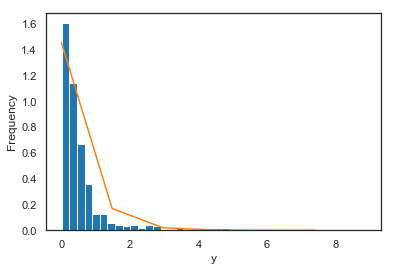

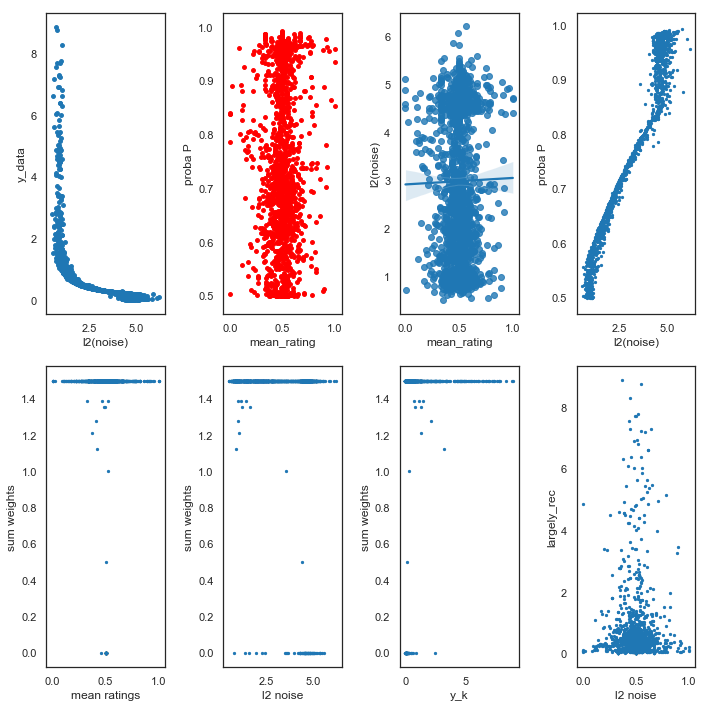

In [14]:
_plot_y_noise(re_new, mu_new, largely_rec, weight_largely_rec)

In [13]:
m_re_new, m_mu_new, m_largely_rec, m_weight_largely_rec = result_real_data("Adam_1660261605", pref=0) # with lambda = ||noise_k||

C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: `

0 || 0.09683030281563317 || 0.8698951721519462 || 0.7781744427951917 ||
0 || 0.09221320119799314 || 0.8802840935494909 || 0.7929844788671659 ||
0 || 0.0730964555013632 || 0.9035784704518566 || 0.8148237474298855 ||
1 || 0.14079760035197347 || 0.7849845174699538 || 0.7334656413750446 ||
2 || 0.23794981351112468 || 0.6794661853633327 || 0.6564706319892342 ||
3 || 0.11486889903405405 || 0.834035605405739 || 0.7688235601870792 ||
3 || 0.10077168241718816 || 0.8632947185287264 || 0.7817757179766555 ||
3 || 0.1150824710313686 || 0.8340402676638654 || 0.7656399070273424 ||
3 || 0.13406820344550832 || 0.7994668291454623 || 0.7433041961303611 ||
3 || 0.04881468968947752 || 0.9435545733674635 || 0.8330941901976044 ||
3 || 0.11656845748714614 || 0.8307026660656601 || 0.7601874380400423 ||
3 || 0.1836802376915035 || 0.7298656278322425 || 0.6938361565696183 ||
3 || 0.11670663895530836 || 0.8301244820770708 || 0.7666711255717475 ||
3 || 0.16510007205223126 || 0.7535187957561629 || 0.7079552984448169

42 || 0.19731698245696153 || 0.7212810911125789 || 0.686328399328322 ||
42 || 0.13095448930712594 || 0.8084481166678243 || 0.7543743859970894 ||
42 || 0.17091068554178976 || 0.7518404712203722 || 0.7153127856877837 ||
42 || 0.10639403332087438 || 0.8557608720698731 || 0.7791956022685967 ||
42 || 0.09081133807980538 || 0.8887349923217411 || 0.7969283706858826 ||
42 || 0.12530915323317277 || 0.8197279906106664 || 0.7640550344411093 ||
42 || 0.10939665561873203 || 0.84951033711731 || 0.7733369094859345 ||
42 || 0.11906979467649888 || 0.8314140917875237 || 0.7747094086103368 ||
42 || 0.11925766454183741 || 0.8307292414047904 || 0.768045391961274 ||
42 || 0.13351035649755552 || 0.8066535324668254 || 0.7609482328869052 ||
42 || 1.0913227106202354 || 0.5198020559406216 || 0.5038651522546221 ||
42 || 0.21742674091378406 || 0.7057796709608535 || 0.6740949921997835 ||
42 || 0.24102477456481844 || 0.6886576104525866 || 0.6582077493886497 ||
42 || 0.15966010856493432 || 0.768734373982541 || 0.7373

85 || 0.27822118837750026 || 0.6486422996594763 || 0.6185808317496312 ||
85 || 0.154824879544603 || 0.761917032011104 || 0.7259742855637547 ||
86 || 0.08439667259244023 || 0.8927257630402768 || 0.7949430951901488 ||
87 || 0.23571700690472802 || 0.6758660036674418 || 0.6490339541409393 ||
89 || 0.0879044323420705 || 0.8829729023487363 || 0.7696928428593621 ||
91 || 0.012261811104282589 || 0.9831707797863999 || 0.8771763502112984 ||
91 || 0.016278086701715096 || 0.9780038712040805 || 0.8671332005569503 ||
91 || 0.02161283661143606 || 0.9778179990883209 || 0.8615489129338133 ||
91 || 0.017150308169844385 || 0.9827630781832645 || 0.864847338102094 ||
91 || 0.014716201747158012 || 0.987221270450595 || 0.8716368148986521 ||
92 || 0.020841092674716722 || 0.9821853432186499 || 0.8665756447005944 ||
92 || 0.15819700575916726 || 0.7582581752764705 || 0.7177466302195388 ||
92 || 0.13460159290744358 || 0.7950161421182623 || 0.7299284286453093 ||
92 || 0.06584662731671662 || 0.9236242690014154 || 0

117 || 0.08542807822315528 || 0.8946412130242491 || 0.7898469287683547 ||
118 || 0.0489020029839098 || 0.9475583876950804 || 0.8272284588232957 ||
119 || 0.0715029836058082 || 0.9089186836273551 || 0.7862631489481203 ||
120 || 2.0653564555108552 || 0.5022748575827909 || 0.5000661822499779 ||
121 || 0.13706594698451988 || 0.7905008237114218 || 0.7355985062144135 ||
122 || 0.08173311190296759 || 0.9024113486566667 || 0.7981171398421593 ||
123 || 0.2785254274314122 || 0.6519988949455949 || 0.6239057611338173 ||
124 || 0.3013608156802707 || 0.6411924335503913 || 0.613242486436023 ||
126 || 0.32296990965329186 || 0.621128014971137 || 0.5855157921245426 ||
126 || 0.02770232623488819 || 0.9844046918953354 || 0.8784422249343693 ||
126 || 0.6325594086764519 || 0.5532145764025567 || 0.5227286144713641 ||
127 || 0.16002633519466383 || 0.7576192747354787 || 0.7084558807799276 ||
127 || 2.0716244272201023 || 0.5023812426570615 || 0.5000791273717374 ||
127 || 0.27570350366202623 || 0.659209765866765

153 || 0.23630744746537882 || 0.6979039351874039 || 0.6714873309860564 ||
153 || 0.04855422607238465 || 0.9577683923198225 || 0.8517365401032082 ||
153 || 0.0423865814905986 || 0.9649752684547113 || 0.8680123122834434 ||
153 || 0.22085321549192152 || 0.7023447590640381 || 0.6762931218374647 ||
153 || 0.036591673067817916 || 0.9655961180216343 || 0.8299114728070237 ||
153 || 0.04876783660053337 || 0.9586210169956841 || 0.854040986782656 ||
153 || 0.02029773097596698 || 0.9826239464943409 || 0.8714851107483189 ||
153 || 0.025078742525772125 || 0.9814018683049097 || 0.8784209682073526 ||
153 || 0.03995500219957955 || 0.9621695347322328 || 0.8592534771509139 ||
153 || 0.40545073769679496 || 0.6115150162084546 || 0.5728043490215475 ||
153 || 0.35153489265068943 || 0.6369663915320476 || 0.6027171531001981 ||
153 || 0.29542772759936464 || 0.6629868550618533 || 0.6350313693208403 ||
153 || 0.32417999195824354 || 0.6500367389404039 || 0.6167364910261054 ||
153 || 0.25447683713495106 || 0.687781

162 || 0.06609856782874812 || 0.9226453775282775 || 0.8102094524803177 ||
162 || 0.12564035782547328 || 0.8101383404999125 || 0.7138284110003608 ||
163 || 0.32095470124061204 || 0.652932735462908 || 0.618869274161407 ||
163 || 0.2408579880036038 || 0.7024763555888404 || 0.6748724324983935 ||
163 || 0.23458909708695933 || 0.7031914464300458 || 0.6515927325182206 ||
163 || 0.2250253019748694 || 0.7122984253274529 || 0.6843912797831294 ||
163 || 0.30406490173742395 || 0.6639066829169199 || 0.6343892290890983 ||
163 || 0.17418562042949087 || 0.7597939519316195 || 0.7087248982665374 ||
163 || 0.1542368655812278 || 0.789741194378929 || 0.7449753783152991 ||
163 || 0.21215662487801012 || 0.730951348552537 || 0.6981684883395548 ||
163 || 0.2644601616850057 || 0.6893652106490454 || 0.6602040174660166 ||
163 || 0.22860585775533163 || 0.7148162855486926 || 0.6871186133288619 ||
163 || 0.34315521350166855 || 0.6433686267219452 || 0.600416295359586 ||
163 || 0.23010703768847324 || 0.708798543995915

163 || 0.239629745871941 || 0.6969525618317335 || 0.6735687791404266 ||
163 || 0.2003026053530158 || 0.7361022205803623 || 0.7140829466471877 ||
163 || 0.21997445345201397 || 0.7189947960096669 || 0.7008939057189042 ||
163 || 0.2401007395761987 || 0.7021883028407888 || 0.6861750337584276 ||
163 || 0.36049092220770806 || 0.6396585263372231 || 0.6112715196518713 ||
163 || 0.217759318038748 || 0.7201130550481297 || 0.7001506630071322 ||
163 || 0.2878361468348949 || 0.6675193412131171 || 0.6464862393363835 ||
163 || 0.23970600815587942 || 0.7053857334798904 || 0.6874299634709768 ||
163 || 0.3081086255805181 || 0.6662043818479401 || 0.6358907474113362 ||
163 || 0.34038712619295 || 0.648644080526465 || 0.616034747126869 ||
163 || 0.17217798481502683 || 0.7648211895193372 || 0.7336095734964949 ||
163 || 0.1405354977334111 || 0.8210025795484709 || 0.7715335331856811 ||
163 || 0.04417337762269272 || 0.9596754720266226 || 0.8536264174718015 ||
163 || 0.054643638297899755 || 0.9442143610838608 ||

163 || 0.4482875667961238 || 0.5861555680364852 || 0.5570537861206806 ||
163 || 0.49480427427359863 || 0.5876830776720512 || 0.5504397947789668 ||
163 || 0.24358467008814758 || 0.7004766953457503 || 0.6747513085851812 ||
163 || 2.488810365828067 || 0.5010021773625323 || 0.5000284671273627 ||
163 || 0.4336868127891708 || 0.6012570443177326 || 0.5707346474650299 ||
163 || 0.32199352763059713 || 0.6476067321454592 || 0.6184811117735507 ||
163 || 0.48481087338774215 || 0.5893409845393911 || 0.5562485902491922 ||
163 || 0.7589045449175322 || 0.5527682128641097 || 0.5177905845538193 ||
163 || 0.3574820537725824 || 0.6281466912880688 || 0.5953122379721936 ||
163 || 0.33857712308313354 || 0.6478995526250056 || 0.625525996127058 ||
163 || 0.25506035578082187 || 0.6961283718797955 || 0.6717066328766982 ||
163 || 0.2834394655787118 || 0.6803740532102149 || 0.6536656778796307 ||
163 || 0.2019683142301944 || 0.7406935327846301 || 0.710104686330096 ||
163 || 0.2225371090205037 || 0.7211437066825325 

203 || 0.06856039553871561 || 0.8864314155664063 || 0.7400033632573824 ||
203 || 0.12546789510543382 || 0.7959125849192383 || 0.6996168935438191 ||
203 || 0.1537646317879243 || 0.7488105406793465 || 0.6757709576492282 ||
203 || 0.12513343308528155 || 0.8064326591524539 || 0.7151547916208324 ||
204 || 1.1655426436520997 || 0.5129720196212826 || 0.5018182145143724 ||
205 || 0.05996491526289898 || 0.9344317222542952 || 0.8335404982930801 ||
205 || 0.08178405846093233 || 0.901005906008131 || 0.7963650176443234 ||
205 || 0.07368181206963333 || 0.9171180228891522 || 0.8216346138857454 ||
205 || 0.07861509270274095 || 0.9020379276162865 || 0.8124636108360369 ||
205 || 0.05962425793088331 || 0.9285331117100232 || 0.8280118000363509 ||
206 || 0.09626309448474213 || 0.8486258752554177 || 0.7638628772696832 ||
207 || 0.16375984157513807 || 0.7510947412688815 || 0.7082647864050727 ||
208 || 0.3327388921582398 || 0.6265848680037645 || 0.5969488810572425 ||
208 || 0.15278883638620508 || 0.7678769955

262 || 0.14995793301658283 || 0.8027000152785368 || 0.7633098615642175 ||
262 || 0.14338286054189792 || 0.7871303128748676 || 0.7074300230806693 ||
262 || 0.32621816880067944 || 0.6455676955790207 || 0.6160295107989764 ||
262 || 0.34519953587472774 || 0.6468773999179269 || 0.6185073028423909 ||
262 || 0.5536378557983371 || 0.5959568689739672 || 0.5579227252361892 ||
262 || 0.7356823557971457 || 0.5631665773109609 || 0.5275277260684327 ||
262 || 0.7143231559884212 || 0.5566256051718923 || 0.5230561329752339 ||
262 || 0.7145731547743925 || 0.5640743476242687 || 0.5285207592519193 ||
262 || 0.3433298040835627 || 0.6502025834760138 || 0.6119242644737719 ||
262 || 0.13256184155370002 || 0.8529406046590626 || 0.7984805249229158 ||
262 || 0.18098072037528906 || 0.780161303714722 || 0.749666802408214 ||
262 || 0.29502867334145233 || 0.6752641283375896 || 0.654734203845364 ||
262 || 0.6159827936121702 || 0.559149545412927 || 0.5282346418420998 ||
262 || 2.3700749888102344 || 0.50402997303325 ||

262 || 1.0471417258110653 || 0.5295106079010897 || 0.5063715028971731 ||
262 || 0.4459799582876062 || 0.5971193328293692 || 0.557088644436662 ||
262 || 0.3777416374143234 || 0.6123537623003243 || 0.5764631751261025 ||
262 || 0.27612484372974744 || 0.6549646645866962 || 0.6035762072505284 ||
262 || 0.30141561723256066 || 0.6526994735267887 || 0.6026312823612313 ||
262 || 2.7222488129955322 || 0.5006284031456684 || 0.5000203512135087 ||
262 || 0.4413481280765465 || 0.6128281697245046 || 0.5778679216538718 ||
262 || 0.26205755846416645 || 0.6732434113732088 || 0.6165386097881805 ||
264 || 0.07134603808044493 || 0.9078498497729346 || 0.7897450067448181 ||
265 || 0.06788275456520694 || 0.9154819817773271 || 0.8232600416338426 ||
265 || 0.0688906825032768 || 0.9155489105601704 || 0.815425729162033 ||
266 || 0.1742372669499044 || 0.7531285104631059 || 0.7180480915137075 ||
266 || 0.21586603406033214 || 0.7110703906423885 || 0.6897189356229709 ||
266 || 0.24156234296950435 || 0.696636087965006

277 || 0.013379887105702258 || 0.9881156621286072 || 0.8618765879458076 ||
277 || 0.010032206850105498 || 0.9922728484164267 || 0.8619727256954904 ||
277 || 0.018352507732200866 || 0.9813168695650741 || 0.8773288473669011 ||
277 || 0.02123670341619029 || 0.9800502107077758 || 0.8689311550226985 ||
277 || 0.021776172536406103 || 0.9816950069293946 || 0.8505369695890912 ||
277 || 0.023845450623198924 || 0.9756203593905683 || 0.8504383589474844 ||
277 || 0.01786912298069426 || 0.9875938219266599 || 0.874903984024799 ||
277 || 0.020371981805161803 || 0.9746051337774885 || 0.8745340545647812 ||
277 || 0.013581987269352058 || 0.9796940660331533 || 0.8761006568899159 ||
277 || 0.01629421069390785 || 0.9782931524210513 || 0.8540262522347228 ||
277 || 0.01300070002173499 || 0.9777508844584255 || 0.8557245486407105 ||
277 || 0.014950805024995236 || 0.9843321049793486 || 0.8549666315017237 ||
277 || 0.011359361643990946 || 0.9872339450832106 || 0.8586618452464604 ||
277 || 0.011413531227414841 ||

323 || 1.2002763240196301 || 0.5125679594497552 || 0.5016255330894726 ||
323 || 0.022700041463660493 || 0.9797164528230925 || 0.8606801924351277 ||
323 || 0.01123982635579306 || 0.9835815648094713 || 0.8709711899825645 ||
323 || 0.023503236026775988 || 0.9814649327146033 || 0.8558682668156165 ||
323 || 0.02091244380794613 || 0.9751140102029269 || 0.8595930554193897 ||
323 || 0.0638686603511535 || 0.9235765349161668 || 0.8139608641459349 ||
323 || 0.03524750774842817 || 0.9597691882953562 || 0.8428065655085197 ||
323 || 0.026294826886384723 || 0.9688739957545194 || 0.852215638502196 ||
324 || 0.04403393424845784 || 0.9541000307011145 || 0.8250613990205133 ||
326 || 0.37717787581627216 || 0.6014980672410666 || 0.5697307423535459 ||
326 || 0.22633096539783973 || 0.6854297370147119 || 0.6471864994445818 ||
327 || 0.06533387079767451 || 0.9324634212773768 || 0.8166068746477427 ||
327 || 0.056964163391100366 || 0.9485058068486033 || 0.8367155387321181 ||
329 || 0.658071277535567 || 0.5337284

380 || 0.017404535297364274 || 0.9774765939226617 || 0.8548829618083155 ||
382 || 0.24862228248944318 || 0.6512222058629041 || 0.6217423582471305 ||
382 || 0.3430282423722823 || 0.6087809283913967 || 0.5744011663981108 ||
382 || 0.28826714108204826 || 0.6328799107682939 || 0.6005139367425515 ||
383 || 0.08620889961979998 || 0.8907260044230982 || 0.791509029196697 ||
384 || 0.005427986297305302 || 0.9891888346499508 || 0.8803753047431914 ||
384 || 0.010396681446377079 || 0.9830625103787757 || 0.8803101548340624 ||
385 || 0.1431203841656929 || 0.8029496848086591 || 0.7605567246122414 ||
385 || 0.12705858560107144 || 0.8283015715427113 || 0.7756113388825097 ||
385 || 0.1846601948338129 || 0.7341456197629577 || 0.7070137958549589 ||
385 || 0.24992173736273066 || 0.6710801767241533 || 0.649027102904414 ||
385 || 0.2076808309247964 || 0.7188885060627715 || 0.6964633973385661 ||
385 || 0.2448642097768134 || 0.6927731032945867 || 0.6624499537664853 ||
385 || 0.1649889932299493 || 0.75537942508

C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


lambda=  1.6068545430902428
tp= 698 fp= 832 fn= 0 tn= 0
0.5000056259095259
SpearmanrResult(correlation=-0.9590956752531381, pvalue=0.0)
3.0893796064659873
<class 'matplotlib.axes._subplots.Axes3DSubplot'>


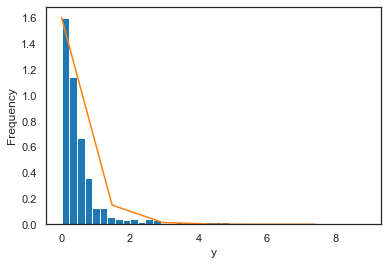

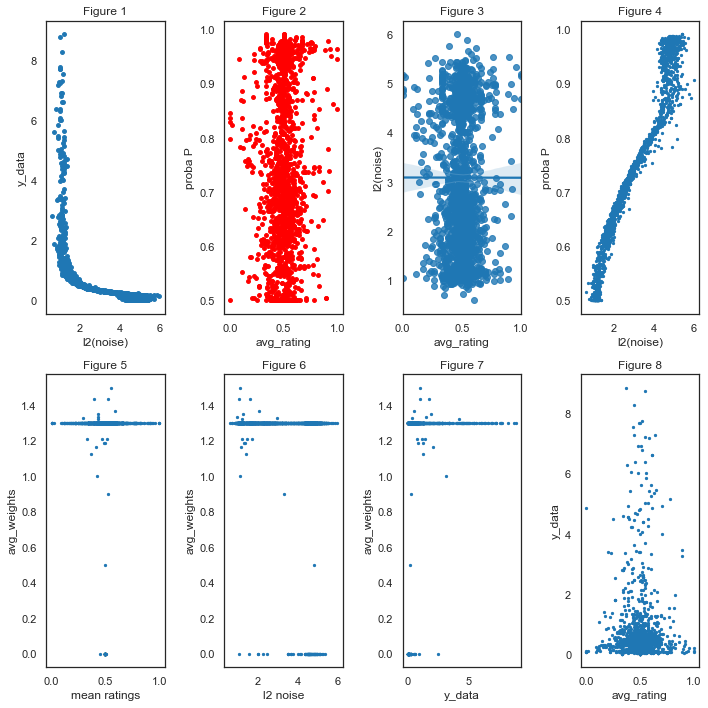

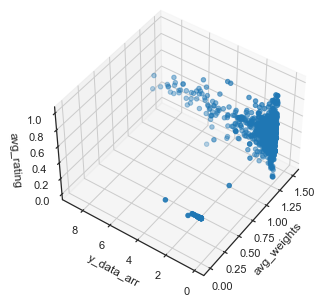

In [14]:
_plot_y_noise(m_re_new, m_mu_new, m_largely_rec, m_weight_largely_rec)

In [108]:
def plot_weights_y_noise(res, m_mu_new, largely_rec=None, weight_largely_rec=None):
    y_data_arr = []
    quotient_arr = []
    bradly_proba = []
    mean_rating = []
    bradely_vol_proba = []
    diff = []
    weights = []
    tp, tn, fp, fn = 0, 0, 0, 0

    for r in res.values():
        for rr in r:
            #if((np.mean(rr[7]) > 0.5 and np.mean(rr[7]) < 0.6)):#or (np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
            y_data_arr += [rr[4]]
            quotient_arr += [np.linalg.norm(rr[10])]
            bradly_proba += [rr[7]]
            mean_rating += [np.mean(np.array(rr[8]))]
            bradely_vol_proba += [np.mean(rr[6] + rr[10])]
            diff += [rr[12]]
            temp = np.mean([w for w in rr[3] if w != 1.])

            if math.isnan(temp):
                weights += [0.]
            else:
                weights += [temp]
                
            if rr[7] > 0.5 and np.mean(rr[8]) > 0.5:
                tp += 1
            elif rr[7] > 0.5 and np.mean(rr[8]) <= 0.5:
                fp += 1
            elif rr[7] <= 0.5 and np.mean(rr[8]) > 0.5:
                fn += 1
            elif rr[7] <= 0.5 and np.mean(rr[8]) <= 0.5:
                    tn += 1
    graph(np.linalg.norm(m_mu_new), np.max(y_data_arr), y_data_arr)
    print("lambda= ", np.linalg.norm(m_mu_new))
    print("tp=",tp,"fp=",fp,"fn=",fn,"tn=",tn)
    
    new_p = []
    new_large = []
    new_large_weight = []
    new_mean_r = []
    new_y = []
    new_weights = []
    new_quotient = []
    for i in range(len(largely_rec)):
        if largely_rec[i] != -1:
            new_p += [np.mean(bradely_vol_proba[i])]
            new_large += [1 - (largely_rec[i])/100] #* _encode_weights(weight_largely_rec[i], (1 - largely_rec[i] / 100))]
            new_large_weight += [weight_largely_rec[i]]
            new_mean_r += [mean_rating[i]]
            new_y += [y_data_arr[i]]
            new_weights += [weights[i]]
            new_quotient += [quotient_arr[i]]
        
    per = [[], [], [], [], [], [], 0]
    for c in range(len(quotient_arr)):
        if quotient_arr[c]<=1:
            per[0] += [weights[c]]
        elif quotient_arr[c]>1 and quotient_arr[c]<=2:
            per[1] += [weights[c]]

        elif quotient_arr[c]>2 and quotient_arr[c]<=3:
            per[2] += [weights[c]]

        elif quotient_arr[c]>3 and quotient_arr[c]<=4:
            per[3] += [weights[c]]

        elif quotient_arr[c]>4 and quotient_arr[c]<=5:
            per[4] += [weights[c]]

        elif quotient_arr[c]>5 and quotient_arr[c]<=6.1:
            per[5] += [weights[c]]
        else:
            per[6] += weights[c]
            
    avg_weights_noise = []
    for c in range(0, len(per)-1, 2):
        avg_weights_noise += [np.mean(per[c] + per[c+1])]
        
    avg_weights_noise += [per[6]]
    print(avg_weights_noise)
    
    per_skip = [0,0,0,0]
    for c in range(len(quotient_arr)):
        if weights[c] == 0.:
            if quotient_arr[c]<=2:
                per_skip[0] += 1
            elif quotient_arr[c]>2 and quotient_arr[c]<=4:
                per_skip[1] += 1

            elif quotient_arr[c]>4 and quotient_arr[c]<=6:
                per_skip[2] += 1
            else:
                per_skip[3] += 1
                
    print("skiip numbers", per_skip)
    
    noises_ranges= ["0-2", "2-4", "4-6", ">6"]
    fig, axs0 = plt.subplots(2, 2, figsize=(10,10))
    fig.tight_layout(pad=3.0)

    a00 = axs0[0, 0].bar(noises_ranges, avg_weights_noise, color=["green", "blue", "blue", "blue"])
    axs0[0, 0].set_ylabel('avg_weight')
    axs0[0, 0].set_title('Figure 9')
    axs0[0, 0].bar_label(a00, fontsize=10, padding=1)
    axs0[0, 0].set_xlabel('l2(noise) intervals')

    a01 = axs0[0, 1].bar(noises_ranges, per_skip, color=["green", "blue", "blue", "blue"])
    axs0[0, 1].set_ylabel('number of queries')
    axs0[0, 1].set_xlabel('l2(noise) intervals')
    axs0[0, 1].set_title('Figure 10')
    axs0[0, 1].bar_label(a01, fontsize=10, padding=1)
    
    
    # ----------------------- weights vs y_data -----------------------
    
    per_y_data = [[], []]
    y_noise_thresh = []
    for c in range(len(y_data_arr)):
        if quotient_arr[c]<=2:
            per_y_data[0] += [weights[c]]
            y_noise_thresh += [y_data_arr[c]]

        else:
            per_y_data[1] += [weights[c]]
            
    avg_weights_y = []
    for c in range(len(per_y_data)):
        avg_weights_y += [np.mean(per_y_data[c])]
        
    print(max(y_noise_thresh))
    per_skip_y = [0,0]
    for c in range(len(y_data_arr)):
        if weights[c] == 0.:
            if quotient_arr[c]<=2:
                per_skip_y[0] += 1
            else:
                per_skip_y[1] += 1
                
    y_vol_intervals = [">"+str(min(y_noise_thresh)), "0-"+str(min(y_noise_thresh))]
    a00 = axs0[1, 0].bar(y_vol_intervals, avg_weights_y, color=["green", "blue"])
    axs0[1, 0].set_ylabel('avg_weight')
    axs0[1, 0].set_title('Figure 11')
    axs0[1, 0].bar_label(a00, fontsize=10, padding=1)
    axs0[1, 0].set_xlabel('y_data intervals')

    a01 = axs0[1, 1].bar(y_vol_intervals, per_skip_y, color=["green", "blue"])
    axs0[1, 1].set_ylabel('number of queries')
    axs0[1, 1].set_xlabel('y_data intervals')
    axs0[1, 1].set_title('Figure 12')
    axs0[1, 1].bar_label(a01, fontsize=10, padding=1)
    
    fig.legend(a00, ("volitional queries", "noisy queries"), 'upper right', bbox_to_anchor=(1.0, 1.05))
    fig.savefig(f"./bar_weights.eps")
    plt.tight_layout()

C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


lambda=  1.6068545430902428
tp= 698 fp= 832 fn= 0 tn= 0
[1.2934759916492697, 1.2719899749373436, 1.1586805555555557, 0]
skiip numbers [2, 10, 62, 0]
8.87759


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


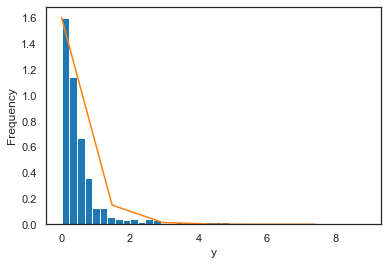

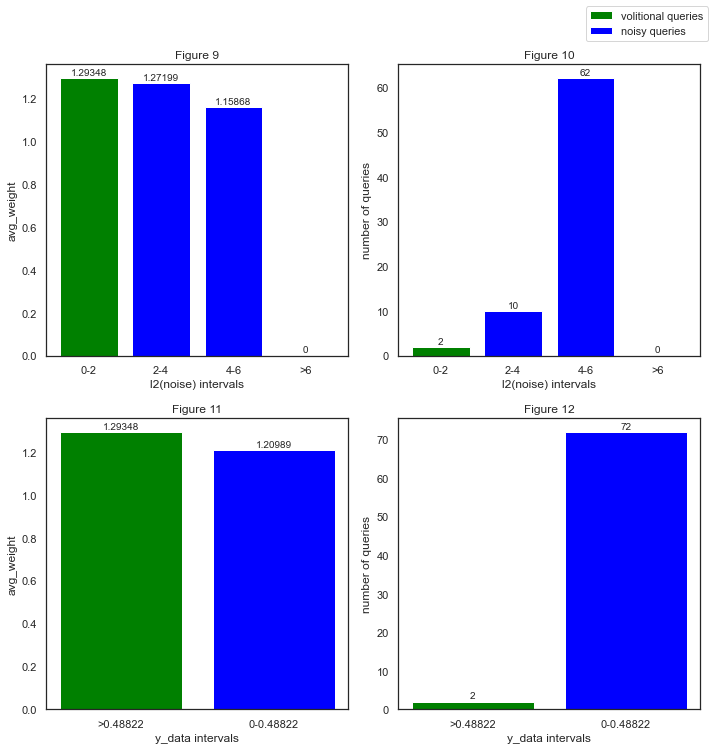

In [109]:
plot_weights_y_noise(m_re_new, m_mu_new, m_largely_rec, m_weight_largely_rec)

l2_quotient=  1.6068545430902428


C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Program Files\Python\Python37\Lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                  y_k   weights  mean_rating
y_k          1.000000  0.091478    -0.007302
weights      0.091478  1.000000     0.016649
mean_rating -0.007302  0.016649     1.000000
           y_k  mean_rating
weights                    
0.000000   294          294
0.633333     1            1
0.766667     1            1
0.855556     1            1
0.900000     1            1
0.900000     2            2
0.944444     2            2
1.000000     6            6
1.033333     1            1
1.071429     3            3
1.100000     1            1
1.100000     2            2
1.122222     5            5
1.166667     1            1
1.185714     3            3
1.200000     9            9
1.211111    13           13
1.225000     1            1
1.255556     1            1
1.300000     1            1
1.300000  5130         5130
1.322222     1            1
1.325000     3            3
1.333333     1            1
1.366667     2            2
1.400000     1            1
1.500000     2            2


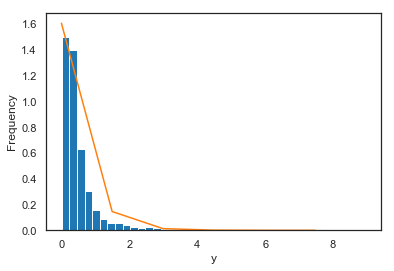

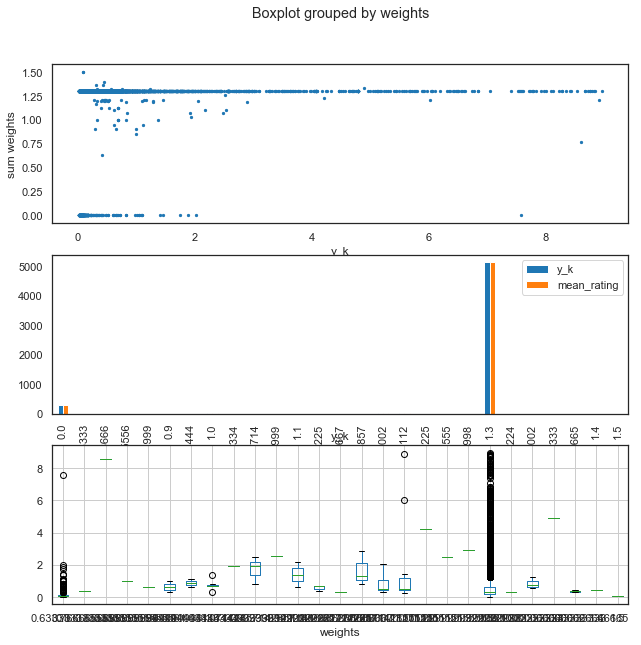

In [124]:
def extract_real_data(file, test="test"):
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    y_data = []
    largely_rec = []
    weight_largely_rec = []
    # recover data from test_file
    with open(f'../tournesol_runs/{file}/{test}.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            if row["Criterion"] != "largely_recommended":
                uid_vol_arr += [int(row["user_ID"])]
                rating_arr += [float(row["rating"])]
                weights_arr += [float(row["weight"])]
                y_data += [float(row["y_data"]) / 100000]
            else:
                largely_rec += [float(row["rating"])]
                weight_largely_rec += [float(row["weight"])]
                
    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], y_data[i]]
                 for i in range(len(uid_vol_arr))]

    with open(f'../tournesol_runs/{file}/results_{file}.txt', "r") as text_data:
        count = 0
        vol_arr_users= {}
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            count += 1
    
    print("l2_quotient= ", np.linalg.norm(mu))
    graph(np.linalg.norm(mu), np.max(y_data), y_data)

    results_users_dict = {}
    users_ids = np.unique(np.array(test_vol_dic)[:, 0])
    for i in users_ids:
        results_users_dict.update({i: []})
    nb_criteria = 9
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2_scaled =[]
        unrated = 0
        for r in r2:
            if r == -1.0:
                r2_scaled += [-1]
                unrated += 1
            else:
                r2_scaled += [1 - r / 100]
                
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria)]
        encoded_weight = []

        for (w, r) in zip(weight, r2_scaled):
            encoded_weight += [_encode_weights(w, r)]
        encoded_weight = np.array(encoded_weight)                       
        
        y_data = test_vol_dic[i][3]
        normalized_y_data = y_data #np.sqrt(np.sum(np.array(test_vol_dic)[:,3] ** 2))
        rs = []
        ws = []
        for r in range(len(r2_scaled)):
            if r2_scaled[r] != -1:
                rs += [r2_scaled[r]]
                ws += [encoded_weight[r]]
                
        res_uid = [i, uid, r2_scaled, ws, normalized_y_data, rs]

        #res_uid = [i, uid, r2_scaled, encoded_weight, y_data, noises[max_index], quotient, dens[max_index]]
        current_res_uid = results_users_dict.get(uid)
        current_res_uid += [res_uid]
        results_users_dict.update({uid: current_res_uid})
        
    y_data_arr = []
    mean_rating = []
    weights = []
    import math
    for r in results_users_dict.values():
        for rr in r:
            y_data_arr += [rr[4]]
            mean_rating += [np.mean(np.array(rr[5]))]
            temp = np.mean([w for w in rr[3] if w != 1.])
            if math.isnan(temp):
                weights += [0.]

            else:
                weights += [temp]
        
    tournesol_data = np.array([y_data_arr, weights, mean_rating])
    df = pd.DataFrame(tournesol_data.T, columns=['y_k', 'weights', 'mean_rating'])
    print(df.corr())
    dff = df.groupby(['weights']).count()
    print(dff)
    fig, axs = plt.subplots(3, figsize=(10,10))
    dff.plot(kind='bar', ax=axs[1])
    axs[0].scatter(y_data_arr, weights, s=5)
    axs[0].set(xlabel="y_k", ylabel="sum weights")
    df.boxplot(column=['y_k'], by='weights', ax=axs[2])

    return results_users_dict, largely_rec, weight_largely_rec
    
m_re_data, m_largely_rec_data, m_weight_largely_rec_data = extract_real_data("Adam_1660261605", test="train") 


In [ ]:
y_data_arr = []
quotient_arr = []
bradly_proba = []
mean_rating = []
bradely_vol_proba = []
weights = []
tp, tn, fp, fn = 0, 0, 0, 0

for r in m_re_data.values():
    for rr in r:
        #if((np.mean(rr[7]) > 0.5 and np.mean(rr[7]) < 0.6)):#or (np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
        y_data_arr += [rr[4]]
        #quotient_arr += [np.linalg.norm(rr[10])]
        #bradly_proba += [rr[7]]
        mean_rating += [np.mean(np.array(rr[2]))]
        bradely_vol_proba += [rr[6]]
        weights += [sum([w for w in rr[3] if w != 1.])]
        
tournesol_data = np.array([y_data_arr, quotient_arr, weights])
df = pd.DataFrame(tournesol_data.T, columns=['y_data', 'l2_noise', 'weights'])
dff = df.groupby(['weights']).count()
print(dff)

In [ ]:
y_data_arr += [rr[4]]
            quotient_arr += [np.linalg.norm(rr[10])]
            bradly_proba += [rr[7]]
            mean_rating += [np.mean(np.array(rr[8]))]
            bradely_vol_proba += [np.mean(rr[6] + rr[10])]
            diff += [rr[12]]
            temp = np.mean([w for w in rr[3] if w != 1.])

C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Python\Python37\Lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app

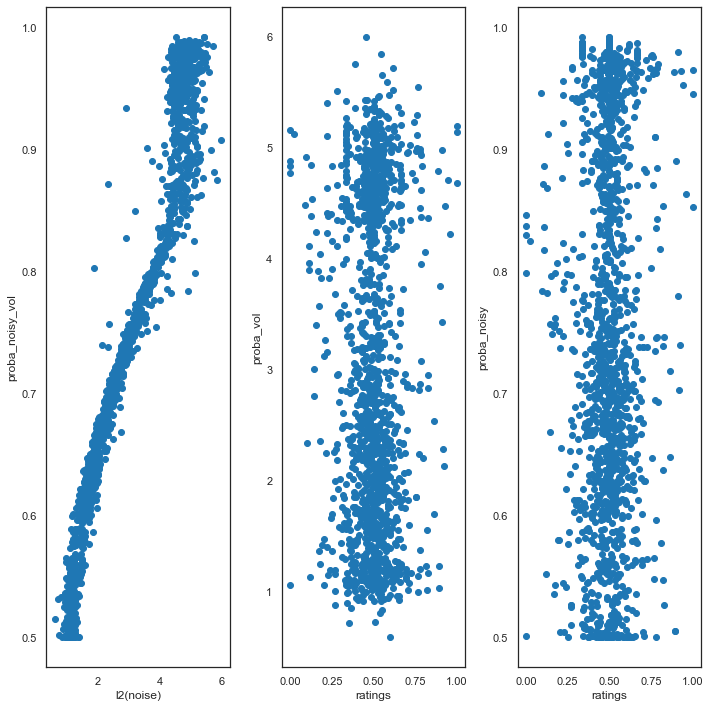

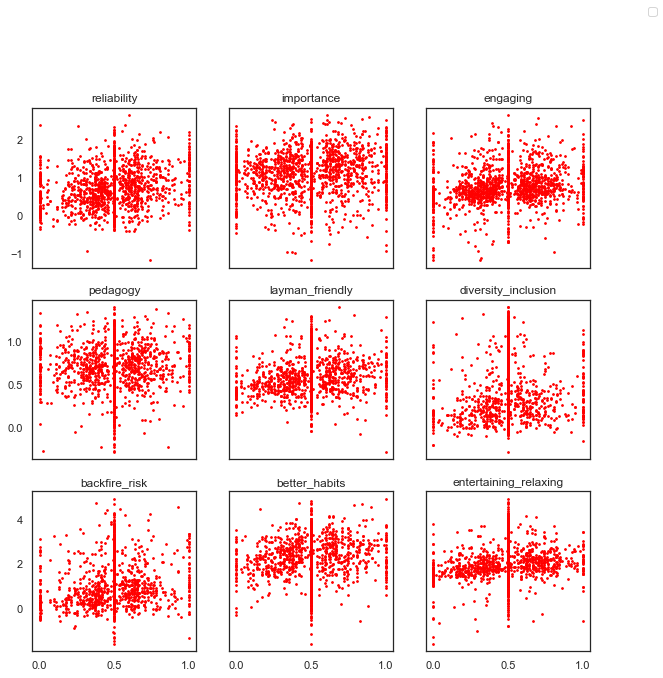

In [125]:
rating_columns = ["reliability", "importance", "engaging", "pedagogy", "layman_friendly", "diversity_inclusion", 
                  "backfire_risk", "better_habits", "entertaining_relaxing"]
def _real_plot_y_noise(res):
    y_data_arr = []
    quotient_arr = []
    prob_bradly = []
    r_scaled = []
    bradely_vol_proba = []
    vol = []
    weights = []

    tp, tn, fp, fn = 0, 0, 0, 0
    for r in res.values():
        for rr in r:
            #if((np.mean(rr[7]) > 0.5 and np.mean(rr[8]) > 0.5) or
            #(np.mean(rr[7]) <= 0.5 and np.mean(rr[8]) <= 0.5)) :
            y_data_arr += [rr[4]]
            quotient_arr += [rr[10]]
            prob_bradly += [rr[7]]
            r_scaled += [rr[8]]
            bradely_vol_proba += [rr[6] + rr[10]]
            vol += [rr[6]]
            weights += [rr[3]]
    #print("pearson_corr: ", pearsonr(y_data_arr, quotient_arr)[0])
    #print("Spearman_corr: ", spearmanr(y_data_arr, quotient_arr)[0])
    #print(max(quotient_arr), min(quotient_arr))
    #plt.scatter(quotient_arr, y_data_arr, s=15)
    
    vol_arr_users, pref_arr_users = model_vol_pref("Adam_1650214381")
    
    r = [[], [], [], [], [], [], [], [], []]
    pref = [[], [], [], [], [], [], [], [], []]
    w = [[], [], [], [], [], [], [], [], []]
    n = [[], [], [], [], [], [], [], [], []]

    assert len(r_scaled) == len(prob_bradly)
    rates = []
    prefs = []
    for i in range(len(r_scaled)):
        temp1 = []
        temp2 = []
        temp3 = []
        for j in range(len(r_scaled[i])):
            temp2 += [quotient_arr[i][j]]
            if r_scaled[i][j] != -1.:
                r[j] += [r_scaled[i][j]]
                n[j] += [quotient_arr[i][j]]
                w[j] += [weights[i][j]]
                pref[j] += [bradely_vol_proba[i][j]]
                temp1 += [r_scaled[i]]
                temp3 += [weights[i][j]]
        rates += [np.mean(np.array(temp1))]  
        prefs += [np.linalg.norm(temp2)]
    
    rr =[]
    nn = []
    pp =[]
    ww =[]
    for (i,j,k,l) in  zip(r, pref,w,n):
        rr.append(np.array(i))
        pp.append(np.array(j))
        ww.append(np.array(k))
        nn.append(np.array(l))

    fig1, axs1 = plt.subplots(1, 3, figsize=(10,10))
    axs1[0].scatter(prefs, prob_bradly)
    axs1[0].set(xlabel="l2(noise)", ylabel="proba_noisy_vol")
    axs1[1].scatter(rates, prefs)
    axs1[1].set(xlabel="ratings", ylabel="proba_vol")
    axs1[2].scatter(rates, prob_bradly)
    axs1[2].set(xlabel="ratings", ylabel="proba_noisy")
    fig1.tight_layout()

    fig, axs = plt.subplots(3, 3, figsize=(10,10))
    axs[0, 0].scatter(rr[0], pp[0], s=3, c="red")    
    #axs[0, 0].scatter(users, pref_arr_users.T[0], s=3, c="blue")
    axs[0, 0].set_title(rating_columns[0])

    axs[0, 1].scatter( rr[1], pp[1], s=3, c="red")
    #axs[0, 1].scatter(users, pref_arr_users.T[1], s=3, c="blue")
    axs[0, 1].set_title(rating_columns[1])

    axs[0, 2].scatter(rr[2], pp[2], s=3, c="red")
    #axs[0, 2].scatter(users, pref_arr_users.T[2], s=3, c="blue")
    axs[0, 2].set_title(rating_columns[2])

    axs[1, 0].scatter(rr[3], pp[3], s=3, c="red")
    #axs[1, 0].scatter(users, pref_arr_users.T[3], s=3, c="blue")
    axs[1, 0].set_title(rating_columns[3])

    axs[1, 1].scatter(rr[4], pp[4], s=3, c="red")
    #axs[1, 1].scatter(users, pref_arr_users.T[4], s=3, c="blue")
    axs[1, 1].set_title(rating_columns[4])

    axs[1, 2].scatter(rr[5], pp[5], s=3, c="red")
    #axs[1, 2].scatter(users, pref_arr_users.T[5], s=3, c="blue")
    axs[1, 2].set_title(rating_columns[5])

    axs[2, 0].scatter(rr[6], pp[6], s=3, c="red")
    #axs[2, 0].scatter(users, pref_arr_users.T[6], s=3, c="blue")
    axs[2, 0].set_title(rating_columns[6])

    axs[2, 1].scatter(rr[7], pp[7], s=3, c="red")
    #axs[2, 1].scatter(users, pref_arr_users.T[7], s=3, c="blue")
    axs[2, 1].set_title(rating_columns[7])

    axs[2, 2].scatter(rr[8], pp[8], s=3, c="red")
    #axs[2, 2].scatter(users, pref_arr_users.T[8], s=3, c="blue")
    axs[2, 2].set_title(rating_columns[8])

    #fig.tight_layout()
    fig.legend("", loc='lower right', bbox_to_anchor=(1,1), ncol=2, bbox_transform=fig.transFigure)
    for ax in axs.flat:
        ax.set(xlabel="", ylabel="")

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        

    return rr, pp, ww, nn

rr, pp, ww, nn= _real_plot_y_noise(m_re_new)

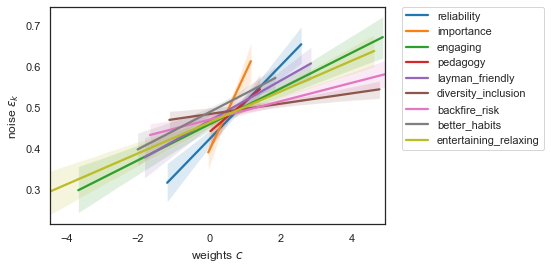

In [154]:
def ploot(idx, rr, pp):
    mydata = pd.DataFrame({"weights $c$": rr[idx].tolist(), "noise $\epsilon_k$":pp[idx].tolist()})
    sns.regplot(x="weights $c$", y="noise $\epsilon_k$", label="hhh", data=mydata, scatter=False)
    #sns.boxplot(x="users's ratings", y="Implicite preference $p$", data=mydata)
for i in range(9):
    ploot(i, nn, rr)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=rating_columns)
#plt.savefig("features.png", bbox_inches='tight')

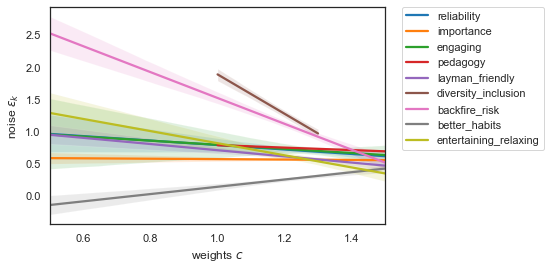

In [153]:
for i in range(9):
    ploot(i, ww, nn)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., labels=rating_columns)

In [107]:
y_data = []
largely_rec = []
weights_largly_rec = []
rating_arr = []
weights_arr = []

with open(f'../tournesol_runs/Adam_1651594922/test.csv', "r") as test_data:
        csv_reader = csv.DictReader(test_data)
        for row in csv_reader:
            if row["Criterion"] != "largely_recommended":
                rating_arr += [float(row["rating"])]
                weights_arr += [float(row["weight"])]
                y_data += [float(row["y_data"])]
            else:
                largely_rec += [float(row["rating"])]
                weights_largly_rec += [float(row["weight"])]
                

y_data_arr = []
quotient_arr = []
prob_bradly = []
r_scaled = []
bradely_vol_proba = []
vol = []
weights = []

for r in re_new.values():
    for rr in r:
        y_data_arr += [rr[4]]
        quotient_arr += [rr[10]]
        prob_bradly += [rr[7]]
        r_scaled += [rr[8]]
        bradely_vol_proba += [rr[9]]
        vol += [rr[6]]
        weights += [rr[3]]
        
new_p = []
new_large = []
quotient_larg = []

for i in range(len(largely_rec)):
    if largely_rec[i] != -1:
        new_p += [prob_bradly[i]]
        new_large += [(1 - largely_rec[i] / 100) * weights[i]]
        quotient_larg += [quotient_arr[i]]

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].scatter(new_large, new_p, s=15)
axs[0].set(xlabel="new_largely", ylabel="new_p")

axs[1].scatter(new_large, quotient_larg, s=15, c="red")
axs[1].set(xlabel="mean_rating", ylabel="proba P")
fig.show()

TypeError: can't multiply sequence by non-int of type 'float'

# SImulation with fake data

In [15]:
def v4_prepare_data_from_files(experiment_name, vol_factor, pref=0):
    user_vol_dic = []
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    one_vol_list = []
    y_data = []

    # recover data from test_file
    with open(f'../plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
        csv_reader = csv.DictReader(csv_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            one_vol_list += [float(row["volition"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    assert len(uid_vol_arr) == len(rating_arr) == len(one_vol_list) == len(weights_arr)

    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], one_vol_list[i], y_data[i]] 
                    for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    
    with open(f'../plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
        count = 0
        vol_arr_users= []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            count += 1
    # exploit results and generate metrics
    nb_criteria = len(mu)
    cv = cv * np.eye(len(mu))
    user_accuracy = []
    cnt = 0
    nb_vol_gt = 0
    tp, tn, fp, fn = 0, 0 , 0, 0
    ttp, ttn, tfp, tfn = 0, 0, 0, 0
    cnt = 0
    #print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")
    y_arr = []
    noises_arr = []
    for i in range(0, len(test_vol_dic), nb_criteria):
        uid = test_vol_dic[i][0]
        r2 = [test_vol_dic[i + j][1] for j in range(0, nb_criteria)]
        r2 = rescale_rating(r2)
        weight = [test_vol_dic[i + j][2] for j in range(0, nb_criteria) ] 
        vol = int(test_vol_dic[i][3])
        #print(vol, "    ", test_vol_dic[i])
        y_data = test_vol_dic[i][4]
        normalized_y_data = y_data / 1000000 #np.sqrt(np.sum(np.array(test_vol_dic)[:,4] ** 2))
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users[uid] + noises
        bradely = [1/(1+np.exp(-np.matmul(user_pref[i], np.array(weight) * r2))) for i in range(len(user_pref))]
        y = [sc.stats.expon.pdf(normalized_y_data, scale=1 / np.linalg.norm(noises[i])) for i in range(len(noises))]
        #y = [(1 - np.exp(-np.linalg.norm(noises[i]) * normalized_y_data)) for i in range(len(noises))]
        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        #assert len(bradely) == len(y) == len(proba_noises)
        dens = [bradely[i] * y[i] for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        y_arr += [normalized_y_data]
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) / nb_criteria 
        noises_arr += [quotient]

        #if bradely[max_index] > 0.5:
        vol_positif = 0

        print(quotient, dens[max_index])
        if quotient <= vol_factor:
            if vol == 1:
                ttp += 1
                vol_positif = 1
            else:
                tfp += 1
        else:
            if vol == 0:
                ttn += 1
            else:
                tfn += 1
            
        if dens[max_index] >= 0.01:
            if quotient <= vol_factor:
                if vol == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if vol == 0:
                    tn += 1
                else:
                    fn += 1

            if vol == 1:
                nb_vol_gt += 1
        #print(bradely[max_index], proba_noises[max_index], y[max_index])
        print(f"{uid} || {dens[max_index]} || {vol} || {vol_positif} ")
        
    print("tp=",tp,"fp=",fp,"fn=",fn,"tn=",tn)
    print("ttp=",ttp,"tfp=",tfp,"tfn=",tfn,"ttn=",ttn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    tprecision = ttp / (ttp + tfp)
    trecall = ttp / (ttp + tfn)
    taccuracy = (ttp + ttn) / (ttp + ttn + tfp + tfn)
    
    nb_vol_gt = nb_vol_gt / (len(test_vol_dic))
    print(precision, recall, accuracy)
    print(tprecision, trecall, taccuracy)
    print((2 * (precision * recall)) / (precision + recall))
    print("_____________________________________________________________\n")
    return (precision, recall, accuracy), (tprecision, trecall, taccuracy), y_arr, noises_arr

In [16]:
# Adam_1656983544 \ crit 1  "with lambda = ||mu||"
a1, b1, y_arr1, n_arr1 = v4_prepare_data_from_files('Adam_1657110289', 0.5)
print(a1, b1)

0.9874393278959275 0.334875824288377
0 || 0.334875824288377 || 0 || 0 
0.8826215399403211 0.3958996300804329
0 || 0.3958996300804329 || 1 || 0 
0.9418986983651936 0.36004804368914267
0 || 0.36004804368914267 || 0 || 0 
0.8630971527049909 0.4185463956685965
0 || 0.4185463956685965 || 0 || 0 
0.40169749264268234 0.07370248528757464
0 || 0.07370248528757464 || 0 || 0 
0.9845213681099984 0.23173374385515982
1 || 0.23173374385515982 || 0 || 0 
0.8078615328721397 0.2668124119262552
1 || 0.2668124119262552 || 0 || 0 
1.0357397571125238 0.40157449964161757
1 || 0.40157449964161757 || 0 || 0 
0.9792484598215153 0.3685194427674866
1 || 0.3685194427674866 || 0 || 0 
0.9031036846878752 0.20788295117232874
1 || 0.20788295117232874 || 0 || 0 
0.9878434715044986 0.1926542038423553
2 || 0.1926542038423553 || 0 || 0 
0.9575966831403429 0.4213153635219323
2 || 0.4213153635219323 || 1 || 0 
0.39718256891596593 0.07327360573950945
2 || 0.07327360573950945 || 0 || 0 
0.940507159104693 0.2957100999673175
2 

0.9673364661772244 0.24370599199021636
22 || 0.24370599199021636 || 0 || 0 
0.5937366635428466 0.11402469327508771
22 || 0.11402469327508771 || 0 || 0 
0.9781715183766917 0.27100052345297315
22 || 0.27100052345297315 || 0 || 0 
0.8552446054410564 0.4081582973852779
22 || 0.4081582973852779 || 0 || 0 
0.8527234686018197 0.4293984073514854
22 || 0.4293984073514854 || 0 || 0 
0.9282376483514105 0.2393064073742592
23 || 0.2393064073742592 || 0 || 0 
0.7790644493488122 0.27719315128676125
23 || 0.27719315128676125 || 0 || 0 
0.9390465806621926 0.17969714976797824
23 || 0.17969714976797824 || 0 || 0 
0.7000048870976252 0.16895414052817362
23 || 0.16895414052817362 || 1 || 0 
0.9163877335086389 0.4077432179839647
23 || 0.4077432179839647 || 0 || 0 
0.9121706244631247 0.34724044988644526
24 || 0.34724044988644526 || 0 || 0 
0.8299204012985762 0.15476012310237985
24 || 0.15476012310237985 || 0 || 0 
1.0378841865844934 0.45149434196173754
24 || 0.45149434196173754 || 0 || 0 
0.9347758154947736 0

0.8590301849766315 0.1622565198631865
44 || 0.1622565198631865 || 1 || 0 
0.9550992107083867 0.2868451698843105
44 || 0.2868451698843105 || 1 || 0 
0.8562104156987785 0.3873069492350375
44 || 0.3873069492350375 || 0 || 0 
0.89789857405528 0.3513589646735539
44 || 0.3513589646735539 || 0 || 0 
0.6487770203206878 0.1570832697610661
44 || 0.1570832697610661 || 0 || 0 
0.6508736525885737 0.37261125778826665
45 || 0.37261125778826665 || 0 || 0 
0.8893825889357223 0.3992217326170296
45 || 0.3992217326170296 || 0 || 0 
0.40646047214504 0.07480209948854338
45 || 0.07480209948854338 || 0 || 0 
0.7227570296816415 0.18435521434879662
45 || 0.18435521434879662 || 1 || 0 
1.0879350335956897 0.48553247474852246
45 || 0.48553247474852246 || 0 || 0 
1.0107592703425334 0.46402292176152576
46 || 0.46402292176152576 || 0 || 0 
0.9802251427093402 0.4492227530927106
46 || 0.4492227530927106 || 0 || 0 
1.0326895719927547 0.3274804473862549
46 || 0.3274804473862549 || 0 || 0 
0.8524288601477162 0.30014974540

0.8204960028066672 0.15049507152646419
66 || 0.15049507152646419 || 0 || 0 
0.917812231030233 0.3126496212108015
66 || 0.3126496212108015 || 1 || 0 
0.5084568148435438 0.09346471533383799
66 || 0.09346471533383799 || 0 || 0 
0.92738752272226 0.28755678930107237
66 || 0.28755678930107237 || 1 || 0 
0.817013658721251 0.3213552982669017
66 || 0.3213552982669017 || 0 || 0 
1.0781026414321149 0.2239596136169261
67 || 0.2239596136169261 || 0 || 0 
0.842205441165437 0.1583692386329439
67 || 0.1583692386329439 || 0 || 0 
0.8220094055348539 0.21294960098588106
67 || 0.21294960098588106 || 0 || 0 
1.1117379234514002 0.5033757992604262
67 || 0.5033757992604262 || 0 || 0 
0.9309367773074556 0.3388507960292819
67 || 0.3388507960292819 || 0 || 0 
0.8377732364603268 0.4345911423970317
68 || 0.4345911423970317 || 0 || 0 
0.9349038798139142 0.41989852792664334
68 || 0.41989852792664334 || 0 || 0 
0.9139811259999445 0.3551079894983008
68 || 0.3551079894983008 || 1 || 0 
1.0267219905209743 0.467529446407

0.9580409462090229 0.45002721685842656
88 || 0.45002721685842656 || 0 || 0 
0.8328649885327757 0.26846484226941925
88 || 0.26846484226941925 || 0 || 0 
0.7492311232662382 0.2849159645685664
88 || 0.2849159645685664 || 0 || 0 
0.9495359014560516 0.31599184870395947
88 || 0.31599184870395947 || 0 || 0 
0.944916155621205 0.4270907334268568
88 || 0.4270907334268568 || 0 || 0 
0.6584840629003864 0.26607577408811717
89 || 0.26607577408811717 || 1 || 0 
0.8768983690443154 0.30254033149854803
89 || 0.30254033149854803 || 0 || 0 
0.5395884323383485 0.11294193405816345
89 || 0.11294193405816345 || 1 || 0 
0.8683511675658723 0.44726556354911395
89 || 0.44726556354911395 || 1 || 0 
0.7322640009513255 0.1353172521255707
89 || 0.1353172521255707 || 0 || 0 
0.5927788407223405 0.10905378215419537
90 || 0.10905378215419537 || 1 || 0 
0.8219553714289094 0.19820718355649425
90 || 0.19820718355649425 || 0 || 0 
0.9565401837948615 0.30887894480354844
90 || 0.30887894480354844 || 1 || 0 
0.6950291015254103 

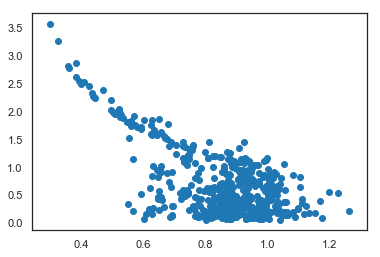

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(n_arr1, y_arr1)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650375122", plt, n_arr1, y_arr1)

In [119]:
# Adam_1641986778 \ crit 2
a22, b22, y_arr22, n_arr22 = v4_prepare_data_from_files('Adam_1656983984', 0.2)
print(a22, b22)


0      [0, 21.41451525843833, 0.1, 0.0, 401389.4889509526]
0.6255315345549607 0.5929144121989566
0 || 0.5929144121989566 || 0 || 0 
0      [0, 8.494666794616245, 0.5, 0.0, 962852.926862752]
0.4276460958098575 0.5525572675280914
0 || 0.5525572675280914 || 0 || 0 
0      [0, 22.831476687543713, 0.0, 0.0, 638435.6150693552]
0.6108357414827389 0.5918408388049702
0 || 0.5918408388049702 || 0 || 0 
0      [0, 73.95374569232716, 0.5, 0.0, 100694.4738744433]
0.7278536700159366 0.6524633945113398
0 || 0.6524633945113398 || 0 || 0 
1      [0, 7.211439731634728, 0.1, 1.0, 71141.44079549747]
0.7118420678515487 0.649920551296245
0 || 0.649920551296245 || 1 || 0 
0      [1, 18.75652416874981, 1.0, 0.0, 1334428.5087282038]
0.3157516693658552 0.5404213933992253
1 || 0.5404213933992253 || 0 || 0 
0      [1, 5.621342665337547, 0.5, 0.0, 337757.05765731604]
0.5642311132893671 0.6028482031922258
1 || 0.6028482031922258 || 0 || 0 
1      [1, 55.66522008852216, 1.0, 1.0, 546478.9802236251]
0.639979649256235

0.6405622260935591 0.5918088994278972
12 || 0.5918088994278972 || 0 || 0 
0      [12, 91.57751191887498, 1.0, 0.0, 1352597.7888057816]
0.39034621485116927 0.5440474292827673
12 || 0.5440474292827673 || 0 || 0 
0      [12, 87.05027882693737, 0.0, 0.0, 382378.1164335845]
0.6333396881323394 0.6138793160145491
12 || 0.6138793160145491 || 0 || 0 
0      [13, 74.8261137247698, 0.5, 0.0, 490623.9844270259]
0.6816480493508171 0.6136680363730619
13 || 0.6136680363730619 || 0 || 0 
1      [13, 42.94364570189238, 1.0, 1.0, 1165633.2112906815]
0.44804568546725093 0.5422385655961873
13 || 0.5422385655961873 || 1 || 0 
0      [13, 46.271725188604485, 0.0, 0.0, 266743.8275695899]
0.6218921141771117 0.6097595372125092
13 || 0.6097595372125092 || 0 || 0 
1      [13, 59.257837416936844, 0.1, 1.0, 2717758.1479213675]
0.1833025669135334 0.5169710816725356
13 || 0.5169710816725356 || 1 || 1 
0      [13, 92.42665468194988, 0.1, 0.0, 660082.5502724813]
0.6674724780660221 0.5702572044622317
13 || 0.5702572044

0.5802363985478372 0.5631116250434951
24 || 0.5631116250434951 || 0 || 0 
1      [24, 94.1058690667041, 0.5, 1.0, 594202.34208192]
0.546669404424431 0.5854760065317203
24 || 0.5854760065317203 || 1 || 0 
0      [25, 93.23301646213118, 0.5, 0.0, 659504.5074964132]
0.5049093584162385 0.5779764377959132
25 || 0.5779764377959132 || 0 || 0 
0      [25, 10.12733669080615, 0.1, 0.0, 76662.12686504543]
0.7238633756790936 0.6558099990199104
25 || 0.6558099990199104 || 0 || 0 
0      [25, 27.725447337018423, 0.1, 0.0, 838617.234363424]
0.6015298734059062 0.568257359987247
25 || 0.568257359987247 || 0 || 0 
0      [25, 40.081414841731124, 1.0, 0.0, 1037880.1452043217]
0.5034598456185156 0.5599211855532954
25 || 0.5599211855532954 || 0 || 0 
0      [25, 20.180027302346403, 0.0, 0.0, 320477.60148394865]
0.6067504827899153 0.6069949987606428
25 || 0.6069949987606428 || 0 || 0 
0      [26, 8.333183295063568, 0.5, 0.0, 1184763.923938755]
0.42513491928644137 0.5442397513704149
26 || 0.5442397513704149 

0.7445116122119202 0.6542860171290982
37 || 0.6542860171290982 || 0 || 0 
0      [37, 10.96349020073818, 0.1, 0.0, 386350.5300002271]
0.6688054621680997 0.598960783843946
37 || 0.598960783843946 || 0 || 0 
1      [37, 51.74603277836329, 0.0, 1.0, 521362.283387734]
0.6603364857295758 0.5914756739609268
37 || 0.5914756739609268 || 1 || 0 
1      [37, 66.43398540381268, 1.0, 1.0, 847441.1157538712]
0.4134905102540837 0.5577676810953546
37 || 0.5577676810953546 || 1 || 0 
0      [37, 75.81979885043269, 0.1, 0.0, 425322.3552103056]
0.603536504680267 0.5948851301765331
37 || 0.5948851301765331 || 0 || 0 
0      [38, 87.78778440099823, 0.5, 0.0, 179824.27746600693]
0.6552501318277967 0.6303528050151483
38 || 0.6303528050151483 || 0 || 0 
0      [38, 31.272426184866912, 0.1, 0.0, 114195.25266586235]
0.5331730059977408 0.617979181824875
38 || 0.617979181824875 || 0 || 0 
0      [38, 20.46085318220465, 0.0, 0.0, 661826.4936647232]
0.6701398294447878 0.581922337935507
38 || 0.581922337935507 || 0

0.5975456488916103 0.6113618504727485
49 || 0.6113618504727485 || 1 || 0 
0      [49, 34.803212663885965, 0.0, 0.0, 620950.5153818666]
0.6251645496549402 0.5714121183715863
49 || 0.5714121183715863 || 0 || 0 
0      [50, 34.964280170844766, 0.1, 0.0, 435134.92600891064]
0.6711345514790015 0.6410609782686014
50 || 0.6410609782686014 || 0 || 0 
0      [50, 72.3932232608366, 0.5, 0.0, 78144.31223969541]
0.602170136188891 0.6468063185242394
50 || 0.6468063185242394 || 0 || 0 
1      [50, 83.12244352216626, 0.0, 1.0, 1267372.034903425]
0.4023800713490733 0.5364407808158568
50 || 0.5364407808158568 || 1 || 0 
0      [50, 82.85454126057614, 1.0, 0.0, 1251155.6649819738]
0.48127263720169444 0.5486983101933746
50 || 0.5486983101933746 || 0 || 0 
0      [50, 87.21762673429907, 0.5, 0.0, 99049.93338316478]
0.5934506649025555 0.6371355371640902
50 || 0.6371355371640902 || 0 || 0 
0      [51, 14.683096398674827, 1.0, 0.0, 1822620.6571441875]
0.2702074820957829 0.531524379886801
51 || 0.531524379886

0.5884760497826512 0.6141079836905311
62 || 0.6141079836905311 || 1 || 0 
0      [62, 11.73002189339673, 0.1, 0.0, 462779.35455997917]
0.601061770865585 0.5926205436487926
62 || 0.5926205436487926 || 0 || 0 
0      [62, 14.016265542451361, 0.0, 0.0, 292134.3340372166]
0.6554297647613411 0.6099029090383219
62 || 0.6099029090383219 || 0 || 0 
0      [62, 83.28053659629252, 0.5, 0.0, 1143544.677528686]
0.4516662344829894 0.5459651181903432
62 || 0.5459651181903432 || 0 || 0 
0      [62, 43.527678494720455, 0.0, 0.0, 703931.418988025]
0.708510151805686 0.5649564824837247
62 || 0.5649564824837247 || 0 || 0 
0      [63, 19.60888192625297, 0.0, 0.0, 308630.30109371885]
0.6430134703317294 0.6083865218053451
63 || 0.6083865218053451 || 0 || 0 
1      [63, 40.08507174593195, 0.0, 1.0, 245758.8798444251]
0.7876037903638595 0.6663722314429733
63 || 0.6663722314429733 || 1 || 0 
0      [63, 17.15472728840814, 1.0, 0.0, 746350.1459344432]
0.4362392619816194 0.5633308879254965
63 || 0.563330887925496

0.727723113247196 0.6318483492446831
74 || 0.6318483492446831 || 0 || 0 
0      [74, 67.10549159692222, 1.0, 0.0, 516637.2429367062]
0.5662970347275031 0.6124590498318934
74 || 0.6124590498318934 || 0 || 0 
0      [74, 38.48500234401694, 0.5, 0.0, 284150.3466970577]
0.7723262452765765 0.657632649334526
74 || 0.657632649334526 || 0 || 0 
0      [75, 68.43753760135469, 0.0, 0.0, 68112.21315612081]
0.597060067889882 0.6336699499579499
75 || 0.6336699499579499 || 0 || 0 
0      [75, 57.25070079377373, 0.5, 0.0, 430444.09999503766]
0.6315559270986496 0.5999760436598525
75 || 0.5999760436598525 || 0 || 0 
0      [75, 34.98760662896768, 1.0, 0.0, 487749.53272911336]
0.701274065877219 0.5822912738644415
75 || 0.5822912738644415 || 0 || 0 
0      [75, 12.829197588660241, 1.0, 0.0, 255087.47127966798]
0.7038336119078136 0.6457349453149941
75 || 0.6457349453149941 || 0 || 0 
0      [75, 78.404655668149, 0.5, 0.0, 321722.36867347686]
0.7879537259809573 0.6236184049940249
75 || 0.6236184049940249 |

0.5603070744674102 0.5699749983499611
86 || 0.5699749983499611 || 0 || 0 
1      [86, 61.52455289558078, 0.0, 1.0, 256427.45883648118]
0.595487220437288 0.6171485168476754
86 || 0.6171485168476754 || 1 || 0 
0      [87, 82.2086066099049, 0.0, 0.0, 618084.7999367452]
0.5964456769529124 0.5960445719869606
87 || 0.5960445719869606 || 0 || 0 
0      [87, 11.800966036703691, 0.5, 0.0, 284110.57317534514]
0.6165381113402889 0.6154811726097257
87 || 0.6154811726097257 || 0 || 0 
0      [87, 30.69989241008412, 0.5, 0.0, 308247.2938098111]
0.7661137149524623 0.6333655575100926
87 || 0.6333655575100926 || 0 || 0 
1      [87, 81.62800274414636, 0.1, 1.0, 470961.8486854501]
0.6340552580911277 0.6223687921558096
87 || 0.6223687921558096 || 1 || 0 
0      [87, 26.918446947387263, 0.1, 0.0, 805062.9106983144]
0.5914670992832503 0.5567973462625554
87 || 0.5567973462625554 || 0 || 0 
0      [88, 29.40314610925503, 1.0, 0.0, 61524.60495292905]
0.5429114007095093 0.6319921640984169
88 || 0.63199216409841

0.5727981599306614 0.6361191580494012
99 || 0.6361191580494012 || 1 || 0 
0      [99, 37.577115745276316, 0.1, 0.0, 833999.6572296493]
0.5094406018645218 0.561448422052807
99 || 0.561448422052807 || 0 || 0 
0      [99, 31.353035832011578, 0.1, 0.0, 162407.94663907395]
0.7038407317563738 0.6363622698074298
99 || 0.6363622698074298 || 0 || 0 
0      [99, 53.97210766132665, 0.5, 0.0, 594885.987483055]
0.6569223850033387 0.5746055352860738
99 || 0.5746055352860738 || 0 || 0 
0      [99, 93.51505911680569, 0.5, 0.0, 1102629.057386674]
0.5614189224765437 0.5623386863585789
99 || 0.5623386863585789 || 0 || 0 
tp= 2 fp= 5 fn= 81 tn= 412
ttp= 2 tfp= 5 tfn= 81 ttn= 412
0.2857142857142857 0.024096385542168676 0.828
0.2857142857142857 0.024096385542168676 0.828
0.044444444444444446
_____________________________________________________________

(0.2857142857142857, 0.024096385542168676, 0.828) (0.2857142857142857, 0.024096385542168676, 0.828)


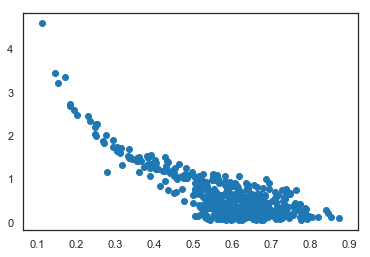

In [120]:
plt.scatter(n_arr22, y_arr22)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()


#save_result("Adam_1650375122", plt, n_arr22, y_arr22)

In [46]:
# Adam_1642197562   / 3 crit
a2, b2, y_arr2, n_arr2 = v4_prepare_data_from_files('Adam_1650314680', 0.5)
print(a2, b2)

1.0356391427588143 1.0390925656073304
0 || 1.0390925656073304 || 1 || 0 
0.9327059935522201 0.5421051855367081
0 || 0.5421051855367081 || 0 || 0 
1.1015122945211606 1.8616750882971742
0 || 1.8616750882971742 || 0 || 0 
1.1617599650303203 1.3332949195360093
0 || 1.3332949195360093 || 1 || 0 
0.5786392564572244 0.37508853171438794
0 || 0.37508853171438794 || 0 || 0 
0.667237859573186 0.43372744377254213
1 || 0.43372744377254213 || 1 || 0 
0.3624729621547543 0.1971475085932363
1 || 0.1971475085932363 || 1 || 1 
0.5538606793763085 0.3628145544243657
1 || 0.3628145544243657 || 0 || 0 
1.219451501304579 2.104045878470742
1 || 2.104045878470742 || 0 || 0 
1.2746217986217878 1.2852252369834274
1 || 1.2852252369834274 || 0 || 0 
0.6501359192228805 0.36288703483169105
2 || 0.36288703483169105 || 0 || 0 
0.34567215700434467 0.20900961844719113
2 || 0.20900961844719113 || 0 || 0 
1.3327367817903497 1.5521731071103764
2 || 1.5521731071103764 || 0 || 0 
0.9763228199064219 0.5796285028956522
2 || 0.5

0.924984877727101 0.623620793995532
22 || 0.623620793995532 || 0 || 0 
1.1159044942213863 0.5928985864238117
22 || 0.5928985864238117 || 0 || 0 
0.32785058396352246 0.18723004220525918
22 || 0.18723004220525918 || 0 || 0 
0.40844861838997265 0.21742699850211394
22 || 0.21742699850211394 || 0 || 0 
1.158660763796695 2.269269224699603
23 || 2.269269224699603 || 0 || 0 
1.1199602091349385 0.9484629709721022
23 || 0.9484629709721022 || 0 || 0 
1.1311437919146308 1.1058587138145357
23 || 1.1058587138145357 || 0 || 0 
0.5658791547697662 0.3042577383870924
23 || 0.3042577383870924 || 1 || 0 
0.8064558140385314 0.7164118979164119
23 || 0.7164118979164119 || 1 || 0 
0.32061548908712206 0.1776000761481537
24 || 0.1776000761481537 || 0 || 0 
1.1188183856086957 1.9749914764695127
24 || 1.9749914764695127 || 1 || 0 
1.0470589034639552 0.9266439744599095
24 || 0.9266439744599095 || 1 || 0 
0.39006447176651265 0.22229111888106412
24 || 0.22229111888106412 || 0 || 0 
1.1327053000160485 1.3257298562723

0.6858458868961476 0.452565457230908
44 || 0.452565457230908 || 0 || 0 
0.49057899483029965 0.27547443284157286
44 || 0.27547443284157286 || 0 || 0 
0.21602419650971025 0.11076326321382451
44 || 0.11076326321382451 || 0 || 0 
1.141928586411128 0.8613341089959254
45 || 0.8613341089959254 || 1 || 0 
1.5082412934049112 1.7171617032508626
45 || 1.7171617032508626 || 0 || 0 
0.2571881574298463 0.13595803816667637
45 || 0.13595803816667637 || 0 || 0 
0.48853204081791507 0.2601560083753138
45 || 0.2601560083753138 || 1 || 1 
0.7887846026557931 0.5918224746790305
45 || 0.5918224746790305 || 1 || 0 
0.576801019218324 0.37403077217422515
46 || 0.37403077217422515 || 1 || 0 
0.5274666577534016 0.34662401811860893
46 || 0.34662401811860893 || 1 || 0 
0.2568558651544668 0.1314092747907213
46 || 0.1314092747907213 || 0 || 0 
1.538162907360995 1.6925391591511225
46 || 1.6925391591511225 || 0 || 0 
1.270057464623028 1.3714672172208233
46 || 1.3714672172208233 || 0 || 0 
0.8207078691354499 0.5836052149

1.5274471439125075 1.0429976081796675
66 || 1.0429976081796675 || 0 || 0 
1.2809800172283625 1.9826339822949495
66 || 1.9826339822949495 || 0 || 0 
1.497281638817574 2.5438859669699743
67 || 2.5438859669699743 || 0 || 0 
0.21577668469485844 0.11052192942584478
67 || 0.11052192942584478 || 0 || 0 
1.308684790757663 1.5861055592391125
67 || 1.5861055592391125 || 0 || 0 
0.23315820035669463 0.12396551095691795
67 || 0.12396551095691795 || 0 || 0 
1.238879587859721 1.372001698762824
67 || 1.372001698762824 || 0 || 0 
0.5787735710748766 0.39320330011121807
68 || 0.39320330011121807 || 0 || 0 
0.15574803695876635 0.08845903857766228
68 || 0.08845903857766228 || 0 || 0 
1.2215782876490657 2.09693929707473
68 || 2.09693929707473 || 0 || 0 
1.3985013605654075 2.5161485479024406
68 || 2.5161485479024406 || 1 || 0 
0.8226044460271704 0.48618297688938333
68 || 0.48618297688938333 || 0 || 0 
1.4638150731944466 1.0275983697892277
69 || 1.0275983697892277 || 0 || 0 
0.1321339169643568 0.0632445823190

1.1867604708630586 1.4831882494919753
88 || 1.4831882494919753 || 0 || 0 
0.4523748065051462 0.3308742384167512
89 || 0.3308742384167512 || 0 || 0 
0.44118487881134255 0.30691886215996655
89 || 0.30691886215996655 || 0 || 0 
1.4012321295772339 0.7771731102527221
89 || 0.7771731102527221 || 0 || 0 
0.1369335708048625 0.06295682127046912
89 || 0.06295682127046912 || 0 || 0 
1.0685681774188376 1.6081939335415971
89 || 1.6081939335415971 || 0 || 0 
0.1990414408529261 0.09416726087314646
90 || 0.09416726087314646 || 0 || 0 
1.3696602579278074 0.8455422972552892
90 || 0.8455422972552892 || 0 || 0 
0.6913190343861402 0.51559546227337
90 || 0.51559546227337 || 0 || 0 
1.1472943260452275 2.299789549083813
90 || 2.299789549083813 || 1 || 0 
1.2674688722483052 2.1141733587116813
90 || 2.1141733587116813 || 0 || 0 
1.1545824022354612 0.9985362013898197
91 || 0.9985362013898197 || 1 || 0 
1.1186547159270288 1.2160036148009954
91 || 1.2160036148009954 || 1 || 0 
0.403863320489587 0.224064016668646
9

0.7495840852843347 0.5502534759250096
111 || 0.5502534759250096 || 0 || 0 
0.29642383645311055 0.1653144399727773
111 || 0.1653144399727773 || 0 || 0 
0.8198506772233354 0.51408925056193
111 || 0.51408925056193 || 0 || 0 
0.2535974465088446 0.13807485327976515
111 || 0.13807485327976515 || 0 || 0 
0.9929290230785354 0.6948160572520684
111 || 0.6948160572520684 || 0 || 0 
0.5196482732406525 0.2801446030163039
112 || 0.2801446030163039 || 0 || 0 
1.1497350962694755 1.3784269949589671
112 || 1.3784269949589671 || 0 || 0 
0.3885433292453096 0.2655476751979371
112 || 0.2655476751979371 || 0 || 0 
0.35845806421313314 0.23954363546717355
112 || 0.23954363546717355 || 1 || 1 
1.250734597538754 2.5104240927532944
112 || 2.5104240927532944 || 0 || 0 
0.966220419988638 0.7023943973016822
113 || 0.7023943973016822 || 0 || 0 
0.9166958388319744 0.5966099556801826
113 || 0.5966099556801826 || 0 || 0 
1.0858629593596656 1.5417682907992294
113 || 1.5417682907992294 || 1 || 0 
0.8222225043309237 0.4424

0.3138643210895887 0.1747280904294682
132 || 0.1747280904294682 || 0 || 0 
0.29692838727206566 0.18267736952168653
133 || 0.18267736952168653 || 0 || 0 
0.8915741819691161 0.4706861873359304
133 || 0.4706861873359304 || 0 || 0 
0.3280771911387553 0.1756477526113431
133 || 0.1756477526113431 || 0 || 0 
0.38226236829562366 0.23694637540832805
133 || 0.23694637540832805 || 0 || 0 
1.0542000477190778 0.8512089685840297
133 || 0.8512089685840297 || 0 || 0 
0.3317978989815102 0.18890406583050143
134 || 0.18890406583050143 || 0 || 0 
0.3918016433608809 0.20749004922499803
134 || 0.20749004922499803 || 0 || 0 
0.539379740773868 0.3187454177248552
134 || 0.3187454177248552 || 0 || 0 
0.9772817451269552 0.6617186856680608
134 || 0.6617186856680608 || 1 || 0 
0.13569224221562778 0.07205313917693809
134 || 0.07205313917693809 || 0 || 0 
0.3529830823989972 0.19756477612269627
135 || 0.19756477612269627 || 0 || 0 
0.3115838258081269 0.1567031245245557
135 || 0.1567031245245557 || 1 || 1 
0.229996878

1.3923580994504976 1.4720909334804675
154 || 1.4720909334804675 || 0 || 0 
0.5474495932570161 0.29123567572739206
154 || 0.29123567572739206 || 0 || 0 
0.19297289652852542 0.11066976362899507
155 || 0.11066976362899507 || 0 || 0 
0.5079421881190646 0.28648251035293215
155 || 0.28648251035293215 || 1 || 0 
0.679796328836873 0.5499126452290768
155 || 0.5499126452290768 || 0 || 0 
0.43778008235136007 0.2493668746856831
155 || 0.2493668746856831 || 0 || 0 
0.5073503093601928 0.26799289398911746
155 || 0.26799289398911746 || 1 || 0 
1.4750652130609392 1.233236978393812
156 || 1.233236978393812 || 0 || 0 
0.7995987785081504 0.7586931012232635
156 || 0.7586931012232635 || 1 || 0 
0.5871931662303209 0.34065598544205294
156 || 0.34065598544205294 || 0 || 0 
1.3312796708212578 1.7376615783296239
156 || 1.7376615783296239 || 0 || 0 
1.2557842761627251 1.3508959092710027
156 || 1.3508959092710027 || 0 || 0 
0.4743481211589266 0.26576207658479484
157 || 0.26576207658479484 || 0 || 0 
1.033523512085

1.423208409945329 2.734666894583993
176 || 2.734666894583993 || 0 || 0 
0.6960894553132958 0.39269277510739475
176 || 0.39269277510739475 || 0 || 0 
1.4328547292495966 1.8174547841964164
176 || 1.8174547841964164 || 0 || 0 
0.7226159324482945 0.39879969965300915
177 || 0.39879969965300915 || 0 || 0 
1.3936863757185955 1.5338924825077875
177 || 1.5338924825077875 || 0 || 0 
0.6577335157779526 0.499938163548533
177 || 0.499938163548533 || 1 || 0 
1.1364328037383287 1.2732857649352662
177 || 1.2732857649352662 || 0 || 0 
1.3780924118054925 1.1563674387004534
177 || 1.1563674387004534 || 1 || 0 
1.3636773383149248 0.8383405819275415
178 || 0.8383405819275415 || 1 || 0 
0.7538163066206329 0.4843920205797104
178 || 0.4843920205797104 || 0 || 0 
1.2678954018426674 1.7657665410088859
178 || 1.7657665410088859 || 0 || 0 
0.19974278886146582 0.09850241655526558
178 || 0.09850241655526558 || 1 || 1 
0.7555724964593158 0.6213270784760923
178 || 0.6213270784760923 || 0 || 0 
0.42996143355342614 0.2

0.851700430088567 0.6049382537778815
198 || 0.6049382537778815 || 0 || 0 
0.41289384362041953 0.21239306293703014
198 || 0.21239306293703014 || 0 || 0 
0.44093231211456 0.28095794162207927
198 || 0.28095794162207927 || 0 || 0 
1.0632686125056459 1.0505199352856955
199 || 1.0505199352856955 || 0 || 0 
0.6099570164658942 0.34580212490231005
199 || 0.34580212490231005 || 0 || 0 
0.27834660242470727 0.14750059129375548
199 || 0.14750059129375548 || 0 || 0 
0.9564650550904891 1.0217855639754487
199 || 1.0217855639754487 || 1 || 0 
1.2888277981280283 1.9788075304032782
199 || 1.9788075304032782 || 1 || 0 
0.19604046918805004 0.11770873762533036
200 || 0.11770873762533036 || 0 || 0 
0.3811620943405258 0.22481221390407705
200 || 0.22481221390407705 || 0 || 0 
1.1437967854186424 1.4539590518544803
200 || 1.4539590518544803 || 0 || 0 
0.2594353697707608 0.15054354020239225
200 || 0.15054354020239225 || 0 || 0 
0.16051282495389754 0.07440271601159834
200 || 0.07440271601159834 || 0 || 0 
0.386760

1.2821612102881377 1.3740450567653382
220 || 1.3740450567653382 || 1 || 0 
1.1458890776522777 0.6430671090577454
220 || 0.6430671090577454 || 0 || 0 
1.0781585144584296 1.2253877423322879
220 || 1.2253877423322879 || 0 || 0 
0.5957291973859095 0.4180844373996301
220 || 0.4180844373996301 || 0 || 0 
0.21709201131426903 0.11034890665403559
221 || 0.11034890665403559 || 0 || 0 
1.217192656185467 0.9220669949637993
221 || 0.9220669949637993 || 1 || 0 
0.4284541790233288 0.23777001057142466
221 || 0.23777001057142466 || 0 || 0 
1.2609059306063235 2.5562512310004872
221 || 2.5562512310004872 || 0 || 0 
0.6396879523820749 0.34171336140234815
221 || 0.34171336140234815 || 0 || 0 
0.467762691279666 0.27125598661130557
222 || 0.27125598661130557 || 0 || 0 
0.31723158206034385 0.17499837399738583
222 || 0.17499837399738583 || 0 || 0 
0.772597618902802 0.4664309846671895
222 || 0.4664309846671895 || 0 || 0 
1.2132813042386197 1.4660486977309741
222 || 1.4660486977309741 || 0 || 0 
1.12012405808356

0.6366365077073323 0.5121249952034072
242 || 0.5121249952034072 || 0 || 0 
0.5011155624449429 0.2965080091361596
242 || 0.2965080091361596 || 1 || 0 
0.46851863125298004 0.24663133289823813
242 || 0.24663133289823813 || 0 || 0 
1.456741904588734 1.0832023672587947
242 || 1.0832023672587947 || 0 || 0 
0.18823625586293688 0.1004642910351432
242 || 0.1004642910351432 || 0 || 0 
1.2768123757849994 1.4398866913800987
243 || 1.4398866913800987 || 0 || 0 
0.1650711898428294 0.09334064816580852
243 || 0.09334064816580852 || 1 || 1 
0.5084535723123644 0.2871248160401362
243 || 0.2871248160401362 || 0 || 0 
0.7443368469145243 0.41054761259924827
243 || 0.41054761259924827 || 0 || 0 
1.335073420027421 0.886307074471198
243 || 0.886307074471198 || 0 || 0 
1.1193557401458036 0.883745703752097
244 || 0.883745703752097 || 0 || 0 
0.29011682437058134 0.16205471369413238
244 || 0.16205471369413238 || 1 || 1 
1.0598860740305678 1.0490012682739476
244 || 1.0490012682739476 || 0 || 0 
0.6074004610355703 0

0.32447505101380814 0.17383045899294702
264 || 0.17383045899294702 || 0 || 0 
0.9567073285148346 0.8616763768551099
264 || 0.8616763768551099 || 1 || 0 
0.305003614946369 0.18023704479061609
264 || 0.18023704479061609 || 0 || 0 
0.3477360443640279 0.1867221331203212
264 || 0.1867221331203212 || 0 || 0 
0.7329112994278076 0.38409137438665714
264 || 0.38409137438665714 || 1 || 0 
0.7396245418003712 0.5056877513151192
265 || 0.5056877513151192 || 0 || 0 
0.4839126090158899 0.2735851444253441
265 || 0.2735851444253441 || 0 || 0 
0.3808730124965036 0.20486687369628515
265 || 0.20486687369628515 || 0 || 0 
0.8964414810013475 0.5571426509766737
265 || 0.5571426509766737 || 0 || 0 
1.053917840110416 1.549675699924791
265 || 1.549675699924791 || 0 || 0 
0.6472854722369369 0.35627886083516935
266 || 0.35627886083516935 || 0 || 0 
0.4930028604909577 0.3384301062271284
266 || 0.3384301062271284 || 0 || 0 
0.8008882294844949 0.5458535376569583
266 || 0.5458535376569583 || 1 || 0 
0.5252032201231843

0.5675770564035392 0.33735025944956204
285 || 0.33735025944956204 || 0 || 0 
1.1644330272224404 1.0046977863517121
286 || 1.0046977863517121 || 0 || 0 
1.259561589831735 1.2694600167433239
286 || 1.2694600167433239 || 1 || 0 
1.2543503231527768 1.7383462801553133
286 || 1.7383462801553133 || 0 || 0 
1.1898883252945376 0.6280492122503945
286 || 0.6280492122503945 || 1 || 0 
1.0893728565000484 1.1070596941691002
286 || 1.1070596941691002 || 0 || 0 
1.2147883085973101 1.482505417632737
287 || 1.482505417632737 || 0 || 0 
0.5675590304855721 0.3058034151665008
287 || 0.3058034151665008 || 0 || 0 
0.4533223228621503 0.2768869557272712
287 || 0.2768869557272712 || 0 || 0 
0.1979400497878984 0.11505608720856603
287 || 0.11505608720856603 || 1 || 1 
0.5767875064066738 0.38058256423344144
287 || 0.38058256423344144 || 0 || 0 
0.6999392352099726 0.42459015602041517
288 || 0.42459015602041517 || 1 || 0 
0.8652059916108433 0.44916340447916564
288 || 0.44916340447916564 || 0 || 0 
0.3324999530481657

0.13726346667358272 0.08132928782995937
307 || 0.08132928782995937 || 1 || 1 
1.311432508555615 1.4315597268985734
307 || 1.4315597268985734 || 0 || 0 
0.20475333459580372 0.1116553412965156
308 || 0.1116553412965156 || 0 || 0 
0.1362896871910874 0.07979049617492832
308 || 0.07979049617492832 || 0 || 0 
1.1203065204035416 1.2475668254780037
308 || 1.2475668254780037 || 0 || 0 
1.3509867305079677 2.0182589486450238
308 || 2.0182589486450238 || 1 || 0 
1.4771984593619143 2.2634595026013398
308 || 2.2634595026013398 || 1 || 0 
1.0273483125702199 0.6265571042318383
309 || 0.6265571042318383 || 0 || 0 
0.7947428800442279 0.6569383861871975
309 || 0.6569383861871975 || 1 || 0 
0.8345528794605371 0.5457781079581465
309 || 0.5457781079581465 || 1 || 0 
0.5685973596951445 0.3304996675003137
309 || 0.3304996675003137 || 1 || 0 
1.5877975367687565 1.2535538912449025
309 || 1.2535538912449025 || 0 || 0 
0.19967197804628145 0.12498776903487949
310 || 0.12498776903487949 || 0 || 0 
1.311384292628072

0.3702336294144694 0.19996106859371007
329 || 0.19996106859371007 || 0 || 0 
0.9475261995836314 0.7061539305057642
329 || 0.7061539305057642 || 1 || 0 
0.5859135266725538 0.3381998425270812
329 || 0.3381998425270812 || 1 || 0 
0.9366592826465373 0.6881428308302813
330 || 0.6881428308302813 || 1 || 0 
1.1522623723088312 0.8168096813876946
330 || 0.8168096813876946 || 0 || 0 
0.7254387655612976 0.48556011513648106
330 || 0.48556011513648106 || 0 || 0 
0.2006878148798722 0.12048356323379021
330 || 0.12048356323379021 || 1 || 1 
0.44393544085524245 0.243485197983709
330 || 0.243485197983709 || 0 || 0 
1.3217161844041905 1.7018565551142406
331 || 1.7018565551142406 || 0 || 0 
1.216784952499489 1.5566119563144731
331 || 1.5566119563144731 || 0 || 0 
1.1535541416822723 1.1923239034381599
331 || 1.1923239034381599 || 0 || 0 
1.4157829940218887 2.2336075256158807
331 || 2.2336075256158807 || 1 || 0 
0.6721601214700299 0.37920129096517863
331 || 0.37920129096517863 || 0 || 0 
1.2346080945849598 

1.4208993803070822 2.2426675419099213
351 || 2.2426675419099213 || 0 || 0 
0.7358965665172456 0.40944171828616993
351 || 0.40944171828616993 || 0 || 0 
0.392707302361844 0.2523816014136097
351 || 0.2523816014136097 || 1 || 1 
1.0483534069746923 0.895820940082107
352 || 0.895820940082107 || 0 || 0 
1.045834726075513 1.4463928536175046
352 || 1.4463928536175046 || 1 || 0 
0.3309146363414552 0.17192611168360555
352 || 0.17192611168360555 || 1 || 1 
1.2156660504700862 2.592872133169417
352 || 2.592872133169417 || 0 || 0 
0.9451798134221066 0.5450865280949222
352 || 0.5450865280949222 || 0 || 0 
0.13656670787260272 0.07682900274587795
353 || 0.07682900274587795 || 0 || 0 
0.8925443948116043 0.49663020858956014
353 || 0.49663020858956014 || 0 || 0 
0.2276261744565891 0.12124997173535557
353 || 0.12124997173535557 || 0 || 0 
0.16341108831355125 0.08917018355174267
353 || 0.08917018355174267 || 0 || 0 
1.1187976146750296 1.183626928008746
353 || 1.183626928008746 || 0 || 0 
1.2144122548823202 

1.1667321266303294 1.8384377527810676
373 || 1.8384377527810676 || 0 || 0 
0.9700131688794634 0.9193078629939324
373 || 0.9193078629939324 || 0 || 0 
0.4819360966862815 0.34822985198312173
373 || 0.34822985198312173 || 0 || 0 
0.38856216637708085 0.26598510050126883
374 || 0.26598510050126883 || 0 || 0 
0.7576131236371393 0.5955234575431746
374 || 0.5955234575431746 || 0 || 0 
1.208076617775528 2.3636430119316447
374 || 2.3636430119316447 || 0 || 0 
1.4820629145492428 1.6851255292424547
374 || 1.6851255292424547 || 0 || 0 
0.6688226109750586 0.3984066166943663
374 || 0.3984066166943663 || 0 || 0 
1.4419370894613739 0.7611052894069561
375 || 0.7611052894069561 || 0 || 0 
1.4550316867775661 1.2081345237733498
375 || 1.2081345237733498 || 0 || 0 
1.1010872424688707 0.5871815139950779
375 || 0.5871815139950779 || 1 || 0 
0.48418046973680545 0.28756561456960034
375 || 0.28756561456960034 || 0 || 0 
0.1313545878896222 0.06866482611551973
375 || 0.06866482611551973 || 1 || 1 
1.13479709547397

0.7506285732482444 0.431532102412256
395 || 0.431532102412256 || 0 || 0 
1.1965458491711087 1.6982321310072965
395 || 1.6982321310072965 || 0 || 0 
0.7975013011453033 0.5553893872529626
395 || 0.5553893872529626 || 0 || 0 
0.9675475381488274 0.6556326424380434
395 || 0.6556326424380434 || 0 || 0 
0.7383487781684187 0.41150163822280816
396 || 0.41150163822280816 || 0 || 0 
1.045977157161997 0.7399693820645029
396 || 0.7399693820645029 || 0 || 0 
1.2874555549762976 2.3942731996937634
396 || 2.3942731996937634 || 0 || 0 
1.2718572509586157 1.1167370313611409
396 || 1.1167370313611409 || 0 || 0 
0.2991390362881057 0.16879862647531682
396 || 0.16879862647531682 || 0 || 0 
1.4578975100549811 1.5752790344483338
397 || 1.5752790344483338 || 1 || 0 
1.0159220157019797 0.635083436817373
397 || 0.635083436817373 || 1 || 0 
0.4050189154015147 0.2373472197780724
397 || 0.2373472197780724 || 0 || 0 
1.1877254956155887 1.338246300381525
397 || 1.338246300381525 || 0 || 0 
0.8233975500343077 0.5201888

1.0778113282542556 0.7513533642253518
417 || 0.7513533642253518 || 0 || 0 
1.378348632132484 1.8876460435648628
417 || 1.8876460435648628 || 0 || 0 
0.9081794790913541 0.7112966790448942
417 || 0.7112966790448942 || 1 || 0 
0.9563840018302491 0.566810944614958
417 || 0.566810944614958 || 0 || 0 
0.37289997582768825 0.2129465005620877
417 || 0.2129465005620877 || 1 || 1 
1.3981044386583852 2.0464360700137503
418 || 2.0464360700137503 || 0 || 0 
1.0920052235544193 1.1848226701465132
418 || 1.1848226701465132 || 0 || 0 
0.26730293533557403 0.15208510133483374
418 || 0.15208510133483374 || 1 || 1 
1.6760424185638794 0.8035647084017059
418 || 0.8035647084017059 || 0 || 0 
0.22179653298714427 0.11747716378629433
418 || 0.11747716378629433 || 0 || 0 
1.4556091091507417 1.683968532680096
419 || 1.683968532680096 || 0 || 0 
0.21513271781245746 0.11946394481648215
419 || 0.11946394481648215 || 0 || 0 
1.0334183208774679 0.6631111713888075
419 || 0.6631111713888075 || 0 || 0 
1.0746962926915706 0

0.16542659243976995 0.09282631839252571
439 || 0.09282631839252571 || 1 || 1 
0.922272208007889 0.6819242391458618
439 || 0.6819242391458618 || 0 || 0 
1.2759909866912345 2.0257451864166747
439 || 2.0257451864166747 || 1 || 0 
1.1168322122932868 0.7999912466938001
439 || 0.7999912466938001 || 1 || 0 
0.1253499001209 0.06757610547919961
439 || 0.06757610547919961 || 0 || 0 
1.173320673021303 0.6553427294143828
440 || 0.6553427294143828 || 0 || 0 
1.3790784075914795 1.2944069411545276
440 || 1.2944069411545276 || 0 || 0 
0.6739404982056388 0.3592294921421152
440 || 0.3592294921421152 || 0 || 0 
0.27941272145624646 0.15655225268851547
440 || 0.15655225268851547 || 0 || 0 
1.2439440472609349 1.450617957731839
440 || 1.450617957731839 || 0 || 0 
0.2923493368676452 0.15158207823291325
441 || 0.15158207823291325 || 1 || 1 
0.53038361131551 0.301128143619778
441 || 0.301128143619778 || 0 || 0 
0.30204624905376937 0.17764167138701467
441 || 0.17764167138701467 || 0 || 0 
1.3234225615874433 1.48

1.1305032950549923 0.7626707409325483
460 || 0.7626707409325483 || 0 || 0 
0.7375792277154187 0.41669049755781784
461 || 0.41669049755781784 || 1 || 0 
0.5848668169326481 0.33292662300865145
461 || 0.33292662300865145 || 0 || 0 
0.16351974272430117 0.07482548624079403
461 || 0.07482548624079403 || 1 || 1 
1.215720461583109 1.3557821612434457
461 || 1.3557821612434457 || 0 || 0 
0.4282966934850954 0.2372135217830676
461 || 0.2372135217830676 || 0 || 0 
0.7758494332229465 0.5804799850635389
462 || 0.5804799850635389 || 0 || 0 
1.2125984653724735 1.0109313220583098
462 || 1.0109313220583098 || 0 || 0 
1.0772918841804422 1.1516349473988532
462 || 1.1516349473988532 || 0 || 0 
1.2794523517210863 1.0546344600185513
462 || 1.0546344600185513 || 0 || 0 
0.9744349366993603 0.9402892097407458
462 || 0.9402892097407458 || 0 || 0 
0.7644930446035875 0.4781832808286296
463 || 0.4781832808286296 || 0 || 0 
0.2277243242082262 0.12764820197169674
463 || 0.12764820197169674 || 0 || 0 
0.153439929101154

0.2578132850214582 0.12126100441117306
482 || 0.12126100441117306 || 1 || 1 
0.7319738671623722 0.452359575762863
482 || 0.452359575762863 || 1 || 0 
1.3072869453680378 1.6953817385222538
483 || 1.6953817385222538 || 1 || 0 
0.5353285052264419 0.3023220421003283
483 || 0.3023220421003283 || 0 || 0 
0.18376916669683271 0.09230880923637158
483 || 0.09230880923637158 || 0 || 0 
0.3586737273568545 0.19449876769443974
483 || 0.19449876769443974 || 0 || 0 
0.4769003042810113 0.31851130731231175
483 || 0.31851130731231175 || 0 || 0 
1.2214147769907864 1.9848712724935456
484 || 1.9848712724935456 || 1 || 0 
1.3276649370558393 1.6941073252190648
484 || 1.6941073252190648 || 0 || 0 
0.19234269789541533 0.112428361828861
484 || 0.112428361828861 || 1 || 1 
1.4533001810714534 0.8216916281762222
484 || 0.8216916281762222 || 0 || 0 
0.17484176809856353 0.10140885626893296
484 || 0.10140885626893296 || 1 || 1 
1.3306248112032486 1.5096234886132542
485 || 1.5096234886132542 || 0 || 0 
1.06254870141565

0.32373044738005624 0.17808341891540103
504 || 0.17808341891540103 || 0 || 0 
0.19368111785564432 0.10389916458848897
504 || 0.10389916458848897 || 0 || 0 
0.9441208087190284 0.6178157870092286
504 || 0.6178157870092286 || 0 || 0 
0.6080184119767155 0.3597790849605702
505 || 0.3597790849605702 || 1 || 0 
0.3223744532913519 0.18844948273791004
505 || 0.18844948273791004 || 0 || 0 
0.42693241694666906 0.23689387904415618
505 || 0.23689387904415618 || 1 || 1 
0.542889816238377 0.31950220147285996
505 || 0.31950220147285996 || 0 || 0 
0.9875075069571452 0.5447095590103114
505 || 0.5447095590103114 || 1 || 0 
0.19134720659472346 0.09588725001905889
506 || 0.09588725001905889 || 1 || 1 
1.246510617663516 1.1688005225555087
506 || 1.1688005225555087 || 0 || 0 
0.36500753891235177 0.21247840199701187
506 || 0.21247840199701187 || 1 || 1 
0.23661485883515967 0.13423648809755256
506 || 0.13423648809755256 || 0 || 0 
1.047024720507351 2.0783709961938124
506 || 2.0783709961938124 || 0 || 0 
0.5561

0.20919262123147508 0.09295478544362897
526 || 0.09295478544362897 || 1 || 1 
1.1562546190944125 2.0600375939760953
526 || 2.0600375939760953 || 0 || 0 
1.7565833143158196 1.1807110383980286
526 || 1.1807110383980286 || 1 || 0 
0.10773568853911865 0.058133023352202357
526 || 0.058133023352202357 || 0 || 0 
0.4928242922113845 0.3450733468348337
527 || 0.3450733468348337 || 1 || 1 
0.18028441069058113 0.09125077772484
527 || 0.09125077772484 || 0 || 0 
1.2010341243303435 1.0405806596909997
527 || 1.0405806596909997 || 0 || 0 
0.7941850456756336 0.7697617698067322
527 || 0.7697617698067322 || 0 || 0 
1.1001496075929864 1.6170542709660518
527 || 1.6170542709660518 || 1 || 0 
1.3138880329028533 1.2821677225824901
528 || 1.2821677225824901 || 0 || 0 
1.4762610068658664 1.527560542637128
528 || 1.527560542637128 || 0 || 0 
0.19438379481650514 0.10966935105633338
528 || 0.10966935105633338 || 0 || 0 
1.2964519027703776 2.3356482993243106
528 || 2.3356482993243106 || 0 || 0 
1.3264855200502441 

0.7471440282205603 0.4952661134852037
548 || 0.4952661134852037 || 1 || 0 
1.0705272956407461 1.0187531220288912
548 || 1.0187531220288912 || 0 || 0 
0.9315398943504464 0.524661873961602
548 || 0.524661873961602 || 0 || 0 
0.8501457595786203 0.6783317483039075
548 || 0.6783317483039075 || 0 || 0 
1.2180346804852502 1.8775019016322019
548 || 1.8775019016322019 || 0 || 0 
0.4703613585982553 0.27160795919033237
549 || 0.27160795919033237 || 0 || 0 
0.48615710323547856 0.2768125610086381
549 || 0.2768125610086381 || 0 || 0 
0.47307021319427006 0.2867054905074451
549 || 0.2867054905074451 || 0 || 0 
1.3012046086871203 1.988521271873583
549 || 1.988521271873583 || 0 || 0 
0.8057014753130275 0.5213828721040965
549 || 0.5213828721040965 || 0 || 0 
0.5986325664408773 0.34357660242289023
550 || 0.34357660242289023 || 0 || 0 
1.29109434686646 2.4996117404468663
550 || 2.4996117404468663 || 0 || 0 
1.0693079352020036 0.5955170554605491
550 || 0.5955170554605491 || 0 || 0 
0.6706329944695404 0.3569

1.2160574842474885 1.2651922470610126
570 || 1.2651922470610126 || 1 || 0 
0.37394371853539243 0.2038669256757186
570 || 0.2038669256757186 || 0 || 0 
0.2419118530808693 0.14956942820041247
570 || 0.14956942820041247 || 0 || 0 
0.559624320922783 0.3906419307940104
570 || 0.3906419307940104 || 0 || 0 
0.23222187914215162 0.13989185657248662
570 || 0.13989185657248662 || 0 || 0 
0.20683351417399676 0.11094188149965664
571 || 0.11094188149965664 || 0 || 0 
0.8098128040747316 0.4909054180496534
571 || 0.4909054180496534 || 0 || 0 
0.6241010204316276 0.38398053751713285
571 || 0.38398053751713285 || 0 || 0 
0.3968633725608585 0.20484967780695568
571 || 0.20484967780695568 || 1 || 1 
0.5227426591194146 0.2954167743330223
571 || 0.2954167743330223 || 1 || 0 
0.8493220992320484 0.47334753283524844
572 || 0.47334753283524844 || 0 || 0 
1.315534583303085 1.006889395537104
572 || 1.006889395537104 || 1 || 0 
0.36002594924251036 0.20751389872812656
572 || 0.20751389872812656 || 0 || 0 
1.277412548

1.2755936607838632 0.8843563432942606
591 || 0.8843563432942606 || 0 || 0 
0.5772341807855421 0.3471159329964829
592 || 0.3471159329964829 || 0 || 0 
1.3642987063622511 0.954267956909035
592 || 0.954267956909035 || 0 || 0 
0.741610058102954 0.3889264024076913
592 || 0.3889264024076913 || 0 || 0 
0.893607571199627 0.48579458064691966
592 || 0.48579458064691966 || 0 || 0 
0.8532114075763184 0.5240839535679382
592 || 0.5240839535679382 || 1 || 0 
0.5383352192236531 0.3581067775923629
593 || 0.3581067775923629 || 0 || 0 
0.5405695735317144 0.440296706719221
593 || 0.440296706719221 || 0 || 0 
0.5923877553929512 0.4160900490276845
593 || 0.4160900490276845 || 0 || 0 
0.5713775207733054 0.35304982906578114
593 || 0.35304982906578114 || 0 || 0 
1.3679894163445123 2.810417190847903
593 || 2.810417190847903 || 0 || 0 
0.38453154256688515 0.24856527470644038
594 || 0.24856527470644038 || 1 || 1 
1.3098587995378044 1.3275735006032967
594 || 1.3275735006032967 || 0 || 0 
0.7266194723248128 0.60334

0.9399470436521115 0.7582749431459984
613 || 0.7582749431459984 || 0 || 0 
1.2094845177485662 1.5787625060264465
613 || 1.5787625060264465 || 1 || 0 
0.6276649741326488 0.3449230821242437
614 || 0.3449230821242437 || 0 || 0 
1.1132272036912338 1.2524277536749127
614 || 1.2524277536749127 || 0 || 0 
1.1073757534379007 1.42341898292501
614 || 1.42341898292501 || 0 || 0 
1.3947662339750042 2.502446124121721
614 || 2.502446124121721 || 0 || 0 
0.4075860926255608 0.25083267410260995
614 || 0.25083267410260995 || 1 || 1 
0.17820820631358783 0.0956038521457321
615 || 0.0956038521457321 || 1 || 1 
0.5140327705721442 0.3513133539461487
615 || 0.3513133539461487 || 0 || 0 
1.4468855245110313 1.5394482350968024
615 || 1.5394482350968024 || 0 || 0 
0.4290186436466201 0.2316184562378711
615 || 0.2316184562378711 || 0 || 0 
0.8584889294142323 0.6768768207901195
615 || 0.6768768207901195 || 1 || 0 
0.2854475875213533 0.1794437361366373
616 || 0.1794437361366373 || 0 || 0 
0.8447348898478376 0.7807928

0.7993045349315291 0.5388124600727437
635 || 0.5388124600727437 || 0 || 0 
0.20668655826545046 0.11327243901949753
635 || 0.11327243901949753 || 0 || 0 
1.3178142028994186 1.164788702729936
636 || 1.164788702729936 || 0 || 0 
0.7899558174998135 0.5232912193329783
636 || 0.5232912193329783 || 0 || 0 
0.7995329287037021 0.5266148587307475
636 || 0.5266148587307475 || 0 || 0 
0.771778888786845 0.6023999648614301
636 || 0.6023999648614301 || 0 || 0 
1.0923546903651997 1.6489725136561668
636 || 1.6489725136561668 || 0 || 0 
1.1639159661661223 2.3820130081712727
637 || 2.3820130081712727 || 0 || 0 
1.4069037057784552 1.3668196107771984
637 || 1.3668196107771984 || 0 || 0 
0.8602350062023728 0.5798401488044319
637 || 0.5798401488044319 || 1 || 0 
1.2833575603565355 1.4017528974036713
637 || 1.4017528974036713 || 0 || 0 
0.7964521617754506 0.5223292906573516
637 || 0.5223292906573516 || 0 || 0 
0.24273051317318226 0.1259771999530206
638 || 0.1259771999530206 || 1 || 1 
0.5279101379703232 0.272

0.6862680871384166 0.4692978998312
657 || 0.4692978998312 || 0 || 0 
0.48244709964204396 0.2703566373039154
657 || 0.2703566373039154 || 0 || 0 
1.1715716527917637 1.508192650920953
657 || 1.508192650920953 || 0 || 0 
1.0506780777001852 0.5765395690262632
658 || 0.5765395690262632 || 1 || 0 
1.0094004273351185 0.6685568526091844
658 || 0.6685568526091844 || 0 || 0 
0.5533396630471308 0.39778954856083293
658 || 0.39778954856083293 || 0 || 0 
0.4757804520560294 0.2763298944915588
658 || 0.2763298944915588 || 0 || 0 
0.42627326768982293 0.24832459088851364
658 || 0.24832459088851364 || 0 || 0 
0.5296241853403345 0.28768457695594585
659 || 0.28768457695594585 || 0 || 0 
1.140381273197913 1.5754404044464496
659 || 1.5754404044464496 || 0 || 0 
1.167441124640996 0.8644180790152625
659 || 0.8644180790152625 || 0 || 0 
0.3835962977194593 0.2527506034118247
659 || 0.2527506034118247 || 1 || 1 
1.3406080971559808 1.8008109598631408
659 || 1.8008109598631408 || 0 || 0 
1.3158694306760514 1.758791

0.5211514109999568 0.3040743511183481
679 || 0.3040743511183481 || 0 || 0 
0.08270415528343031 0.04439032565222452
679 || 0.04439032565222452 || 0 || 0 
0.7627575353418518 0.40189539000012725
679 || 0.40189539000012725 || 0 || 0 
0.27572807228457236 0.1398266774092622
680 || 0.1398266774092622 || 0 || 0 
0.2859168547050112 0.15823393061787577
680 || 0.15823393061787577 || 0 || 0 
0.8312027864040803 0.6509727103208139
680 || 0.6509727103208139 || 0 || 0 
0.23435031685724747 0.12499792258230787
680 || 0.12499792258230787 || 0 || 0 
1.3857361916905138 1.5308635744755104
680 || 1.5308635744755104 || 0 || 0 
1.1840088234601893 1.520409755517104
681 || 1.520409755517104 || 0 || 0 
1.5123452492720413 1.360326845842255
681 || 1.360326845842255 || 0 || 0 
0.41575549796133004 0.258540231726819
681 || 0.258540231726819 || 1 || 1 
1.3034384912707957 1.4407674709548368
681 || 1.4407674709548368 || 0 || 0 
1.2237000941595453 0.8800829184263002
681 || 0.8800829184263002 || 1 || 0 
1.180036362694745 1

1.429711801072471 2.271350723541607
701 || 2.271350723541607 || 0 || 0 
0.7550816276671782 0.5115429945918203
701 || 0.5115429945918203 || 0 || 0 
0.8043140529746987 0.509859036991081
701 || 0.509859036991081 || 0 || 0 
0.5801503068467265 0.34334499773758537
701 || 0.34334499773758537 || 0 || 0 
1.3386297870563115 1.8592550124043385
702 || 1.8592550124043385 || 0 || 0 
1.194001812342832 1.6281852921696407
702 || 1.6281852921696407 || 0 || 0 
0.770883634257141 0.5053995337250571
702 || 0.5053995337250571 || 0 || 0 
1.1741849984135408 1.692128742680246
702 || 1.692128742680246 || 1 || 0 
1.0393493413811288 0.9529138669056241
702 || 0.9529138669056241 || 0 || 0 
1.4344699903178448 3.025525912191788
703 || 3.025525912191788 || 0 || 0 
0.989611364067077 0.5742496517342971
703 || 0.5742496517342971 || 0 || 0 
0.8963082008378701 0.6047740675613669
703 || 0.6047740675613669 || 1 || 0 
1.2985388326818834 2.324551767644825
703 || 2.324551767644825 || 0 || 0 
1.0530578748746182 0.7100326070225721

0.3591263589254506 0.19179867340800907
723 || 0.19179867340800907 || 0 || 0 
0.608730068920519 0.3380753464822172
723 || 0.3380753464822172 || 0 || 0 
0.20619795773266167 0.1098085717034593
723 || 0.1098085717034593 || 0 || 0 
0.19210916732351777 0.10764926529085618
723 || 0.10764926529085618 || 0 || 0 
0.517506382993141 0.29357506787284665
724 || 0.29357506787284665 || 0 || 0 
0.34570098464590165 0.22681067840027289
724 || 0.22681067840027289 || 0 || 0 
1.338397980087332 2.4990114763178206
724 || 2.4990114763178206 || 0 || 0 
0.3526601206855194 0.2162519342945363
724 || 0.2162519342945363 || 1 || 1 
1.2109941981379033 0.8737234948358923
724 || 0.8737234948358923 || 0 || 0 
0.6485337073212233 0.3894606589477604
725 || 0.3894606589477604 || 0 || 0 
1.2916352762221763 1.053483438875084
725 || 1.053483438875084 || 0 || 0 
1.1790154989149382 1.1168925309069992
725 || 1.1168925309069992 || 0 || 0 
1.4058848644933342 1.4670424288464134
725 || 1.4670424288464134 || 1 || 0 
0.9162746132281899 

0.19719560880840123 0.10542883968355159
745 || 0.10542883968355159 || 0 || 0 
1.0653294482711577 0.7941733912174439
745 || 0.7941733912174439 || 0 || 0 
1.127679803161543 0.7841441997509869
745 || 0.7841441997509869 || 0 || 0 
0.5849733683724022 0.3381490606853004
745 || 0.3381490606853004 || 0 || 0 
1.3331475037567497 1.0972718172015306
745 || 1.0972718172015306 || 1 || 0 
0.7885207398644866 0.49116265955815186
746 || 0.49116265955815186 || 1 || 0 
0.12352175039245654 0.07526277225315335
746 || 0.07526277225315335 || 1 || 1 
1.200671163637811 2.4198091804336626
746 || 2.4198091804336626 || 0 || 0 
0.8367123479842133 0.5408845185836096
746 || 0.5408845185836096 || 0 || 0 
1.4108975336593217 0.6948314306457176
746 || 0.6948314306457176 || 0 || 0 
1.2694166947482037 1.9129670999500503
747 || 1.9129670999500503 || 0 || 0 
1.2089379598004457 1.5490263334107968
747 || 1.5490263334107968 || 0 || 0 
1.1513920376346334 1.6097542198984844
747 || 1.6097542198984844 || 0 || 0 
1.5384438601726051 

1.0731295190564711 0.7584565063975321
766 || 0.7584565063975321 || 0 || 0 
0.2763671331140582 0.13271097786741073
767 || 0.13271097786741073 || 0 || 0 
1.1076295408036287 1.7681370141222363
767 || 1.7681370141222363 || 0 || 0 
1.455171366109579 1.5493488369626427
767 || 1.5493488369626427 || 0 || 0 
1.127194148253971 1.3769159247016138
767 || 1.3769159247016138 || 0 || 0 
0.35409484813297826 0.1963857076183359
767 || 0.1963857076183359 || 0 || 0 
0.4916044069962591 0.3092742279122879
768 || 0.3092742279122879 || 0 || 0 
1.2980508601356833 0.9288248875260733
768 || 0.9288248875260733 || 0 || 0 
1.1542909024789052 0.7274579948903485
768 || 0.7274579948903485 || 0 || 0 
0.32361737043374667 0.1932417877529365
768 || 0.1932417877529365 || 0 || 0 
0.548615845780392 0.34741700369706024
768 || 0.34741700369706024 || 0 || 0 
0.28673178884511596 0.16336117207554263
769 || 0.16336117207554263 || 0 || 0 
1.2590576355023664 2.167190714975959
769 || 2.167190714975959 || 0 || 0 
0.4755666282111521 0.

1.0206252233771838 0.8228766108862905
788 || 0.8228766108862905 || 0 || 0 
0.5558447373477474 0.3562805408881582
788 || 0.3562805408881582 || 0 || 0 
0.15977047414429538 0.08665767035248471
789 || 0.08665767035248471 || 0 || 0 
0.8193645104575529 0.7079537554570048
789 || 0.7079537554570048 || 0 || 0 
0.9517571665102479 0.6052004650462585
789 || 0.6052004650462585 || 1 || 0 
0.1673391875299781 0.10304062798889478
789 || 0.10304062798889478 || 0 || 0 
1.2008716030899576 1.7575394697676432
789 || 1.7575394697676432 || 0 || 0 
0.683478859662713 0.40982337160869525
790 || 0.40982337160869525 || 1 || 0 
0.6523164628538153 0.4202905687171599
790 || 0.4202905687171599 || 0 || 0 
1.0072921055902577 0.8809192911103736
790 || 0.8809192911103736 || 0 || 0 
0.8729779689279432 0.5427189244555103
790 || 0.5427189244555103 || 0 || 0 
0.46305446842920345 0.26395666434459075
790 || 0.26395666434459075 || 0 || 0 
0.6207765241405817 0.35471405999635314
791 || 0.35471405999635314 || 0 || 0 
1.383633140054

0.593709546324389 0.3530257950469536
810 || 0.3530257950469536 || 1 || 0 
1.1574193033969216 0.8044124466284613
810 || 0.8044124466284613 || 0 || 0 
0.6367557874018624 0.3773872628682741
810 || 0.3773872628682741 || 1 || 0 
1.0778883105708077 0.9501608127913691
811 || 0.9501608127913691 || 0 || 0 
1.1803970568696556 0.9693293000109335
811 || 0.9693293000109335 || 0 || 0 
1.185803999510189 1.4208356446939379
811 || 1.4208356446939379 || 0 || 0 
1.1528968559639294 1.011721746185744
811 || 1.011721746185744 || 0 || 0 
1.1149918549034734 1.3305546625517086
811 || 1.3305546625517086 || 1 || 0 
0.23317384777838301 0.12754127769717835
812 || 0.12754127769717835 || 1 || 1 
0.8166708127063035 0.6157736811410316
812 || 0.6157736811410316 || 0 || 0 
1.06527832732038 0.6947499171131414
812 || 0.6947499171131414 || 0 || 0 
1.207293377618576 1.6894868804271466
812 || 1.6894868804271466 || 1 || 0 
0.21742982984006107 0.12065735004916986
812 || 0.12065735004916986 || 0 || 0 
0.7870097381395017 0.42481

1.2199635453670086 1.3256709187667655
832 || 1.3256709187667655 || 1 || 0 
0.182253868946149 0.1039762630178053
832 || 0.1039762630178053 || 0 || 0 
0.703011478117368 0.4091453692736537
832 || 0.4091453692736537 || 0 || 0 
0.6922030435786803 0.4234795548326188
833 || 0.4234795548326188 || 0 || 0 
0.3665092963229771 0.2027348360120274
833 || 0.2027348360120274 || 1 || 1 
1.1346800821340568 0.7040122866474365
833 || 0.7040122866474365 || 0 || 0 
0.5595843893254535 0.30431443402927544
833 || 0.30431443402927544 || 0 || 0 
0.6355753754439374 0.35605226291727127
833 || 0.35605226291727127 || 1 || 0 
1.107238299293237 1.6757230257837799
834 || 1.6757230257837799 || 0 || 0 
0.47808033539926775 0.2715032882913812
834 || 0.2715032882913812 || 0 || 0 
0.7399377327762974 0.46154271456492263
834 || 0.46154271456492263 || 0 || 0 
0.678282729051964 0.36342054711032673
834 || 0.36342054711032673 || 1 || 0 
1.1313558842720057 0.9568050685787127
834 || 0.9568050685787127 || 0 || 0 
0.4371323944468653 0

0.5999384281202881 0.38895648392758153
854 || 0.38895648392758153 || 0 || 0 
0.6827809176033329 0.39340875690494453
854 || 0.39340875690494453 || 1 || 0 
1.0919522151022214 0.8269592009373584
854 || 0.8269592009373584 || 0 || 0 
0.9565468386588859 0.557855489759904
854 || 0.557855489759904 || 1 || 0 
0.4801217649504581 0.27945985549338564
855 || 0.27945985549338564 || 0 || 0 
0.18590719273236964 0.10057471637736755
855 || 0.10057471637736755 || 0 || 0 
0.8770480402276709 0.551802733849314
855 || 0.551802733849314 || 0 || 0 
1.278131206206381 0.8992861395418821
855 || 0.8992861395418821 || 0 || 0 
0.7623699979419457 0.46104533163299366
855 || 0.46104533163299366 || 0 || 0 
0.8926301433183692 0.7003026810006291
856 || 0.7003026810006291 || 0 || 0 
0.9150123129743837 0.613294213924715
856 || 0.613294213924715 || 0 || 0 
0.7195705797095138 0.39413604674047753
856 || 0.39413604674047753 || 0 || 0 
1.1070592233026766 1.4699981612347899
856 || 1.4699981612347899 || 0 || 0 
1.3953975397902543 

0.9465037528377458 0.5454129655988301
876 || 0.5454129655988301 || 1 || 0 
0.7537434093170646 0.42633214137056624
876 || 0.42633214137056624 || 0 || 0 
1.1694487254409245 1.4544853155414434
876 || 1.4544853155414434 || 0 || 0 
1.1335769713928072 1.6661532956704652
876 || 1.6661532956704652 || 0 || 0 
0.623180312754204 0.47582453889670223
876 || 0.47582453889670223 || 0 || 0 
1.604218172548891 1.9987553837273617
877 || 1.9987553837273617 || 1 || 0 
0.27975534732654367 0.15719483987045021
877 || 0.15719483987045021 || 0 || 0 
0.4397742552345263 0.28227372953254054
877 || 0.28227372953254054 || 0 || 0 
0.8742323005030519 0.48583832928658355
877 || 0.48583832928658355 || 1 || 0 
0.33297624512288687 0.2032517603100864
877 || 0.2032517603100864 || 0 || 0 
1.4016391667142312 1.06118656456042
878 || 1.06118656456042 || 0 || 0 
0.4949587472417671 0.29879401332563665
878 || 0.29879401332563665 || 0 || 0 
1.0796624386756708 0.7070664294007931
878 || 0.7070664294007931 || 0 || 0 
0.734877435027395

0.6599356898341681 0.37710385510571415
897 || 0.37710385510571415 || 0 || 0 
1.1526827834822428 1.472828276534249
898 || 1.472828276534249 || 0 || 0 
1.0235454854933914 1.0067675778961618
898 || 1.0067675778961618 || 0 || 0 
0.496578773140298 0.2670898859001998
898 || 0.2670898859001998 || 0 || 0 
0.4490744319622732 0.2597601473071753
898 || 0.2597601473071753 || 1 || 1 
0.7895125382350031 0.4619830677403826
898 || 0.4619830677403826 || 1 || 0 
0.21015070515853332 0.1207530001717419
899 || 0.1207530001717419 || 0 || 0 
1.561754418707139 2.3692019485304328
899 || 2.3692019485304328 || 0 || 0 
0.7084754372513099 0.3886753418706702
899 || 0.3886753418706702 || 0 || 0 
0.5311822946470975 0.35340966464347834
899 || 0.35340966464347834 || 0 || 0 
0.5044838485468007 0.3238108899187756
899 || 0.3238108899187756 || 0 || 0 
0.744203975305568 0.4502716721548406
900 || 0.4502716721548406 || 0 || 0 
1.4340400584170923 1.8220765133999979
900 || 1.8220765133999979 || 0 || 0 
1.4360258471592233 2.5729

1.3301426874923683 0.9116669689629406
919 || 0.9116669689629406 || 1 || 0 
1.3879174796079055 1.4351342519508155
920 || 1.4351342519508155 || 0 || 0 
1.2688498493451816 2.1029597182012942
920 || 2.1029597182012942 || 0 || 0 
0.21807663628119203 0.1208586423648364
920 || 0.1208586423648364 || 0 || 0 
0.19608344325864946 0.10933970947177706
920 || 0.10933970947177706 || 0 || 0 
1.2989361755164246 2.5958111278122202
920 || 2.5958111278122202 || 1 || 0 
1.1576686554387536 1.5734612011432259
921 || 1.5734612011432259 || 0 || 0 
1.1784636952092697 1.9556937190131447
921 || 1.9556937190131447 || 0 || 0 
1.5184086167732336 2.9592636232178697
921 || 2.9592636232178697 || 0 || 0 
1.3175912324939516 0.9588093962437364
921 || 0.9588093962437364 || 1 || 0 
0.4214450781159331 0.21772481366139435
921 || 0.21772481366139435 || 0 || 0 
1.2145239220526243 0.9051857160679864
922 || 0.9051857160679864 || 1 || 0 
0.5534753267470828 0.38473302340131854
922 || 0.38473302340131854 || 1 || 0 
1.342762169512457

1.197243585197312 2.6215637010896127
941 || 2.6215637010896127 || 0 || 0 
0.9910630681522704 0.6842376359783331
941 || 0.6842376359783331 || 0 || 0 
0.29952322761396216 0.1605323539162622
942 || 0.1605323539162622 || 0 || 0 
0.29084266406649134 0.1581911365457142
942 || 0.1581911365457142 || 0 || 0 
1.11092854509967 1.1126716573611528
942 || 1.1126716573611528 || 0 || 0 
0.21570338080738347 0.11352849336858847
942 || 0.11352849336858847 || 1 || 1 
0.23092896015461017 0.11314930447433612
942 || 0.11314930447433612 || 0 || 0 
1.477918648464559 1.9918552445542625
943 || 1.9918552445542625 || 0 || 0 
0.6293720294351474 0.3930490248838453
943 || 0.3930490248838453 || 1 || 0 
0.2693402787775379 0.13007741614193294
943 || 0.13007741614193294 || 0 || 0 
0.9908255021234972 1.0160157763298685
943 || 1.0160157763298685 || 0 || 0 
0.2586456527930835 0.13710878873166912
943 || 0.13710878873166912 || 0 || 0 
1.2256921849549707 0.9964446341760589
944 || 0.9964446341760589 || 0 || 0 
0.542044857598884

0.6745761117898442 0.38699498500208657
963 || 0.38699498500208657 || 0 || 0 
0.3242688301016305 0.1641382648119227
963 || 0.1641382648119227 || 0 || 0 
0.571346683167043 0.30513034136990325
963 || 0.30513034136990325 || 0 || 0 
1.1748315542182424 0.767065531670838
964 || 0.767065531670838 || 0 || 0 
0.9325466085815117 0.5444320296563218
964 || 0.5444320296563218 || 0 || 0 
0.46670646952455863 0.37554698380211116
964 || 0.37554698380211116 || 0 || 0 
0.4413304112703451 0.34492155871870467
964 || 0.34492155871870467 || 0 || 0 
0.3491482732382843 0.20320128202151416
964 || 0.20320128202151416 || 1 || 1 
1.2580698522158602 2.7115168253923145
965 || 2.7115168253923145 || 0 || 0 
0.2811976362661149 0.14754508470263827
965 || 0.14754508470263827 || 1 || 1 
0.2804640020999282 0.1619542173957526
965 || 0.1619542173957526 || 0 || 0 
1.6234728719441993 1.2719098901871089
965 || 1.2719098901871089 || 0 || 0 
1.0878447649598844 0.87391600343779
965 || 0.87391600343779 || 0 || 0 
0.4722094537364325 

0.4186160795530038 0.24911937406759788
985 || 0.24911937406759788 || 0 || 0 
1.2236586440515362 1.9592345978616812
985 || 1.9592345978616812 || 0 || 0 
0.7206886754324953 0.388835565805506
985 || 0.388835565805506 || 0 || 0 
0.6450112138313483 0.3886809299967039
985 || 0.3886809299967039 || 0 || 0 
1.1480979135086178 1.100439827375863
986 || 1.100439827375863 || 1 || 0 
0.8373262317319545 0.6389945008346842
986 || 0.6389945008346842 || 0 || 0 
0.16745894770144518 0.09777885812525586
986 || 0.09777885812525586 || 0 || 0 
0.18771914756438857 0.09678868111111764
986 || 0.09678868111111764 || 1 || 1 
1.2308507619137619 1.4697701280108921
986 || 1.4697701280108921 || 0 || 0 
0.7516501545383468 0.418317649399489
987 || 0.418317649399489 || 0 || 0 
1.3477076186518187 1.0632405830068299
987 || 1.0632405830068299 || 0 || 0 
0.8324957895115599 0.5416772515274433
987 || 0.5416772515274433 || 0 || 0 
1.0531404820020485 1.024465623701595
987 || 1.024465623701595 || 0 || 0 
0.2672637580361948 0.1520

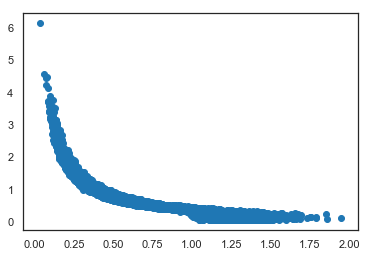

<Figure size 432x288 with 0 Axes>

In [47]:
plt.scatter(n_arr2, y_arr2)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650314680", plt, n_arr1, y_arr1)

In [131]:
# Adam_1642149242   /   5 crit
a4, b4, y_arr4, n_arr4 = v4_prepare_data_from_files('Adam_1650315215', 0.5)
print(a4, b4) 

0      [0, 29.337343096620046, 0.0, 0.0, 1539192.9493246013]
0.05707384168944507
0 || 0.5004365323218091 || 0 || 0 
1      [0, 6.359338940823623, 0.1, 1.0, 319155.23845420737]
0.12497295889696314
0 || 0.5120299345975159 || 1 || 1 
0      [0, 98.66527057783105, 0.1, 0.0, 1202860.931494057]
0.06351950771758869
0 || 0.5008952961606548 || 0 || 0 
0      [0, 21.8465836554197, 1.0, 0.0, 767447.7861433801]
0.08575081092480595
0 || 0.5020387907757271 || 0 || 0 
0      [0, 21.434606638629628, 1.0, 0.0, 1221701.0557214415]
0.07783220921899434
0 || 0.5004759255022638 || 0 || 0 
1      [1, 11.850485650211496, 0.0, 1.0, 354833.7849484247]
0.08849427401566909
1 || 0.5114066980846991 || 1 || 1 
0      [1, 58.78016425774767, 0.1, 0.0, 187753.2845294915]
0.1315593175086338
1 || 0.5272273957289907 || 0 || 0 
0      [1, 75.85551945838094, 0.1, 0.0, 114494.97735079016]
0.18311157398187386
1 || 0.5495275063964639 || 0 || 0 
1      [1, 60.72281545983347, 0.1, 1.0, 2110616.559571519]
0.11147995049286367
1 ||

0.06325383623551285
14 || 0.5099388488858461 || 1 || 1 
0      [14, 49.12070052355881, 0.1, 0.0, 201571.95748217677]
0.15690419659105168
14 || 0.5252221037380321 || 0 || 0 
0      [15, 64.04814909692243, 0.0, 0.0, 716496.9979320819]
0.09035404338745344
15 || 0.5022293406513315 || 0 || 0 
0      [15, 96.71561003950846, 0.5, 0.0, 494895.7433359061]
0.10240435569401965
15 || 0.505306151473266 || 0 || 0 
0      [15, 5.01189032808112, 1.0, 0.0, 334257.84478988434]
0.119631271219831
15 || 0.5127008668581998 || 0 || 0 
1      [15, 28.308347448620907, 1.0, 1.0, 1022377.2912701815]
0.08047316458833227
15 || 0.5007918242707308 || 1 || 1 
0      [15, 41.74650645097093, 0.1, 0.0, 463635.59142462444]
0.09249983911400236
15 || 0.508457270663931 || 0 || 0 
0      [16, 72.56666345800986, 0.0, 0.0, 1036536.0395381663]
0.11470949764809553
16 || 0.5001902325026989 || 0 || 0 
0      [16, 42.993756621351636, 0.5, 0.0, 1003565.609911145]
0.0690720426677893
16 || 0.5013255358173755 || 0 || 0 
1      [16, 2.5

0.07650321736824872
29 || 0.5008231686395299 || 0 || 0 
0      [29, 18.190399423373094, 1.0, 0.0, 322626.42281203205]
0.14433413302547765
29 || 0.5106769590255228 || 0 || 0 
0      [29, 45.250835306862506, 0.0, 0.0, 310598.4504655689]
0.09441521154948043
29 || 0.5147010131517564 || 0 || 0 
1      [29, 56.63999364053049, 1.0, 1.0, 806791.1786489944]
0.06451729636549136
29 || 0.5028327362661809 || 1 || 1 
1      [29, 92.70786114734493, 0.0, 1.0, 181809.3643043363]
0.13659153499240015
29 || 0.5270270711527217 || 1 || 1 
0      [30, 11.402880784348474, 0.1, 0.0, 977006.3577325986]
0.06977227108102937
30 || 0.5013346151385679 || 0 || 0 
0      [30, 18.23021092908309, 1.0, 0.0, 747280.6586664085]
0.0959626534417477
30 || 0.5017647594020008 || 0 || 0 
0      [30, 97.94702253627355, 0.0, 0.0, 520115.74421546224]
0.07805359774995338
30 || 0.5064583221871861 || 0 || 0 
0      [30, 48.16484429351326, 1.0, 0.0, 289445.33350768336]
0.11337078019478879
30 || 0.5136995899122024 || 0 || 0 
0      [30,

0.07074738924648405
43 || 0.515461926482818 || 0 || 0 
0      [43, 36.5314622411399, 0.5, 0.0, 707765.1215200642]
0.06687216959960841
43 || 0.5038195899043698 || 0 || 0 
0      [43, 44.872581305951535, 0.5, 0.0, 512055.4691601022]
0.047087096845682366
43 || 0.5090013313707925 || 0 || 0 
0      [43, 94.01589240269954, 0.0, 0.0, 806474.5102251695]
0.10055631729754384
43 || 0.5009835388315677 || 0 || 0 
0      [44, 46.86802999646683, 1.0, 0.0, 961631.533283797]
0.09946127679998154
44 || 0.5005130948083698 || 0 || 0 
0      [44, 29.808990350151138, 0.5, 0.0, 660087.5679009921]
0.10670030229762746
44 || 0.5019449671156384 || 0 || 0 
0      [44, 23.958664665174446, 0.5, 0.0, 974506.717015953]
0.09262082603715911
44 || 0.5006122710590686 || 0 || 0 
0      [44, 78.26130395967176, 1.0, 0.0, 1496667.811643233]
0.07623001861281474
44 || 0.5001366621643621 || 0 || 0 
1      [44, 78.97775574450287, 0.0, 1.0, 1787338.3230375769]
0.10256225886541717
44 || 0.5000071147737855 || 1 || 1 
0      [45, 90.

0.10439585871873425
57 || 0.5014237920851738 || 0 || 0 
0      [57, 64.17658275645144, 1.0, 0.0, 206447.05838967205]
0.11321344809861071
57 || 0.5254222667196986 || 0 || 0 
1      [57, 87.90202528430429, 0.0, 1.0, 998422.4033059118]
0.11701469724170066
57 || 0.5002079222643797 || 1 || 1 
1      [58, 0.49359589336919196, 0.0, 1.0, 2162582.4033081373]
0.07825423273546693
58 || 0.5000111663576942 || 1 || 1 
0      [58, 16.456259657044463, 0.1, 0.0, 270516.0886930487]
0.09013524213455433
58 || 0.516910857462005 || 0 || 0 
1      [58, 23.608739010512853, 0.1, 1.0, 155375.1863990127]
0.14641582161977656
58 || 0.5357988016278011 || 1 || 1 
0      [58, 51.380441342841976, 0.5, 0.0, 462728.27049878944]
0.08984915594991062
58 || 0.5074632237805092 || 0 || 0 
0      [58, 77.05874236234177, 0.5, 0.0, 161944.99764470302]
0.1864154567841501
58 || 0.5304170696294556 || 0 || 0 
1      [59, 11.59502015244086, 0.0, 1.0, 1269036.3598001064]
0.1147966262788975
59 || 0.5000505020550831 || 1 || 1 
1      [5

0.11221902951721877
71 || 0.523719153693965 || 0 || 0 
0      [71, 14.387137985414439, 0.5, 0.0, 1415509.4621479847]
0.11219907129824395
71 || 0.5000243583029326 || 0 || 0 
1      [72, 77.43477010538543, 1.0, 1.0, 804450.7548564341]
0.09867064437007497
72 || 0.5011542291309429 || 1 || 1 
1      [72, 60.92760526614085, 0.1, 1.0, 827260.6166941742]
0.07057355652428302
72 || 0.5023883605055861 || 1 || 1 
0      [72, 0.7372594673480504, 1.0, 0.0, 469938.39418544475]
0.08174543457359607
72 || 0.5067393062272476 || 0 || 0 
0      [72, 86.7465454779559, 0.5, 0.0, 815546.4673473361]
0.08140267764029675
72 || 0.5018038447775551 || 0 || 0 
0      [72, 53.267337446109984, 0.1, 0.0, 346592.1057845278]
0.09439735937442258
72 || 0.5122513339627578 || 0 || 0 
0      [73, 61.6200182649442, 0.5, 0.0, 130107.94785320038]
0.18442587653907203
73 || 0.5406712929181876 || 0 || 0 
1      [73, 52.14629380333328, 0.5, 1.0, 266729.4386996821]
0.08823124503069577
73 || 0.5180830055264782 || 1 || 1 
0      [73, 9

0.1714522156418085
86 || 0.5461080214378063 || 0 || 0 
1      [86, 25.726225824277872, 0.5, 1.0, 1559064.7186724104]
0.0661324074194651
86 || 0.5002301539957311 || 1 || 1 
1      [86, 30.68256707084047, 0.0, 1.0, 817398.8225465481]
0.07148076497683356
86 || 0.5024108901835855 || 1 || 1 
0      [86, 86.72628561272144, 0.5, 0.0, 258105.63845056386]
0.12913314697194767
86 || 0.5181806023001219 || 0 || 0 
1      [86, 93.22804407242572, 1.0, 1.0, 71586.84758461783]
0.3097525392371658
86 || 0.6002375006589409 || 1 || 1 
0      [87, 83.04815780116522, 1.0, 0.0, 185773.8637465979]
0.17831678730956385
87 || 0.5268540290568329 || 0 || 0 
0      [87, 99.24619906856542, 0.0, 0.0, 980476.4515565499]
0.0890878817327559
87 || 0.5006962891958101 || 0 || 0 
0      [87, 31.682384452677887, 0.0, 0.0, 341270.51625359384]
0.05735969160073271
87 || 0.513972697709412 || 0 || 0 
0      [87, 98.80202623485349, 0.0, 0.0, 756023.3794211225]
0.11310881197210958
87 || 0.5007931311490503 || 0 || 0 
1      [87, 60.2

0.09600532197794327
100 || 0.5014906721924236 || 1 || 1 
1      [100, 16.785279323624824, 0.1, 1.0, 362944.12447748095]
0.10623415758614811
100 || 0.5092270882078801 || 1 || 1 
0      [100, 87.9866306048635, 0.0, 0.0, 760111.0451867746]
0.05670120522249041
100 || 0.5042611592746591 || 0 || 0 
1      [100, 12.938192126369602, 0.5, 1.0, 464144.04521290504]
0.10047975304093348
100 || 0.5054469256292752 || 1 || 1 
0      [101, 55.84290909002587, 0.1, 0.0, 178253.05846058438]
0.13462952596432481
101 || 0.5274753413876867 || 0 || 0 
0      [101, 57.5539991598984, 0.5, 0.0, 787413.9890081686]
0.08271704369619301
101 || 0.5020094697773299 || 0 || 0 
0      [101, 62.33965312472157, 0.5, 0.0, 174791.74982639498]
0.1320158977554321
101 || 0.5262417864307368 || 0 || 0 
0      [101, 20.46206222848919, 0.1, 0.0, 527981.5320801516]
0.09847704789662565
101 || 0.5049527612858479 || 0 || 0 
0      [101, 87.39137709442345, 0.0, 0.0, 624861.8496565634]
0.0683126460166106
101 || 0.5052337371844026 || 0 || 

0.12410439950647223
114 || 0.5131095081083703 || 0 || 0 
0      [114, 6.084290957662813, 1.0, 0.0, 95069.0374408369]
0.25410265261802495
114 || 0.5734434868597383 || 0 || 0 
0      [114, 73.65508964418369, 0.0, 0.0, 96945.33824263321]
0.2502874267408451
114 || 0.5733068292376272 || 0 || 0 
0      [114, 20.115648222558953, 1.0, 0.0, 394954.6825519242]
0.10260331715394974
114 || 0.5091410961883547 || 0 || 0 
0      [115, 76.18321768360671, 1.0, 0.0, 205892.60635204247]
0.08942623631427477
115 || 0.5239214818746876 || 0 || 0 
1      [115, 68.60422281310873, 0.1, 1.0, 93670.17297641389]
0.28015651398672137
115 || 0.5674789744919828 || 1 || 1 
0      [115, 22.794137761461425, 0.1, 0.0, 202838.2090136347]
0.1447866115054349
115 || 0.5239329087363311 || 0 || 0 
0      [115, 24.501173616355576, 0.0, 0.0, 418217.176640155]
0.08039605205552465
115 || 0.5093994634350231 || 0 || 0 
0      [115, 78.25354139756587, 1.0, 0.0, 215016.6971359113]
0.07412871868199453
115 || 0.5225880523440732 || 0 || 0 

0.05561038656101906
128 || 0.506789688692715 || 0 || 0 
1      [128, 25.297919466786368, 0.1, 1.0, 273262.4768405759]
0.08038628987757576
128 || 0.5169147265262407 || 1 || 1 
1      [128, 83.63798359777883, 1.0, 1.0, 460964.02193473524]
0.13610535417230543
128 || 0.5042342686965612 || 1 || 1 
0      [129, 22.121089908602954, 0.0, 0.0, 1258829.8452897628]
0.09091829613915994
129 || 0.5001872093302662 || 0 || 0 
0      [129, 62.23794733115524, 1.0, 0.0, 559754.1090469561]
0.13123235327499067
129 || 0.5021905310866512 || 0 || 0 
0      [129, 90.54812434461066, 1.0, 0.0, 606155.8316295862]
0.048981390152052155
129 || 0.507110846214404 || 0 || 0 
1      [129, 80.70365817101649, 1.0, 1.0, 1773016.4307540057]
0.09553256315023492
129 || 0.500013705220769 || 1 || 1 
1      [129, 36.77869699691083, 1.0, 1.0, 759822.5696218011]
0.07039397486693995
129 || 0.502996315044269 || 1 || 1 
1      [130, 57.506361263863425, 1.0, 1.0, 442837.47768484114]
0.12652181000281268
130 || 0.50524059697593 || 1 || 

0.037432106802765756
142 || 0.5014021149197668 || 0 || 0 
0      [143, 85.5325041565003, 1.0, 0.0, 1206255.0817025716]
0.07286455268011816
143 || 0.5006130031786706 || 0 || 0 
0      [143, 55.66823694809588, 0.1, 0.0, 106679.67443626201]
0.2709969247216884
143 || 0.5518978755401001 || 0 || 0 
1      [143, 38.24482536337111, 0.5, 1.0, 633385.2813168074]
0.07161717035540693
143 || 0.5047246157091052 || 1 || 1 
0      [143, 50.947023928729465, 0.5, 0.0, 1252307.993721145]
0.05160446767386484
143 || 0.5013297414516706 || 0 || 0 
1      [143, 13.868239931074777, 0.1, 1.0, 2894524.813445042]
0.10568052916751
143 || 0.5000000157156841 || 1 || 1 
0      [144, 73.37387365106058, 1.0, 0.0, 1095623.0894961862]
0.07322731773299893
144 || 0.5008429065026909 || 0 || 0 
1      [144, 8.6059933044913, 0.1, 1.0, 2444219.1496508745]
0.1024705056057829
144 || 0.500000230174987 || 1 || 1 
1      [144, 83.45005830120706, 0.1, 1.0, 415331.5518165626]
0.05182182527973004
144 || 0.5109524724395373 || 1 || 1 
1

0.22113045691547017
157 || 0.5575799017631702 || 0 || 0 
0      [157, 50.1188443996162, 1.0, 0.0, 107432.76643478984]
0.23610093215336744
157 || 0.5611191496105581 || 0 || 0 
1      [157, 53.58551908001638, 1.0, 1.0, 152133.49292900198]
0.1325774010339664
157 || 0.5315331661597356 || 1 || 1 
0      [157, 56.18069430215659, 1.0, 0.0, 877633.9036709315]
0.06686198528687522
157 || 0.5021570140058462 || 0 || 0 
1      [157, 50.38143108000605, 0.5, 1.0, 613839.2848509194]
0.08195354699950204
157 || 0.5041139056661197 || 1 || 1 
1      [158, 87.06382559221379, 0.5, 1.0, 106424.806495524]
0.23457118979781474
158 || 0.5560596655420298 || 1 || 1 
1      [158, 32.33786997345657, 0.1, 1.0, 1619819.6237816298]
0.059972400620006514
158 || 0.500283767049225 || 1 || 1 
0      [158, 22.304397572101497, 0.0, 0.0, 206144.98594256665]
0.13386437030760037
158 || 0.5257879077394132 || 0 || 0 
1      [158, 96.1417380933065, 0.0, 1.0, 998200.7557451056]
0.09843390972090593
158 || 0.5004508875442746 || 1 || 1

0.08655886166564829
171 || 0.501523667730543 || 1 || 1 
0      [171, 68.57777700643992, 0.0, 0.0, 1396237.7889711075]
0.13400079602947373
171 || 0.5000072228063286 || 0 || 0 
1      [171, 2.7477800706809328, 0.0, 1.0, 139582.8108800563]
0.16491021153162572
171 || 0.5403821701667605 || 1 || 1 
0      [172, 40.888110076259515, 0.0, 0.0, 1763788.1018976746]
0.04477918627803365
172 || 0.5005312084364767 || 0 || 0 
0      [172, 80.62086916211781, 1.0, 0.0, 691626.0876923943]
0.09722821532610872
172 || 0.5021467930531284 || 0 || 0 
0      [172, 20.884970909073854, 1.0, 0.0, 1753263.32092354]
0.059630776546491224
172 || 0.5002102354357126 || 0 || 0 
0      [172, 64.45952936003701, 0.5, 0.0, 2713686.1513450253]
0.07460851510758906
172 || 0.5000018184470341 || 0 || 0 
0      [172, 49.458699909532285, 1.0, 0.0, 359221.0926896824]
0.09588753072789416
172 || 0.5106316134951927 || 0 || 0 
0      [173, 11.735487569505166, 0.0, 0.0, 371929.716877281]
0.09855076465001493
173 || 0.5096132795859023 || 0

0.10161815805217192
185 || 0.5007150104093284 || 0 || 0 
1      [185, 3.1522696270038786, 1.0, 1.0, 658530.7257522894]
0.0737032542515479
185 || 0.5039419000370676 || 1 || 1 
0      [186, 55.158788938151496, 0.5, 0.0, 295779.97238639754]
0.11040780517187436
186 || 0.5138403384397541 || 0 || 0 
0      [186, 26.500965213551243, 0.0, 0.0, 906233.5704842741]
0.11041959795830672
186 || 0.5004476555871511 || 0 || 0 
0      [186, 33.29502461031616, 1.0, 0.0, 600678.0131705466]
0.09847590012515454
186 || 0.5027528056331945 || 0 || 0 
1      [186, 51.19763451954674, 0.1, 1.0, 2381999.489812386]
0.07355447658783464
186 || 0.5000073279011268 || 1 || 1 
0      [186, 65.59525621717512, 0.0, 0.0, 238313.72093491282]
0.13371643880501555
186 || 0.5209609099330783 || 0 || 0 
1      [187, 12.971371001798232, 1.0, 1.0, 450678.4427305603]
0.08624649484324459
187 || 0.5086380047914077 || 1 || 1 
1      [187, 4.619233415885543, 0.0, 1.0, 898208.3305844642]
0.11998888798148144
187 || 0.5003555126350847 || 1 

0.07502276493525409
199 || 0.5006251674957543 || 1 || 1 
0      [200, 78.93110030868269, 0.1, 0.0, 691180.2316118177]
0.06615854318418687
200 || 0.5038903528497625 || 0 || 0 
0      [200, 92.1348145990086, 0.5, 0.0, 101648.37651566925]
0.21861941435713161
200 || 0.5534888578705992 || 0 || 0 
0      [200, 5.231803928392647, 0.0, 0.0, 543355.5693794632]
0.07289691847734595
200 || 0.5065760079043266 || 0 || 0 
0      [200, 11.883849804211916, 0.1, 0.0, 2355019.127721934]
0.1202690493809692
200 || 0.500000056309248 || 0 || 0 
0      [200, 96.75625750573602, 1.0, 0.0, 3093910.484626908]
0.08657687633970777
200 || 0.5000000868371044 || 0 || 0 
0      [201, 27.347223027483423, 0.1, 0.0, 946888.8856199046]
0.07180929269143001
201 || 0.5014620547092448 || 0 || 0 
0      [201, 35.344570925335915, 0.0, 0.0, 561395.340191331]
0.06531662761621124
201 || 0.5064539144121806 || 0 || 0 
0      [201, 10.63621624264886, 0.1, 0.0, 262736.19290188415]
0.06425100761200472
201 || 0.5175398562438086 || 0 || 0

0.1076718451310271
213 || 0.5190148563049671 || 1 || 1 
1      [214, 12.109114790642828, 0.1, 1.0, 109223.280994131]
0.20121130102059057
214 || 0.5523945049854169 || 1 || 1 
0      [214, 36.75202060623138, 1.0, 0.0, 913376.5288899275]
0.10967886084883098
214 || 0.5004877352219365 || 0 || 0 
0      [214, 39.431682767798584, 1.0, 0.0, 387020.84219728946]
0.06454290671172427
214 || 0.5117463491485287 || 0 || 0 
0      [214, 46.39740119835996, 0.5, 0.0, 1554734.4423764918]
0.06889604820725982
214 || 0.5002022840669939 || 0 || 0 
0      [214, 45.095439815137425, 1.0, 0.0, 2078801.6374362146]
0.07450590900577442
214 || 0.5000194824077118 || 0 || 0 
0      [215, 80.12470413882217, 1.0, 0.0, 342392.17053752224]
0.08026803097379502
215 || 0.5126053560124486 || 0 || 0 
0      [215, 94.83899379452822, 0.1, 0.0, 1197485.188684111]
0.07063841441591373
215 || 0.5006281950472988 || 0 || 0 
0      [215, 66.73760804892335, 0.5, 0.0, 599126.3226181332]
0.08656180659892564
215 || 0.5040270196194915 || 0 

0.12255480634890314
227 || 0.5142318762428317 || 0 || 0 
1      [228, 40.37486023162869, 0.0, 1.0, 992016.2375898554]
0.08629126851096762
228 || 0.5008000504859016 || 1 || 1 
0      [228, 11.173452359882086, 0.1, 0.0, 1484901.3641657468]
0.06431740745034807
228 || 0.5003523462511236 || 0 || 0 
0      [228, 86.85274953357391, 0.5, 0.0, 1417195.4222369182]
0.07456691964264585
228 || 0.5002320694314838 || 0 || 0 
0      [228, 60.334959659289275, 0.5, 0.0, 820932.8292760599]
0.07921480690036223
228 || 0.5018590600798291 || 0 || 0 
1      [228, 96.0700904698149, 0.1, 1.0, 2522248.966079376]
0.08907194116675479
228 || 0.5000006636392208 || 1 || 1 
0      [229, 80.95760922687026, 0.1, 0.0, 447250.50874162174]
0.08331516609127824
229 || 0.5086362187393276 || 0 || 0 
1      [229, 5.640359022189717, 0.0, 1.0, 1406414.5695051225]
0.07015620580591816
229 || 0.500300803078833 || 1 || 1 
0      [229, 35.002960317873715, 0.5, 0.0, 168205.77993959223]
0.1421116045683662
229 || 0.5275856178583871 || 0 

0.11789266774144949
241 || 0.5162400587399691 || 0 || 0 
1      [242, 39.58572788708488, 0.5, 1.0, 775857.4720208199]
0.06071480408798412
242 || 0.5036770013497992 || 1 || 1 
1      [242, 77.32483276065717, 0.5, 1.0, 271669.7010103405]
0.1377688337028646
242 || 0.5168742614076477 || 1 || 1 
0      [242, 51.90177652913168, 0.0, 0.0, 637353.2815240957]
0.08806626754536032
242 || 0.5037405632444052 || 0 || 0 
0      [242, 86.23311188860485, 0.5, 0.0, 1013531.6596534556]
0.08842692139737471
242 || 0.5006092869902691 || 0 || 0 
0      [242, 39.154816712088376, 1.0, 0.0, 446495.021348056]
0.09093445085462126
242 || 0.5076229124524749 || 0 || 0 
1      [243, 14.15222985396521, 0.0, 1.0, 2860825.5908254166]
0.09354395727190647
243 || 0.5000000904852058 || 1 || 1 
0      [243, 65.58232406427311, 0.5, 0.0, 82540.56336106597]
0.29368962438085167
243 || 0.5605190155731675 || 0 || 0 
0      [243, 21.711339509471728, 1.0, 0.0, 118877.75197879819]
0.21121807546869514
243 || 0.5504972630779406 || 0 ||

0.07428835983473248
256 || 0.5019242484841341 || 1 || 1 
1      [256, 96.88277756844616, 0.1, 1.0, 468154.01608981244]
0.1115504723987353
256 || 0.506516443248001 || 1 || 1 
0      [256, 65.78867237367957, 1.0, 0.0, 1052028.9035280645]
0.09499026553228607
256 || 0.5004206223488029 || 0 || 0 
0      [256, 80.66802928509199, 0.5, 0.0, 313247.07774085936]
0.057455304975465235
256 || 0.5140173860788593 || 0 || 0 
0      [256, 34.678285814756855, 1.0, 0.0, 395001.3585389147]
0.10609428406511748
256 || 0.5095176068116418 || 0 || 0 
0      [257, 50.90525489628453, 1.0, 0.0, 358821.46594282053]
0.07612856995826284
257 || 0.5125170400179336 || 0 || 0 
0      [257, 34.1883496530622, 0.0, 0.0, 621478.4321207246]
0.06495497568707978
257 || 0.5054689907726718 || 0 || 0 
0      [257, 72.43716313762656, 1.0, 0.0, 623649.1103777102]
0.10257121455853643
257 || 0.5026164415098153 || 0 || 0 
0      [257, 45.20645719747079, 0.0, 0.0, 243924.75707007427]
0.09421201116711897
257 || 0.5191757105708625 || 0 |

0.07475453964044386
270 || 0.5000032227996389 || 1 || 1 
1      [270, 38.0054127841564, 0.5, 1.0, 145777.62317633786]
0.15633798379312833
270 || 0.5332620904331324 || 1 || 1 
0      [270, 46.590439356614425, 0.1, 0.0, 355409.1838643214]
0.11644026504358165
270 || 0.5083029443681232 || 0 || 0 
0      [270, 2.8011699276254243, 0.1, 0.0, 1210844.6749121165]
0.050128046523943745
270 || 0.5015428287491281 || 0 || 0 
0      [270, 89.52741218857913, 1.0, 0.0, 2509510.9258936234]
0.08356862197980051
270 || 0.500001292733788 || 0 || 0 
1      [271, 31.259042827754968, 0.0, 1.0, 310007.55427418725]
0.10051625151248433
271 || 0.5132200538769038 || 1 || 1 
1      [271, 18.979312711634698, 1.0, 1.0, 75007.87612960693]
0.35247888488816737
271 || 0.5894742730964598 || 1 || 1 
0      [271, 38.30058657926191, 1.0, 0.0, 168470.0853565045]
0.14782913788302937
271 || 0.5284938087448556 || 0 || 0 
1      [271, 70.26562066237601, 1.0, 1.0, 242278.33683861716]
0.08546240033573721
271 || 0.5232801122354245 ||

0.09443418572736743
284 || 0.500123194493444 || 0 || 0 
0      [284, 95.64845712637565, 0.5, 0.0, 130515.37958288327]
0.15525563450885788
284 || 0.5428497525878275 || 0 || 0 
0      [284, 16.476389148406668, 1.0, 0.0, 821366.5760390125]
0.08999954190655046
284 || 0.5016170933027543 || 0 || 0 
1      [285, 62.97427034759879, 1.0, 1.0, 562588.3601945266]
0.09811288543510714
285 || 0.5042001848099956 || 1 || 1 
0      [285, 21.48820951272134, 0.0, 0.0, 861250.5876813678]
0.08484104927034464
285 || 0.5014068693231795 || 0 || 0 
1      [285, 87.53540655886397, 0.1, 1.0, 271954.6601165456]
0.07499418448427503
285 || 0.5167405896296571 || 1 || 1 
1      [285, 32.37097530442139, 0.5, 1.0, 402001.2857594766]
0.09292118712132094
285 || 0.5092625326680618 || 1 || 1 
1      [285, 62.549427446338, 0.1, 1.0, 441086.8398039434]
0.10067665467359117
285 || 0.5073722534155984 || 1 || 1 
1      [286, 35.41668629771294, 1.0, 1.0, 330203.96407312975]
0.10580581351405098
286 || 0.513589079869589 || 1 || 1 


0.11285478095144039
298 || 0.5141898914870314 || 1 || 1 
0      [299, 34.96992377436297, 0.1, 0.0, 1003266.4803117537]
0.06303693341720903
299 || 0.5017564171933098 || 0 || 0 
1      [299, 71.22096847611591, 0.0, 1.0, 438277.3623491018]
0.09633510114054838
299 || 0.5077680854796868 || 1 || 1 
0      [299, 29.984252094401263, 1.0, 0.0, 461845.98679796135]
0.10872241419930176
299 || 0.5065834758794819 || 0 || 0 
0      [299, 7.650174772447493, 0.5, 0.0, 262028.68598734372]
0.08179670716493033
299 || 0.520950116750038 || 0 || 0 
1      [299, 73.35175248921585, 0.1, 1.0, 508126.61639877065]
0.10265006353563033
299 || 0.5047413046592182 || 1 || 1 
1      [300, 22.703485594575202, 0.0, 1.0, 325088.32787661656]
0.06587691164966228
300 || 0.5140573365567671 || 1 || 1 
1      [300, 94.74003860009341, 0.1, 1.0, 104171.22331228416]
0.25719021109062323
300 || 0.5526489363678135 || 1 || 1 
0      [300, 85.97779282792095, 0.1, 0.0, 475034.53468145325]
0.0644974798686228
300 || 0.5085361631217197 || 

0.09320787566226615
312 || 0.5004325660017674 || 0 || 0 
1      [313, 70.45601061952563, 0.0, 1.0, 651355.2689148955]
0.042901817585095314
313 || 0.5062668138324613 || 1 || 1 
0      [313, 55.216529793822886, 0.1, 0.0, 901961.4255267509]
0.1080041767886923
313 || 0.5005120634839264 || 0 || 0 
1      [313, 46.555041581072665, 1.0, 1.0, 1431805.3762184686]
0.06135670460948643
313 || 0.5004766945268385 || 1 || 1 
0      [313, 56.598973070501835, 0.1, 0.0, 182230.01344574313]
0.12811662120769943
313 || 0.5260700908002908 || 0 || 0 
0      [313, 94.3713336399556, 0.0, 0.0, 228113.3284186325]
0.1207389625905245
313 || 0.5230740899313329 || 0 || 0 
1      [314, 24.74510554268531, 0.0, 1.0, 1410145.788419671]
0.09421305694823527
314 || 0.5000894047501302 || 1 || 1 
0      [314, 41.52342752746584, 0.0, 0.0, 309602.4543790221]
0.06720659186463673
314 || 0.5148682764833421 || 0 || 0 
0      [314, 7.5810782967215165, 0.0, 0.0, 530192.1064475329]
0.08702466152885471
314 || 0.505747103626956 || 0 ||

0.10438123989983399
326 || 0.5003720257831291 || 0 || 0 
0      [327, 98.34184626864135, 1.0, 0.0, 460690.41213977436]
0.08519943063735017
327 || 0.5070660035744475 || 0 || 0 
0      [327, 28.845514687203146, 0.5, 0.0, 356971.38636101777]
0.10081781844529294
327 || 0.5100207877654246 || 0 || 0 
1      [327, 7.266092451881734, 1.0, 1.0, 661975.5144538737]
0.06893352206790562
327 || 0.5049720322315845 || 1 || 1 
0      [327, 62.4778159850681, 1.0, 0.0, 465442.6733506815]
0.06156148218770887
327 || 0.5086736119084404 || 0 || 0 
0      [327, 84.51554586123875, 0.1, 0.0, 356482.27573278453]
0.07847146921040389
327 || 0.5125167343742614 || 0 || 0 
0      [328, 78.49098548470563, 0.1, 0.0, 641226.2031750566]
0.094386699738711
328 || 0.502871899232083 || 0 || 0 
0      [328, 0.2357954773600901, 1.0, 0.0, 777960.7797183599]
0.0935487898831377
328 || 0.5018447307398615 || 0 || 0 
1      [328, 51.02684818212684, 0.5, 1.0, 1242122.8245358744]
0.09342388371129673
328 || 0.5001901498069102 || 1 || 1

1      [341, 35.46420128024961, 0.0, 1.0, 912476.8089303009]
0.07129058603148275
341 || 0.5017581731404075 || 1 || 1 
1      [341, 10.690963036914491, 0.1, 1.0, 313628.5597029979]
0.07849765396430572
341 || 0.5152527594210301 || 1 || 1 
0      [341, 86.80321575068507, 1.0, 0.0, 1336821.4162653375]
0.04321774732078966
341 || 0.5014263245358022 || 0 || 0 
0      [341, 41.49387081689421, 0.5, 0.0, 106189.21480044027]
0.2832323511032581
341 || 0.5537891349117872 || 0 || 0 
1      [342, 13.036328772023975, 0.1, 1.0, 94923.62814999511]
0.24138737872445137
342 || 0.5517865452160988 || 1 || 1 
0      [342, 80.35816850984048, 0.5, 0.0, 172730.2115521881]
0.1484890847600439
342 || 0.530748814548512 || 0 || 0 
0      [342, 47.27112358816368, 0.5, 0.0, 1332159.3767672025]
0.07915681497194381
342 || 0.5002568501377231 || 0 || 0 
0      [342, 60.00517476807001, 0.1, 0.0, 477976.28980364325]
0.07901847628947192
342 || 0.5075903306973064 || 0 || 0 
0      [342, 59.02903041262778, 0.0, 0.0, 294362.8710

0.09262807195293973
355 || 0.5117091842450944 || 0 || 0 
1      [355, 55.377710313688254, 0.1, 1.0, 202474.8626587076]
0.14063164470473094
355 || 0.5287283688106408 || 1 || 1 
1      [355, 26.544035612326937, 0.1, 1.0, 168291.46384758077]
0.1211080100667945
355 || 0.5281471777724196 || 1 || 1 
0      [355, 60.97326805985115, 1.0, 0.0, 1113807.0545987259]
0.045500112318667525
355 || 0.5021475876244822 || 0 || 0 
0      [356, 62.16218820451442, 0.1, 0.0, 1371620.0566574417]
0.045992040813735216
356 || 0.5011731387893003 || 0 || 0 
0      [356, 17.332091254301506, 0.0, 0.0, 493460.6361963709]
0.035387521248421594
356 || 0.5089455509654341 || 0 || 0 
0      [356, 5.177330962662502, 0.0, 0.0, 359326.56711830763]
0.09773445275331581
356 || 0.5133811649982915 || 0 || 0 
0      [356, 37.99534562472798, 0.1, 0.0, 141944.92463982129]
0.19906981984468858
356 || 0.5379807301001704 || 0 || 0 
0      [356, 32.96034578861162, 1.0, 0.0, 238029.2006122781]
0.08960007141850626
356 || 0.5196213813138545 

0.09802684658322489
369 || 0.5028168145258461 || 0 || 0 
0      [369, 51.04621451231358, 1.0, 0.0, 110936.52520957746]
0.2664916587723735
369 || 0.5506389582940511 || 0 || 0 
0      [369, 29.773390568339913, 0.1, 0.0, 876053.3114561576]
0.09232361627693139
369 || 0.501006330010537 || 0 || 0 
0      [369, 21.085334734525347, 0.0, 0.0, 83674.3171165482]
0.2846558002445418
369 || 0.5757910183720649 || 0 || 0 
0      [370, 65.2624479526507, 0.1, 0.0, 363075.8133453035]
0.09883336389841037
370 || 0.511119278523938 || 0 || 0 
0      [370, 62.32903980338924, 0.5, 0.0, 1109056.8467096512]
0.08238642833167556
370 || 0.5005560079650111 || 0 || 0 
0      [370, 54.814518966035465, 0.0, 0.0, 531156.0545269168]
0.09342023104192052
370 || 0.5049320658793469 || 0 || 0 
0      [370, 46.88887474507714, 0.0, 0.0, 492444.3399961395]
0.0909554439503775
370 || 0.5060711919108749 || 0 || 0 
0      [370, 73.72423649321075, 1.0, 0.0, 846577.4293872166]
0.12205048397531848
370 || 0.5004438028962421 || 0 || 0 
0

0.09493976377864996
383 || 0.5048829613953788 || 0 || 0 
0      [383, 18.231724730912287, 0.1, 0.0, 123481.42520199183]
0.17133180224117026
383 || 0.5415444090715137 || 0 || 0 
1      [383, 25.21614881820956, 0.1, 1.0, 106994.13579993427]
0.21985278923901513
383 || 0.5625476073380782 || 1 || 1 
1      [383, 24.27739677124336, 0.0, 1.0, 719854.5053073092]
0.11230157336883995
383 || 0.501488800409917 || 1 || 1 
0      [384, 1.9850065322776056, 0.5, 0.0, 268219.5001029372]
0.11804347288165853
384 || 0.5178040638113548 || 0 || 0 
0      [384, 72.44333624770488, 0.0, 0.0, 379969.8433130292]
0.08236611223386785
384 || 0.5108490319972695 || 0 || 0 
1      [384, 57.26393337994664, 1.0, 1.0, 1002752.2675322352]
0.08811164396020219
384 || 0.5006660781038398 || 1 || 1 
0      [384, 59.43541464802754, 1.0, 0.0, 1599398.5930566948]
0.04335724884051857
384 || 0.5008367891299196 || 0 || 0 
1      [384, 35.85551258571715, 0.0, 1.0, 243299.8363701392]
0.14184469614155937
384 || 0.5208517240347049 || 1 

0.08337446243765231
397 || 0.5000000052246061 || 1 || 1 
1      [397, 86.01391051914173, 1.0, 1.0, 300448.4669995414]
0.12957863516729443
397 || 0.5146383348420352 || 1 || 1 
0      [397, 29.616739905395484, 1.0, 0.0, 1114994.467294029]
0.07181563327506103
397 || 0.5008422570721122 || 0 || 0 
0      [398, 85.5185776750604, 1.0, 0.0, 251818.09771792215]
0.1363953344166336
398 || 0.5166584155652837 || 0 || 0 
1      [398, 66.21224166701337, 0.1, 1.0, 1535540.5056615286]
0.076033264173167
398 || 0.5001322426058651 || 1 || 1 
0      [398, 75.59043061088755, 0.5, 0.0, 641854.2918499942]
0.09585980258916477
398 || 0.5027134476532568 || 0 || 0 
0      [398, 46.089132941504865, 0.0, 0.0, 415191.3232904261]
0.10417708464211757
398 || 0.5071524012712407 || 0 || 0 
0      [398, 42.1449086863702, 0.1, 0.0, 538790.8765619192]
0.10831128935275532
398 || 0.5033836091324235 || 0 || 0 
0      [399, 17.411021413565564, 0.1, 0.0, 1075237.2152230626]
0.09076934701053026
399 || 0.5004353398583172 || 0 || 0

0.07244121020155156
411 || 0.5073342171599858 || 0 || 0 
0      [411, 92.01345970038666, 0.1, 0.0, 178210.95683815493]
0.1449516688030651
411 || 0.531368530982714 || 0 || 0 
1      [412, 63.07162438746905, 0.0, 1.0, 71006.56617856787]
0.3915869613997184
412 || 0.5946233913806073 || 1 || 1 
1      [412, 8.224710665197154, 0.0, 1.0, 452581.4765460215]
0.0794224737133981
412 || 0.5084031096811743 || 1 || 1 
1      [412, 18.720458647622802, 0.1, 1.0, 266312.0476568884]
0.09056898912187947
412 || 0.5174888480099564 || 1 || 1 
0      [412, 39.66156681201089, 1.0, 0.0, 862529.6459716188]
0.08769337916510919
412 || 0.5013225390044729 || 0 || 0 
0      [412, 93.88021846616543, 1.0, 0.0, 85684.60325776617]
0.3399456869916351
412 || 0.5826526468518594 || 0 || 0 
0      [413, 97.4124305466288, 0.5, 0.0, 168355.3134783273]
0.11471979599242468
413 || 0.5292659195741026 || 0 || 0 
1      [413, 32.603195878881394, 0.0, 1.0, 200602.34734483916]
0.1158368792576161
413 || 0.5279016482460978 || 1 || 1 
1 

0.10381772818553023
425 || 0.5044666942928326 || 0 || 0 
0      [425, 70.86716919356752, 1.0, 0.0, 1348785.4260713619]
0.06639533335216061
425 || 0.5004749787313009 || 0 || 0 
0      [426, 33.27289493886121, 0.5, 0.0, 2733005.8311339226]
0.05655128627126099
426 || 0.5000158141104346 || 0 || 0 
1      [426, 8.436263431447305, 0.0, 1.0, 342608.7524599432]
0.08899898728955957
426 || 0.5121900882888065 || 1 || 1 
0      [426, 89.57338829628624, 0.1, 0.0, 628350.2770401128]
0.04286983284746233
426 || 0.5071918112128865 || 0 || 0 
1      [426, 90.06395974903825, 0.1, 1.0, 423604.73862648866]
0.0946196910745099
426 || 0.5075458164744664 || 1 || 1 
1      [426, 84.88642763316928, 0.1, 1.0, 120210.01475374243]
0.19815241085461244
426 || 0.5446720984609169 || 1 || 1 
0      [427, 50.8629117773193, 1.0, 0.0, 314919.7897067636]
0.08575040320574459
427 || 0.51383311902524 || 0 || 0 
0      [427, 39.02391253621148, 0.0, 0.0, 106452.04716455893]
0.23207333921326717
427 || 0.5487296389928877 || 0 || 0

0.09091524137129468
439 || 0.5000076003363878 || 1 || 1 
1      [439, 4.1020657908876155, 0.5, 1.0, 266809.324946632]
0.10353834376514663
439 || 0.518161784749977 || 1 || 1 
0      [440, 53.36835324578072, 1.0, 0.0, 1030737.630288871]
0.08204706270284504
440 || 0.5008674022604915 || 0 || 0 
1      [440, 92.32649897860097, 0.0, 1.0, 588275.5175737605]
0.07468460728111871
440 || 0.5056298976759638 || 1 || 1 
0      [440, 3.4737082224001514, 0.5, 0.0, 688168.3501053293]
0.10139395078529709
440 || 0.5018034063395677 || 0 || 0 
0      [440, 21.46968880435353, 0.0, 0.0, 270240.08963446494]
0.10499299410310584
440 || 0.5163481219731313 || 0 || 0 
1      [440, 44.55629601094165, 0.0, 1.0, 605786.309323909]
0.0954982141581968
440 || 0.5034982383362765 || 1 || 1 
0      [441, 99.2710376416307, 1.0, 0.0, 890497.2035701855]
0.07806002207496204
441 || 0.50147244974943 || 0 || 0 
1      [441, 97.466206213365, 0.0, 1.0, 1815904.5522596433]
0.09728117794748838
441 || 0.5000092839552411 || 1 || 1 
0   

0.12550352591673836
453 || 0.5029539479666663 || 0 || 0 
0      [454, 45.936855481796165, 1.0, 0.0, 276992.33649972867]
0.11365514343383543
454 || 0.5142068012666806 || 0 || 0 
1      [454, 99.14863287021265, 0.5, 1.0, 235472.4568756477]
0.12127377958733898
454 || 0.5213065912498706 || 1 || 1 
0      [454, 0.5540144186779561, 0.5, 0.0, 657303.8875636425]
0.07452842725115498
454 || 0.504374283028165 || 0 || 0 
1      [454, 75.8304909756936, 0.1, 1.0, 66954.69647897362]
0.31884077015756906
454 || 0.5712575986411779 || 1 || 1 
1      [454, 19.697564872377725, 1.0, 1.0, 547814.7749887508]
0.037130518553733206
454 || 0.5081327344765092 || 1 || 1 
0      [455, 38.62666990329233, 0.1, 0.0, 843015.159709524]
0.06399498641142545
455 || 0.5027054228843767 || 0 || 0 
0      [455, 24.287893925880034, 0.5, 0.0, 720841.3425917247]
0.07727834550778521
455 || 0.5028310214689217 || 0 || 0 
1      [455, 25.296693856139697, 0.5, 1.0, 305327.90567493776]
0.10627871781348146
455 || 0.5138170598164706 || 1 

0.03599285070254278
467 || 0.5107833428823444 || 1 || 1 
0      [468, 4.056683823732932, 0.5, 0.0, 985402.7847100259]
0.08294406019012275
468 || 0.5009570207506681 || 0 || 0 
0      [468, 39.79564829322839, 0.0, 0.0, 1030778.1109926406]
0.11302001641285035
468 || 0.5002021533503703 || 0 || 0 
1      [468, 12.996005721376246, 0.0, 1.0, 1668006.074939082]
0.08646661688158257
468 || 0.5000402177526264 || 1 || 1 
0      [468, 23.084711097820325, 0.0, 0.0, 1288977.9610217274]
0.06759943178875284
468 || 0.5005133348166231 || 0 || 0 
0      [468, 82.0387371842154, 1.0, 0.0, 1530384.6526497118]
0.08860325279056845
468 || 0.5000620647577232 || 0 || 0 
0      [469, 95.63819163985222, 1.0, 0.0, 697963.9759079409]
0.1040676597298118
469 || 0.5019111827181346 || 0 || 0 
0      [469, 89.83619240231111, 0.1, 0.0, 345108.50788434764]
0.07351900711068132
469 || 0.5128774130601113 || 0 || 0 
0      [469, 6.333726995231248, 0.5, 0.0, 390176.58406462666]
0.10060665825771645
469 || 0.5072027951158173 || 0 

0.09779807223558601
482 || 0.5003156053396609 || 1 || 1 
0      [482, 8.04574957957212, 0.5, 0.0, 62306.051259886604]
0.38860040301136733
482 || 0.5997971827449351 || 0 || 0 
0      [482, 77.0721785004413, 0.5, 0.0, 839821.878603841]
0.08550135427162121
482 || 0.5015805536725644 || 0 || 0 
1      [482, 34.97509776109378, 1.0, 1.0, 95195.85263283167]
0.2536389795366737
482 || 0.5604158308974381 || 1 || 1 
0      [483, 23.61580056728671, 0.5, 0.0, 1302041.654847996]
0.05844618827932628
483 || 0.5007907983096664 || 0 || 0 
1      [483, 83.02889974950527, 0.0, 1.0, 587735.8132069806]
0.0923747955968087
483 || 0.5037532790352464 || 1 || 1 
0      [483, 36.84158143565316, 0.5, 0.0, 865183.7973238605]
0.0658105061079278
483 || 0.5024479266295663 || 0 || 0 
0      [483, 9.002701869419354, 0.0, 0.0, 1726691.0393696097]
0.079062831250406
483 || 0.5000506142782135 || 0 || 0 
0      [483, 37.87850830733254, 0.0, 0.0, 528267.1298902854]
0.11675624207877153
483 || 0.503841324404568 || 0 || 0 
0     

0.06753244387959616
496 || 0.5069971459352302 || 1 || 1 
0      [496, 83.50308199930143, 0.0, 0.0, 598284.8267904519]
0.08012975042382661
496 || 0.504244135195277 || 0 || 0 
1      [496, 16.415373163631298, 1.0, 1.0, 1710906.6732398407]
0.09351881812557569
496 || 0.5000212888001455 || 1 || 1 
0      [496, 17.94171772910701, 0.5, 0.0, 655556.7502723349]
0.10935914567165536
496 || 0.5021042575291983 || 0 || 0 
1      [497, 10.083287708230703, 0.1, 1.0, 535140.6222633021]
0.07726585086272846
497 || 0.5061727619041239 || 1 || 1 
0      [497, 31.812778298764734, 0.5, 0.0, 490691.6673886712]
0.10305173212332912
497 || 0.5055466694108844 || 0 || 0 
0      [497, 84.17898819739183, 0.0, 0.0, 1309662.2423706672]
0.0858911993844379
497 || 0.5001732444927336 || 0 || 0 
1      [497, 40.555600673982276, 1.0, 1.0, 1220588.61946288]
0.07485827589261182
497 || 0.5005106179430728 || 1 || 1 
1      [497, 60.58046657237922, 0.0, 1.0, 533532.98182072]
0.05333623994183275
497 || 0.5081888265929114 || 1 || 1

0.061447379090172005
510 || 0.510407997287312 || 0 || 0 
0      [510, 98.53766183112097, 1.0, 0.0, 1716979.3616621443]
0.06084638547389668
510 || 0.5002374917567547 || 0 || 0 
0      [511, 39.534654989853465, 0.5, 0.0, 489001.6131336188]
0.10417350734891047
511 || 0.5053527951289789 || 0 || 0 
0      [511, 73.93439885311935, 0.1, 0.0, 2803745.239528918]
0.06842840969632263
511 || 0.5000029552901696 || 0 || 0 
0      [511, 11.32052576674661, 0.0, 0.0, 1258664.1671964817]
0.08052597228345726
511 || 0.5003271493576436 || 0 || 0 
0      [511, 37.330142823448575, 0.0, 0.0, 1307915.8840746505]
0.06383874515242641
511 || 0.5006177529950708 || 0 || 0 
0      [511, 80.20257814749486, 0.0, 0.0, 484140.7599720055]
0.05988547090284606
511 || 0.5089526236990198 || 0 || 0 
0      [512, 26.443419964876064, 0.5, 0.0, 1478274.5584394657]
0.08051401625753002
512 || 0.5001313174464266 || 0 || 0 
0      [512, 5.73242895323069, 0.5, 0.0, 92568.78708488034]
0.28102539342804345
512 || 0.5614685233616055 || 0

0.0577685032902698
525 || 0.5169660202081563 || 0 || 0 
0      [525, 86.73124236759364, 0.1, 0.0, 546891.7370110229]
0.09784631742552773
525 || 0.5040887048787317 || 0 || 0 
0      [525, 34.500647876173616, 0.0, 0.0, 231335.22680346432]
0.1432244491468568
525 || 0.5205899886286625 || 0 || 0 
0      [525, 85.34147334890922, 0.5, 0.0, 1085951.0938345036]
0.03819639448306111
525 || 0.5031004977224303 || 0 || 0 
0      [525, 57.49169035946535, 0.1, 0.0, 313134.41001152433]
0.10804972465562623
525 || 0.5125198349491148 || 0 || 0 
1      [526, 85.46846610157274, 0.1, 1.0, 80359.66901502447]
0.3278220751455459
526 || 0.5721825022096237 || 1 || 1 
1      [526, 98.2243535660352, 0.5, 1.0, 1294415.3915917715]
0.08976924338146684
526 || 0.5001561118582506 || 1 || 1 
0      [526, 5.245112694331233, 0.0, 0.0, 1551309.2028675016]
0.09224196878463861
526 || 0.5000448567451719 || 0 || 0 
0      [526, 86.79907579080822, 1.0, 0.0, 471916.2082486743]
0.05952564051236965
526 || 0.508957218933902 || 0 || 0

0.11327583273161126
539 || 0.509103639183855 || 1 || 1 
1      [539, 40.40633712243293, 0.1, 1.0, 240776.26349380935]
0.11269746627710697
539 || 0.5191766295910472 || 1 || 1 
0      [539, 32.29978122587909, 0.0, 0.0, 409163.8969494545]
0.10057205835783181
539 || 0.5079865082850911 || 0 || 0 
0      [539, 29.343337726105535, 0.0, 0.0, 174034.95586316206]
0.10217423448848262
539 || 0.5267811183540924 || 0 || 0 
0      [540, 24.682307316803943, 1.0, 0.0, 1927388.4649475012]
0.09108181723256041
540 || 0.5000090488180539 || 0 || 0 
0      [540, 88.6401904408023, 0.1, 0.0, 662314.045501874]
0.06875346784188552
540 || 0.5043299102078155 || 0 || 0 
1      [540, 63.372353719661945, 1.0, 1.0, 1085978.136940373]
0.0551143570308294
540 || 0.5017243630901922 || 1 || 1 
0      [540, 76.96307572213128, 0.0, 0.0, 370793.92301787203]
0.08598006760092405
540 || 0.5118613291315052 || 0 || 0 
0      [540, 6.466335791617311, 0.0, 0.0, 4219683.562849075]
0.08667169183078256
540 || 0.5000000006150935 || 0 ||

0.2819381764811605
553 || 0.5685093866805534 || 0 || 0 
0      [553, 64.83313794585587, 0.0, 0.0, 144866.34933480085]
0.17757482738165098
553 || 0.5347356047099847 || 0 || 0 
0      [553, 60.49530074412017, 1.0, 0.0, 954349.2015704579]
0.09899212071456767
553 || 0.500584507014277 || 0 || 0 
0      [554, 68.83767513925312, 0.0, 0.0, 487612.6433488336]
0.08301902355483459
554 || 0.5070931902861623 || 0 || 0 
0      [554, 0.5719935551875222, 0.5, 0.0, 1308272.5542088284]
0.10232855040219693
554 || 0.5000797096262167 || 0 || 0 
0      [554, 67.2906989096294, 1.0, 0.0, 333842.6042303416]
0.058842641952395705
554 || 0.5144049049356325 || 0 || 0 
0      [554, 6.068619059236108, 0.0, 0.0, 843807.944409425]
0.056592390379380686
554 || 0.5032505896543065 || 0 || 0 
0      [554, 20.38693359248192, 1.0, 0.0, 784846.6600318267]
0.04856120601345667
554 || 0.5043887585908602 || 0 || 0 
0      [555, 13.773121071754396, 1.0, 0.0, 1077656.5588084126]
0.08562161470438709
555 || 0.5005077022802183 || 0 ||

0.07937931346425114
567 || 0.5108436115574325 || 0 || 0 
0      [567, 71.30522824209294, 1.0, 0.0, 2508541.552969581]
0.11360372089086679
567 || 0.5000000525202635 || 0 || 0 
0      [567, 82.02689165239727, 0.1, 0.0, 1889067.4689748103]
0.13830203736782357
567 || 0.5000001856137963 || 0 || 0 
0      [568, 54.856752147938714, 1.0, 0.0, 2262875.728114317]
0.09523874992944299
568 || 0.5000012426479127 || 0 || 0 
0      [568, 31.867886109119947, 0.5, 0.0, 221875.7167048295]
0.11138232311112184
568 || 0.5225388884637683 || 0 || 0 
0      [568, 28.163175811468154, 0.0, 0.0, 1142751.2423549823]
0.06840787243224675
568 || 0.5009278767364118 || 0 || 0 
0      [568, 91.46493444868649, 0.1, 0.0, 370105.46433655906]
0.08414722996521955
568 || 0.5120218808682044 || 0 || 0 
0      [568, 13.38843459973707, 0.5, 0.0, 1196512.371799295]
0.10526237106317833
568 || 0.5001314320877249 || 0 || 0 
1      [569, 97.27123905621278, 0.1, 1.0, 1565269.8940587884]
0.08539585678888648
569 || 0.5000655948944615 || 

0.0968405364140214
581 || 0.5023971815485031 || 1 || 1 
0      [582, 29.622758768965173, 0.0, 0.0, 811009.4443426381]
0.09875878998790615
582 || 0.5011123778315916 || 0 || 0 
0      [582, 76.02902115592744, 0.1, 0.0, 779570.5351051721]
0.10669224915483506
582 || 0.5009588313606896 || 0 || 0 
0      [582, 63.51753984521805, 0.1, 0.0, 429296.52841131896]
0.06887766664641706
582 || 0.5097713318670455 || 0 || 0 
0      [582, 88.0365238661308, 1.0, 0.0, 1048845.5158486357]
0.05724555908548359
582 || 0.501685650063397 || 0 || 0 
1      [582, 42.01031257380287, 0.0, 1.0, 252867.52004539088]
0.10123163742293595
582 || 0.519337617302025 || 1 || 1 
1      [583, 76.4994680368081, 0.1, 1.0, 229269.6754257735]
0.11437128989514503
583 || 0.5192337825044805 || 1 || 1 
0      [583, 19.68731615763274, 0.1, 0.0, 647330.1233581248]
0.06387270711078306
583 || 0.5050665191158854 || 0 || 0 
0      [583, 6.410413969120499, 1.0, 0.0, 66420.02431744822]
0.33457906649146396
583 || 0.6237895673387245 || 0 || 0 


0.10503646983110544
596 || 0.5185266467114131 || 0 || 0 
1      [596, 8.025047105393279, 0.5, 1.0, 61160.18859568676]
0.33913788643648457
596 || 0.6270772098936044 || 1 || 1 
0      [596, 83.29585494128946, 0.1, 0.0, 245347.11400495472]
0.08163688915671155
596 || 0.5198074223049802 || 0 || 0 
0      [596, 37.596693557526194, 1.0, 0.0, 1642587.2805810308]
0.09808983826248854
596 || 0.5000212486051151 || 0 || 0 
0      [596, 36.71254731649189, 0.5, 0.0, 1087182.6464393353]
0.08376488566150375
596 || 0.5005510305863743 || 0 || 0 
0      [597, 57.24402988427819, 0.5, 0.0, 739866.8916269592]
0.13552510136969734
597 || 0.5006091526253388 || 0 || 0 
0      [597, 1.5832570757680409, 0.1, 0.0, 166187.83063994022]
0.14412091268729438
597 || 0.5323694962623019 || 0 || 0 
1      [597, 5.597088624723562, 0.0, 1.0, 126253.91285263997]
0.20500129176433113
597 || 0.5487466421386742 || 1 || 1 
1      [597, 66.1244909551754, 1.0, 1.0, 523903.32946215966]
0.08794747505619867
597 || 0.5059895649548662 || 

0.05994187588902557
610 || 0.5164557745457996 || 1 || 1 
0      [610, 54.88417085865409, 0.0, 0.0, 236594.61562712846]
0.09374819034008927
610 || 0.5192488215928198 || 0 || 0 
0      [610, 56.70088859972263, 0.0, 0.0, 376867.03911976377]
0.08546131155199789
610 || 0.5097518028042173 || 0 || 0 
0      [610, 64.77238236270466, 1.0, 0.0, 221714.30899184573]
0.13791974195639886
610 || 0.521929696155959 || 0 || 0 
0      [610, 1.3128239801628638, 0.1, 0.0, 1270224.6558651282]
0.07748420216187206
610 || 0.5003437694292537 || 0 || 0 
0      [611, 67.77078237216774, 0.1, 0.0, 95559.41452185501]
0.27389569642354766
611 || 0.5689975002307283 || 0 || 0 
0      [611, 34.469966355309325, 0.1, 0.0, 1923498.4251310849]
0.10498404341931425
611 || 0.5000026194164869 || 0 || 0 
0      [611, 2.833538905953631, 0.5, 0.0, 879986.3116742531]
0.09352146792303215
611 || 0.5009880293955291 || 0 || 0 
1      [611, 51.4677103123319, 1.0, 1.0, 440066.49301011115]
0.07225376283482417
611 || 0.5083838862389699 || 1

0.05240102541125424
624 || 0.5000113706133912 || 0 || 0 
0      [624, 1.7136641963813537, 1.0, 0.0, 1861621.9583610266]
0.07693615126642851
624 || 0.50003730270601 || 0 || 0 
0      [624, 1.7007641996859058, 1.0, 0.0, 544307.5975264867]
0.10010325755713918
624 || 0.5049222534146112 || 0 || 0 
1      [624, 70.7203363045752, 1.0, 1.0, 318648.25346092065]
0.09061047179972301
624 || 0.5160610453509324 || 1 || 1 
0      [624, 50.59564158827603, 1.0, 0.0, 103494.22362600765]
0.21293564090739392
624 || 0.5614960674330687 || 0 || 0 
0      [625, 10.396635731069065, 1.0, 0.0, 137170.23158125044]
0.19269365833710408
625 || 0.5474282686937383 || 0 || 0 
1      [625, 40.40948316511362, 1.0, 1.0, 524015.4181253698]
0.11760154148606321
625 || 0.5034735072479318 || 1 || 1 
0      [625, 53.861698165000796, 0.0, 0.0, 215830.4231328165]
0.11730534120770844
625 || 0.522272857886516 || 0 || 0 
1      [625, 40.476048908349895, 0.0, 1.0, 101780.28116625242]
0.250692812278858
625 || 0.5586732453547154 || 1 |

0.11430103676887933
638 || 0.5208071986487981 || 0 || 0 
1      [638, 89.6662852087663, 0.0, 1.0, 153120.2162275408]
0.1639912917728752
638 || 0.5346626006698981 || 1 || 1 
0      [638, 11.731124853624896, 0.0, 0.0, 61085.35311014217]
0.4380000957935182
638 || 0.6074363140142314 || 0 || 0 
0      [638, 12.685999332854575, 0.5, 0.0, 1270565.0645421324]
0.08340531186280127
638 || 0.5002417854521553 || 0 || 0 
0      [638, 85.37639344902483, 0.5, 0.0, 627549.93335113]
0.08431073605056909
638 || 0.5039647388678129 || 0 || 0 
1      [639, 52.55649897137976, 1.0, 1.0, 2658841.5143245044]
0.0952844109718495
639 || 0.5000001804303663 || 1 || 1 
0      [639, 55.88612937071209, 0.0, 0.0, 1809038.1194342615]
0.10658331959371521
639 || 0.5000042406449662 || 0 || 0 
0      [639, 35.57883651625759, 0.1, 0.0, 731733.5651528403]
0.07759634865477474
639 || 0.5028468947100233 || 0 || 0 
0      [639, 84.27740540588134, 0.0, 0.0, 98634.03595066987]
0.27130288296706373
639 || 0.5671905996557501 || 0 || 0 


0.11036693113302265
652 || 0.504218442957895 || 0 || 0 
0      [652, 83.07668895249081, 1.0, 0.0, 180706.84202847825]
0.13879075619266515
652 || 0.5296937556528883 || 0 || 0 
1      [652, 51.82955342962102, 1.0, 1.0, 343103.17798486864]
0.0779668383306929
652 || 0.5131176558997159 || 1 || 1 
1      [652, 98.14980175940434, 0.5, 1.0, 1233423.943222352]
0.059486327887966504
652 || 0.5010051051921812 || 1 || 1 
0      [652, 6.484269694057438, 1.0, 0.0, 217469.78314634148]
0.09183978365299575
652 || 0.5262030643037641 || 0 || 0 
1      [653, 7.0638232616800245, 1.0, 1.0, 101993.6832739978]
0.3094824258069496
653 || 0.5620747337677846 || 1 || 1 
1      [653, 88.66933710113595, 0.1, 1.0, 1202997.2086144965]
0.07540853416438655
653 || 0.5005065449588435 || 1 || 1 
1      [653, 1.0903661967424927, 0.1, 1.0, 2585962.9700321155]
0.10827279823371519
653 || 0.500000051142782 || 1 || 1 
0      [653, 50.968781783395144, 0.1, 0.0, 198240.23700434135]
0.0905858547990461
653 || 0.5239754392868625 || 0 

0.34464690742412507
666 || 0.5792144629104747 || 1 || 1 
0      [666, 65.02005229497956, 0.1, 0.0, 1818811.2149875362]
0.11211148707295619
666 || 0.5000026187467138 || 0 || 0 
0      [666, 19.917613080537688, 0.5, 0.0, 63074.867211102115]
0.39167613019351555
666 || 0.5903091523723532 || 0 || 0 
1      [667, 33.440666474251216, 0.0, 1.0, 326869.88053567393]
0.11576278555763964
667 || 0.5112927421251727 || 1 || 1 
1      [667, 89.15285836531379, 0.5, 1.0, 575208.3863672286]
0.0709590917801711
667 || 0.5056293698143869 || 1 || 1 
1      [667, 27.391979138439748, 0.5, 1.0, 252653.3730098849]
0.1470439084773389
667 || 0.5191765302798133 || 1 || 1 
1      [667, 37.97536667200098, 0.1, 1.0, 327342.6030618454]
0.10057456730290415
667 || 0.5142957532699831 || 1 || 1 
0      [667, 95.69023200046995, 0.5, 0.0, 622538.1363407614]
0.1020408679199748
667 || 0.5025340790834368 || 0 || 0 
1      [668, 32.53621065059252, 0.5, 1.0, 90338.58332280407]
0.25343636042313566
668 || 0.5750086334939238 || 1 ||

0.17815055759503512
680 || 0.5403224571530637 || 0 || 0 
0      [681, 66.38943423382348, 0.5, 0.0, 124761.5658830688]
0.18456009068522075
681 || 0.5432894066555043 || 0 || 0 
1      [681, 94.57122688889505, 0.5, 1.0, 1519788.6717580846]
0.0931856536568768
681 || 0.5000500574191603 || 1 || 1 
0      [681, 7.947902686550362, 0.0, 0.0, 96348.09861615821]
0.2898579283690972
681 || 0.5708855728282941 || 0 || 0 
0      [681, 3.060786033160434, 0.5, 0.0, 286197.14990198717]
0.0934379600812165
681 || 0.5169679892712468 || 0 || 0 
0      [681, 20.74373361188754, 0.5, 0.0, 68568.15567435781]
0.41928799995594135
681 || 0.5897466609085648 || 0 || 0 
0      [682, 36.9985152222284, 0.0, 0.0, 224985.15785231412]
0.09445582743619127
682 || 0.5206786173177903 || 0 || 0 
0      [682, 61.976111024856486, 0.1, 0.0, 601643.1913423531]
0.065812598325718
682 || 0.5054258750854004 || 0 || 0 
0      [682, 94.66523214703824, 0.5, 0.0, 1269850.1281885428]
0.12367295487181451
682 || 0.5000307396608648 || 0 || 0 


0.09694137891183
695 || 0.5145027572772 || 1 || 1 
0      [695, 66.6992859944985, 1.0, 0.0, 1157827.5011542435]
0.07261080723794902
695 || 0.5007002850131355 || 0 || 0 
1      [695, 94.58384130175787, 0.5, 1.0, 1032791.612039069]
0.09659725606958361
695 || 0.500439929385178 || 1 || 1 
1      [695, 31.721515574931182, 0.1, 1.0, 414746.9264432796]
0.08636308388386547
695 || 0.5099292031856191 || 1 || 1 
1      [696, 91.23300729175466, 0.0, 1.0, 705606.2341603212]
0.063868113633723
696 || 0.5040385923926425 || 1 || 1 
0      [696, 63.511916805781944, 1.0, 0.0, 1917242.0052721489]
0.107066671635678
696 || 0.5000022839320855 || 0 || 0 
0      [696, 87.86427750343164, 1.0, 0.0, 957852.6050499786]
0.08309950445689132
696 || 0.5008593154743851 || 0 || 0 
0      [696, 21.471731832658215, 0.1, 0.0, 503898.64492614835]
0.08606369863088587
696 || 0.5060605061536224 || 0 || 0 
0      [696, 1.9010540972401235, 0.1, 0.0, 816717.8497875525]
0.11308148423058281
696 || 0.5006100677844265 || 0 || 0 
0   

0.08644735494656366
709 || 0.5006461161751099 || 1 || 1 
0      [709, 6.946998916867075, 1.0, 0.0, 1211361.0887507957]
0.060611700911785305
709 || 0.5010391698184283 || 0 || 0 
0      [709, 45.208988961935745, 0.1, 0.0, 852335.8494937731]
0.0906049061255636
709 || 0.5012259338764796 || 0 || 0 
1      [709, 31.41646303574927, 0.1, 1.0, 694254.8543031149]
0.09333580707568928
709 || 0.5022746957300906 || 1 || 1 
0      [710, 77.77484072849265, 0.0, 0.0, 1569054.3050212758]
0.049452742868957116
710 || 0.5006192104229475 || 0 || 0 
0      [710, 59.058251329245856, 0.1, 0.0, 292485.29258318094]
0.0948486008604535
710 || 0.5177222999009298 || 0 || 0 
0      [710, 66.3957068535849, 0.5, 0.0, 1586810.9609091014]
0.09047377796166133
710 || 0.500039190912532 || 0 || 0 
0      [710, 6.061809763065817, 1.0, 0.0, 601234.1824380748]
0.11431103923999586
710 || 0.5020626111592322 || 0 || 0 
0      [710, 49.78706204991856, 0.5, 0.0, 137475.7037484204]
0.22153253228241182
710 || 0.543378811664946 || 0 ||

0.08026786623813852
723 || 0.5126501447922195 || 1 || 1 
1      [723, 1.4068743574094655, 1.0, 1.0, 532696.8613997931]
0.10662028029074559
723 || 0.5042185192082647 || 1 || 1 
1      [723, 59.82695375394338, 0.0, 1.0, 900066.439402726]
0.10584058140888168
723 || 0.5005596623124751 || 1 || 1 
0      [723, 46.714647344832365, 0.0, 0.0, 293252.57999144745]
0.0960490605766747
723 || 0.5142927431184667 || 0 || 0 
1      [724, 84.2466729866017, 0.1, 1.0, 707174.2700362796]
0.10592923187233087
724 || 0.5018586329084869 || 1 || 1 
0      [724, 99.60412139182853, 1.0, 0.0, 856116.7670656871]
0.10566475166270714
724 || 0.5007145591494323 || 0 || 0 
0      [724, 63.13595623678525, 1.0, 0.0, 495035.62022485107]
0.07365505581700496
724 || 0.5075510235574837 || 0 || 0 
0      [724, 33.91231250584783, 0.5, 0.0, 657920.9524201435]
0.07687870515867296
724 || 0.5036292020119173 || 0 || 0 
1      [724, 10.260339464720586, 0.1, 1.0, 302777.0216950084]
0.08853758574954455
724 || 0.5138532583623941 || 1 || 

0.115364775688653
737 || 0.5115483430802024 || 0 || 0 
0      [737, 42.72788628254566, 1.0, 0.0, 293233.09323373146]
0.10297404477371919
737 || 0.5165495359410573 || 0 || 0 
1      [737, 71.67098722649229, 0.1, 1.0, 183526.57051776024]
0.13913278957977074
737 || 0.5282059821016845 || 1 || 1 
0      [737, 92.24392571697253, 0.5, 0.0, 2429429.251113799]
0.09646622992897468
737 || 0.5000005182740078 || 0 || 0 
1      [738, 59.354672163150425, 0.1, 1.0, 337520.15877847857]
0.07336963235248783
738 || 0.5137127819241168 || 1 || 1 
0      [738, 47.17671539467933, 0.1, 0.0, 2875835.031976926]
0.07506024970317336
738 || 0.5000010094870151 || 0 || 0 
1      [738, 54.97353275336042, 0.0, 1.0, 302255.2086187688]
0.08599626059402062
738 || 0.5151484185262247 || 1 || 1 
1      [738, 80.73948534528795, 0.5, 1.0, 1275717.7098114733]
0.04782947787865587
738 || 0.5013694649926781 || 1 || 1 
0      [738, 6.02704625921468, 1.0, 0.0, 105951.44324071589]
0.21199661624611582
738 || 0.5684523494504102 || 0 ||

0.08540816213231953
751 || 0.5062092831627113 || 0 || 0 
0      [751, 12.525438708528092, 0.1, 0.0, 2149862.387122686]
0.061964319055779725
751 || 0.5000463613580061 || 0 || 0 
1      [751, 20.59716091552477, 1.0, 1.0, 62697.716140389755]
0.347882534275993
751 || 0.6150530760638642 || 1 || 1 
0      [752, 78.03854280561838, 0.1, 0.0, 602566.2887797969]
0.08114329582689071
752 || 0.5048257948138649 || 0 || 0 
0      [752, 62.287372738495314, 0.0, 0.0, 63080.80717751815]
0.39462102625699136
752 || 0.6019608980455109 || 0 || 0 
0      [752, 40.8692183426132, 1.0, 0.0, 100869.34455899442]
0.2668221071768503
752 || 0.5612129491600418 || 0 || 0 
0      [752, 44.832586962843635, 1.0, 0.0, 72558.26506163558]
0.383736662329581
752 || 0.5967748092369899 || 0 || 0 
0      [752, 11.624871091029826, 0.1, 0.0, 495659.8912045749]
0.08672368275617424
752 || 0.5058104272179891 || 0 || 0 
0      [753, 80.82569994363342, 1.0, 0.0, 92921.81619874942]
0.293299487386553
753 || 0.5707368167067978 || 0 || 0 


0.14915525945615857
765 || 0.5303790815091792 || 0 || 0 
0      [766, 31.280514683484462, 1.0, 0.0, 473893.8231332157]
0.053654505289753796
766 || 0.5095390890495833 || 0 || 0 
0      [766, 83.39592409268542, 0.5, 0.0, 1465110.9593822528]
0.10295223176647143
766 || 0.500036378951476 || 0 || 0 
0      [766, 4.768796565660788, 0.5, 0.0, 386735.66599744704]
0.1119105818550408
766 || 0.5084752265690677 || 0 || 0 
1      [766, 58.35622330985256, 0.5, 1.0, 730256.1686413507]
0.07130297336602398
766 || 0.5032024308696671 || 1 || 1 
1      [766, 1.3859190791609466, 0.0, 1.0, 2214160.365795902]
0.06016693980487529
766 || 0.5000457730939266 || 1 || 1 
0      [767, 35.92696896520984, 0.0, 0.0, 2209979.046369696]
0.04164021708395283
767 || 0.5002649177915038 || 0 || 0 
1      [767, 45.71188917348114, 0.0, 1.0, 123614.38575995996]
0.1614290518643005
767 || 0.537131723812472 || 1 || 1 
1      [767, 14.026307063761461, 0.1, 1.0, 198157.89156746707]
0.12128536934538563
767 || 0.5231616743919935 || 1 |

0.13651840728400103
780 || 0.5263952032429301 || 0 || 0 
0      [780, 60.812193859260745, 0.1, 0.0, 1028601.9306913773]
0.0706776317977569
780 || 0.5011404195384995 || 0 || 0 
1      [780, 36.01535236945422, 0.0, 1.0, 538248.6105324728]
0.09833481794389219
780 || 0.5052055636516188 || 1 || 1 
0      [780, 23.02685590012131, 0.1, 0.0, 624174.4426019759]
0.08942423434475283
780 || 0.5038166283966579 || 0 || 0 
0      [781, 87.48557226072448, 0.1, 0.0, 910041.6799870937]
0.08036315874112476
781 || 0.5011462606749004 || 0 || 0 
0      [781, 86.20773107539009, 0.0, 0.0, 544682.2789426877]
0.11952963765878193
781 || 0.502920695969868 || 0 || 0 
1      [781, 70.47720542242412, 0.1, 1.0, 194196.0739837572]
0.09679105116703526
781 || 0.5233447697835093 || 1 || 1 
0      [781, 79.00701301247179, 0.5, 0.0, 95615.62179818578]
0.27037697872352184
781 || 0.5574025712038609 || 0 || 0 
0      [781, 94.78453300363567, 0.0, 0.0, 264141.7896544075]
0.10099872315487327
781 || 0.5196636658390766 || 0 || 0 

0.07267623510208668
794 || 0.5000000495103228 || 1 || 1 
1      [794, 8.645095103431915, 0.0, 1.0, 96732.38823790324]
0.22203807011147703
794 || 0.5679076232000279 || 1 || 1 
0      [794, 56.77193735379908, 0.5, 0.0, 126695.95789966891]
0.19247614821430187
794 || 0.5400627419545585 || 0 || 0 
0      [795, 89.6293354730397, 0.1, 0.0, 551787.1371661136]
0.0745224492484335
795 || 0.505189272442083 || 0 || 0 
0      [795, 66.01712124434357, 0.1, 0.0, 1266242.4426631534]
0.11268314741983451
795 || 0.5000612185648066 || 0 || 0 
0      [795, 59.15885712181803, 0.5, 0.0, 861916.7809657928]
0.09443467227950328
795 || 0.5010829950727853 || 0 || 0 
0      [795, 55.92598381569827, 0.0, 0.0, 335910.63903184666]
0.10656649431791657
795 || 0.5112151148832359 || 0 || 0 
1      [795, 74.58015905806559, 0.5, 1.0, 1160776.905155413]
0.05481939528392614
795 || 0.5015957715015491 || 1 || 1 
0      [796, 2.84348022485858, 0.5, 0.0, 133928.1687510854]
0.23717324386659774
796 || 0.5482438692415648 || 0 || 0 


0.17683974945087483
808 || 0.5392857105888825 || 0 || 0 
0      [808, 87.54670489760305, 0.1, 0.0, 228288.10143661007]
0.09670852084932491
808 || 0.5203652171280659 || 0 || 0 
0      [809, 80.69060494253199, 0.1, 0.0, 994752.6636871519]
0.1361604056296917
809 || 0.5001219587420415 || 0 || 0 
0      [809, 30.266740843139672, 0.0, 0.0, 1072469.732303922]
0.053226042342538735
809 || 0.5019367385670658 || 0 || 0 
0      [809, 59.80582273118409, 1.0, 0.0, 69036.31582538609]
0.35969938424806835
809 || 0.5960764076778754 || 0 || 0 
0      [809, 65.97981174456775, 0.5, 0.0, 900916.4687089713]
0.08973376313415295
809 || 0.5010227319018398 || 0 || 0 
0      [809, 33.0802711131015, 1.0, 0.0, 449008.1587231112]
0.0816826607570038
809 || 0.5085786856652197 || 0 || 0 
1      [810, 48.94927108565484, 1.0, 1.0, 133653.32542162514]
0.1713647470917506
810 || 0.5370905016306432 || 1 || 1 
1      [810, 22.796894534622087, 1.0, 1.0, 1565047.360897055]
0.07604511071195733
810 || 0.5001267085748232 || 1 || 1

0.3405470823925462
822 || 0.5839677479699527 || 0 || 0 
1      [823, 66.43320516776956, 0.5, 1.0, 1131827.0899661016]
0.10158324724448682
823 || 0.5001731389098474 || 1 || 1 
1      [823, 53.65968305325004, 1.0, 1.0, 182905.86440840567]
0.15014037628321875
823 || 0.5299349059040743 || 1 || 1 
0      [823, 43.21908605411307, 0.0, 0.0, 1046853.9096856285]
0.09870252043339423
823 || 0.5004070330688277 || 0 || 0 
1      [823, 69.84557605521842, 1.0, 1.0, 109027.61011931066]
0.21321890559387743
823 || 0.5530171879052647 || 1 || 1 
0      [823, 76.44544228173082, 1.0, 0.0, 212527.36329271365]
0.1253350996463849
823 || 0.5232403757990824 || 0 || 0 
1      [824, 33.83865291538845, 0.5, 1.0, 993619.4584361078]
0.09604439899567348
824 || 0.5004672296286009 || 1 || 1 
0      [824, 92.49078003366552, 0.5, 0.0, 2562771.6210278254]
0.0868555675906816
824 || 0.5000007745462404 || 0 || 0 
0      [824, 55.92928354232076, 1.0, 0.0, 470472.1337995109]
0.06590391890386457
824 || 0.50839281775579 || 0 || 0

0.13589865713023477
837 || 0.5000782536535746 || 0 || 0 
1      [837, 48.95403925360792, 1.0, 1.0, 105957.0052339873]
0.24586687155863357
837 || 0.5538607929634244 || 1 || 1 
0      [837, 1.137886273405786, 0.0, 0.0, 143703.82897958974]
0.16378537002942628
837 || 0.5323047174713325 || 0 || 0 
1      [837, 46.40628775991699, 0.5, 1.0, 343309.50852958485]
0.13828301029826812
837 || 0.5088752288805924 || 1 || 1 
0      [837, 20.329745059378485, 0.5, 0.0, 1952087.871633615]
0.05898632207720635
837 || 0.5001013392864652 || 0 || 0 
0      [838, 34.19029920571908, 1.0, 0.0, 130034.6714254557]
0.13086682467517496
838 || 0.5380753475121363 || 0 || 0 
0      [838, 64.298509792308, 0.0, 0.0, 125663.13189787872]
0.17301479291252342
838 || 0.5481044850712983 || 0 || 0 
0      [838, 66.86933446043558, 1.0, 0.0, 137552.1679930628]
0.15527252117700321
838 || 0.5366569814652349 || 0 || 0 
1      [838, 77.41626897095675, 1.0, 1.0, 111710.10645145763]
0.21742380056275223
838 || 0.5613790257899645 || 1 ||

0.1906207464486433
851 || 0.5412912622028383 || 1 || 1 
0      [851, 45.265367426938106, 0.0, 0.0, 449986.46482056484]
0.09594305120699123
851 || 0.5066869266906914 || 0 || 0 
1      [851, 29.32996857544341, 0.1, 1.0, 93177.24303936689]
0.284227037429703
851 || 0.5697206511479699 || 1 || 1 
0      [851, 4.95211922998478, 1.0, 0.0, 857229.0002533968]
0.10090267569749171
851 || 0.5007783803666274 || 0 || 0 
0      [852, 79.01108835852202, 0.0, 0.0, 658029.0405173078]
0.08853621905592773
852 || 0.5024633970575041 || 0 || 0 
0      [852, 23.526561185294128, 1.0, 0.0, 267105.6769880283]
0.09035971091636029
852 || 0.5179099387696157 || 0 || 0 
1      [852, 1.124593001919405, 0.0, 1.0, 347367.52043961454]
0.09952591534365335
852 || 0.5110860254285738 || 1 || 1 
0      [852, 60.8857221971123, 0.1, 0.0, 785612.3825068906]
0.06766674093721456
852 || 0.5032579044612833 || 0 || 0 
0      [852, 41.541525160733514, 1.0, 0.0, 383321.71648623253]
0.09513052653941866
852 || 0.5107426130212906 || 0 || 0

0.04776783927161142
865 || 0.5056314821235122 || 0 || 0 
0      [865, 21.67111755552016, 0.0, 0.0, 336761.40215394436]
0.10971537495243695
865 || 0.5117493090468787 || 0 || 0 
1      [866, 31.292797552756756, 0.1, 1.0, 452532.8184715616]
0.09225317155736545
866 || 0.5070068226639985 || 1 || 1 
1      [866, 39.143859014186354, 0.5, 1.0, 701649.3522900173]
0.1163033583856146
866 || 0.5012573873143863 || 1 || 1 
0      [866, 82.81677886190838, 0.0, 0.0, 868483.4299905624]
0.08183918519481288
866 || 0.5015714033779025 || 0 || 0 
0      [866, 31.75620087595139, 1.0, 0.0, 833166.1782253712]
0.062310639020381274
866 || 0.5027127614474101 || 0 || 0 
0      [866, 88.43006901266313, 1.0, 0.0, 381487.3167741673]
0.10447804894152299
866 || 0.5108088559746726 || 0 || 0 
0      [867, 46.88869539857393, 0.0, 0.0, 217410.37584020582]
0.09830712883079515
867 || 0.5214871439448 || 0 || 0 
0      [867, 65.55894656810408, 1.0, 0.0, 274448.42990746314]
0.1114582556921817
867 || 0.5163521977881164 || 0 || 0

0.08081757126648996
879 || 0.5067062047364059 || 0 || 0 
0      [880, 69.01000205930372, 0.0, 0.0, 68702.82721508128]
0.2912983876995719
880 || 0.5706078401547606 || 0 || 0 
0      [880, 94.95004706629572, 0.1, 0.0, 165586.84915917256]
0.14296014297003815
880 || 0.5313760529869603 || 0 || 0 
1      [880, 71.54100510662363, 1.0, 1.0, 1888917.2394476293]
0.08739318726728634
880 || 0.500014208994521 || 1 || 1 
1      [880, 38.58487500841852, 0.5, 1.0, 337236.9436621838]
0.09427341746547305
880 || 0.5115827808674378 || 1 || 1 
0      [880, 94.24790122733754, 1.0, 0.0, 609766.2260609241]
0.05470131999452382
880 || 0.5063305535042363 || 0 || 0 
1      [881, 8.588844682857404, 0.0, 1.0, 382715.7234901556]
0.060124404398726364
881 || 0.5109909311481795 || 1 || 1 
0      [881, 61.86994116392931, 0.0, 0.0, 166494.62848057633]
0.12878505634657855
881 || 0.5291914126247123 || 0 || 0 
0      [881, 80.4293369027992, 0.0, 0.0, 1165479.4458490473]
0.10726164195035959
881 || 0.5001293751284988 || 0 || 

0.11268223785312007
893 || 0.5099473687061343 || 0 || 0 
0      [894, 21.912439974703428, 0.0, 0.0, 1223414.0409812555]
0.0909310486238899
894 || 0.5002217487631343 || 0 || 0 
1      [894, 68.24866652948957, 1.0, 1.0, 228985.35401773662]
0.08965653728985941
894 || 0.5206458050870169 || 1 || 1 
1      [894, 81.32097655827657, 1.0, 1.0, 617762.2427679062]
0.07434234840644006
894 || 0.5050729895860179 || 1 || 1 
0      [894, 3.6391026726554254, 0.1, 0.0, 346424.38386507507]
0.05156271182211016
894 || 0.512756350366586 || 0 || 0 
0      [894, 38.43246616143459, 0.1, 0.0, 1267170.925107246]
0.10555387819783028
894 || 0.5000797436201622 || 0 || 0 
0      [895, 85.02164478101339, 0.0, 0.0, 505636.1946151837]
0.09693271267167808
895 || 0.5051015900673571 || 0 || 0 
0      [895, 16.96010986676521, 1.0, 0.0, 302151.2594926916]
0.10251043328834056
895 || 0.5152014337231702 || 0 || 0 
1      [895, 89.84521453813699, 0.5, 1.0, 1018426.7808797784]
0.0640577169013356
895 || 0.5014858417613891 || 1 ||

0.10346720372291598
908 || 0.5004708554453176 || 0 || 0 
0      [908, 10.651331567854216, 1.0, 0.0, 60116.604418423914]
0.3879252836361663
908 || 0.634022306651002 || 0 || 0 
0      [908, 95.76587260258003, 0.5, 0.0, 1546672.4856474868]
0.0833023727832616
908 || 0.5000751689160537 || 0 || 0 
1      [908, 65.00347094061509, 1.0, 1.0, 1405971.2799025693]
0.06554438961393308
908 || 0.5004265011984231 || 1 || 1 
0      [909, 13.478093041129064, 0.1, 0.0, 238569.19585246645]
0.12862821468781876
909 || 0.5196380095336838 || 0 || 0 
1      [909, 88.4036162801193, 0.5, 1.0, 348898.1758589623]
0.11459433670247358
909 || 0.5104010466331953 || 1 || 1 
0      [909, 7.467655118890725, 0.1, 0.0, 432312.8880866077]
0.09100285852569517
909 || 0.5079862697079814 || 0 || 0 
0      [909, 16.675658326883525, 0.1, 0.0, 394914.9603473064]
0.09832246426470252
909 || 0.5108327337913866 || 0 || 0 
1      [909, 90.49398521072507, 0.0, 1.0, 365937.6686120288]
0.07538767564290808
909 || 0.5113818416986547 || 1 ||

0.09096704871962617
922 || 0.5120118654648177 || 1 || 1 
0      [922, 51.14816177944006, 0.5, 0.0, 324241.0848769623]
0.08242141093503451
922 || 0.513835978637153 || 0 || 0 
1      [922, 63.53330283206985, 0.0, 1.0, 367464.2946171684]
0.08639977313180267
922 || 0.5109425027702283 || 1 || 1 
0      [923, 78.24381253573887, 0.0, 0.0, 1062153.3907963657]
0.081517690635958
923 || 0.5006601842420345 || 0 || 0 
0      [923, 66.12062434680219, 1.0, 0.0, 466487.975561107]
0.11694903071206564
923 || 0.5048916583854334 || 0 || 0 
1      [923, 95.67969314333331, 0.0, 1.0, 67707.05111295533]
0.31262141919904324
923 || 0.5750750425064982 || 1 || 1 
1      [923, 52.90702534213859, 0.5, 1.0, 124605.17355287084]
0.1707055588880459
923 || 0.5378551304392313 || 1 || 1 
0      [923, 23.05803310805374, 0.5, 0.0, 1227281.3376210185]
0.10297829916181929
923 || 0.5001206990762899 || 0 || 0 
0      [924, 75.96465287059303, 1.0, 0.0, 950966.189807463]
0.08661460626083423
924 || 0.5009166047126692 || 0 || 0 
0 

0.12510533080542824
936 || 0.5160123597127735 || 0 || 0 
0      [936, 5.841666655824584, 0.0, 0.0, 192300.42168969387]
0.15137523347759715
936 || 0.5238598045722384 || 0 || 0 
0      [937, 58.08707594507874, 0.5, 0.0, 486878.31824855466]
0.0814284532101571
937 || 0.5072289282790498 || 0 || 0 
1      [937, 38.04388393313188, 0.0, 1.0, 1768121.3365116157]
0.10757944576784609
937 || 0.5000053311912144 || 1 || 1 
1      [937, 83.44723911026823, 0.1, 1.0, 74440.72626728691]
0.34297269563292826
937 || 0.5731843553633524 || 1 || 1 
0      [937, 89.06856924161981, 1.0, 0.0, 143588.4424689169]
0.19327082852227356
937 || 0.5407258005257727 || 0 || 0 
0      [937, 53.18189827775871, 0.1, 0.0, 126242.26096363855]
0.17860693731360533
937 || 0.5399365987638869 || 0 || 0 
1      [938, 27.711229840222924, 1.0, 1.0, 97314.60531308484]
0.2664893240386513
938 || 0.5615473234288177 || 1 || 1 
1      [938, 56.546879248111146, 1.0, 1.0, 370824.7856357863]
0.06093646598638737
938 || 0.5126766888106964 || 1 |

0.07392429688933479
950 || 0.5002420072311525 || 0 || 0 
0      [950, 1.1945464426059649, 0.1, 0.0, 991798.031100173]
0.09787101471300788
950 || 0.5004741026886463 || 0 || 0 
0      [951, 81.51247434453633, 0.5, 0.0, 1258984.950375138]
0.11135847059969717
951 || 0.5000619818644796 || 0 || 0 
0      [951, 48.65091562787394, 0.0, 0.0, 763284.3207218753]
0.07600118337261251
951 || 0.5025418102073179 || 0 || 0 
0      [951, 50.000334961509886, 0.5, 0.0, 231379.27350221417]
0.09463079665013704
951 || 0.5196569248494861 || 0 || 0 
1      [951, 36.2293904533799, 0.5, 1.0, 851795.6920880774]
0.09708572757450233
951 || 0.5009174252783843 || 1 || 1 
0      [951, 80.1520383371761, 0.1, 0.0, 1396839.8953656335]
0.0877084152386786
951 || 0.5001130963312556 || 0 || 0 
1      [952, 98.64789901770953, 0.1, 1.0, 359360.6634092161]
0.12410706878421149
952 || 0.5086319904959605 || 1 || 1 
0      [952, 72.35877011722121, 0.0, 0.0, 182608.72853065957]
0.11873814634491382
952 || 0.5273017632503535 || 0 || 0

0.11801215842619905
964 || 0.5000015751055366 || 1 || 1 
0      [964, 99.11530777709228, 1.0, 0.0, 452895.63456070493]
0.14745171338798488
964 || 0.5039382102462485 || 0 || 0 
0      [965, 76.78681725936501, 0.1, 0.0, 842147.1235408924]
0.07845895382601502
965 || 0.5019336473093874 || 0 || 0 
0      [965, 98.70436434062222, 1.0, 0.0, 1052654.358784827]
0.09576392705583966
965 || 0.5003173491128544 || 0 || 0 
1      [965, 98.289560314499, 0.0, 1.0, 942922.9323359714]
0.10705143931730647
965 || 0.5004282382151258 || 1 || 1 
1      [965, 61.8355200099165, 0.1, 1.0, 786385.1378444745]
0.08183614705347111
965 || 0.5020343641043702 || 1 || 1 
1      [965, 30.362942803623085, 0.5, 1.0, 431812.4894229926]
0.10276581566503447
965 || 0.5071692209243681 || 1 || 1 
0      [966, 98.4973090880315, 0.5, 0.0, 147566.37218594793]
0.15432918257893866
966 || 0.5360927085235694 || 0 || 0 
0      [966, 39.40837562265408, 0.1, 0.0, 257116.37488845445]
0.1095413442198799
966 || 0.51714020681735 || 0 || 0 
0 

0.27982419141737075
978 || 0.55853845144761 || 0 || 0 
0      [978, 16.20749263990575, 0.5, 0.0, 119244.15662909037]
0.21136130901161465
978 || 0.5547779904639402 || 0 || 0 
1      [979, 28.467144338464113, 0.5, 1.0, 1545010.0717059225]
0.08620842985885366
979 || 0.500069942349685 || 1 || 1 
1      [979, 24.754928333240926, 0.0, 1.0, 468480.48282405356]
0.0925723141297033
979 || 0.5065742849755678 || 1 || 1 
0      [979, 44.509921758670075, 0.5, 0.0, 117731.71302548803]
0.2304769809594264
979 || 0.5553657650426937 || 0 || 0 
0      [979, 3.184659349921881, 0.0, 0.0, 722045.6989652584]
0.05389062913746162
979 || 0.5046699339981238 || 0 || 0 
1      [979, 87.98513628182297, 0.5, 1.0, 291449.96277980483]
0.06442274108363104
979 || 0.515504070877799 || 1 || 1 
0      [980, 10.053525803955832, 0.1, 0.0, 2031544.13325803]
0.06880002842636852
980 || 0.5000379414171213 || 0 || 0 
0      [980, 27.265016925755504, 0.0, 0.0, 287631.233482564]
0.08572786234676179
980 || 0.514506468369244 || 0 || 0

0.058177063253474305
993 || 0.5026753549584669 || 0 || 0 
0      [993, 84.06217695349663, 0.0, 0.0, 619817.6449363867]
0.12496634091916703
993 || 0.5017417161205328 || 0 || 0 
0      [993, 17.620453812504344, 0.5, 0.0, 505280.7243055962]
0.0872887701779452
993 || 0.5061921879072762 || 0 || 0 
1      [993, 70.25059723558338, 1.0, 1.0, 92196.59398365741]
0.3177152234719534
993 || 0.5809161392654792 || 1 || 1 
0      [993, 26.675236751475552, 0.1, 0.0, 511217.7159022103]
0.043244294135269215
993 || 0.5089866241153814 || 0 || 0 
0      [994, 6.798987079303847, 1.0, 0.0, 1060258.0963009023]
0.10823870151448219
994 || 0.5001987702007142 || 0 || 0 
1      [994, 16.701798767503096, 0.0, 1.0, 872039.3175601462]
0.09302305572637756
994 || 0.5011385762947216 || 1 || 1 
0      [994, 18.971366457278116, 1.0, 0.0, 723112.712188582]
0.09803346975304503
994 || 0.5019414504937343 || 0 || 0 
0      [994, 4.4008828191027245, 0.1, 0.0, 473278.2816469023]
0.07826754874739551
994 || 0.5076834845710091 || 0 

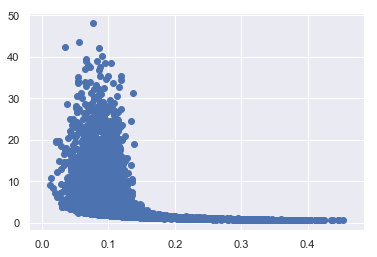

<Figure size 432x288 with 0 Axes>

In [168]:
plt.scatter(n_arr4, y_arr4)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

save_result("Adam_1650315215", plt, n_arr1, y_arr1)

In [78]:
# Adam_1656972820   / 7 crit
a, b, y_arr, n_arr = v4_prepare_data_from_files('Adam_1656972820', 0.5)
print(a, b)

1      [0, 47.13994808018766, 0.1, 1.0, 382051.31507782073]
0.28862872172659815
0 || 0.6458308599618543 || 1 || 1 
1      [0, 58.32784865967895, 0.5, 1.0, 96648.38426142427]
0.25327617477735265
0 || 0.7297070955239189 || 1 || 1 
1      [0, 9.149950781413645, 1.0, 1.0, 86722.57177115828]
0.24544083384144993
0 || 0.762984832474856 || 1 || 1 
1      [0, 93.04743262611485, 1.0, 1.0, 616450.4189986553]
0.2630156261912161
0 || 0.6050530832311074 || 1 || 1 
1      [0, 34.223731059577055, 1.0, 1.0, 794567.5021002488]
0.22377641364931236
0 || 0.5749125536115504 || 1 || 1 
1      [1, 11.832029195739535, 0.0, 1.0, 363135.4124757038]
0.2569498618787443
1 || 0.6881926190069545 || 1 || 1 
1      [1, 70.35290038400322, 0.0, 1.0, 417910.01218459377]
0.26211164365473516
1 || 0.6231312123138022 || 1 || 1 
1      [1, 35.049346450542906, 0.0, 1.0, 440961.18112507573]
0.26235448481283713
1 || 0.6514932168571692 || 1 || 1 
1      [1, 45.83840080423218, 1.0, 1.0, 379288.6827487512]
0.21943952813123077
1 || 0

0.23130757730221768
14 || 0.69267041476924 || 1 || 1 
1      [14, 86.17892706999541, 0.0, 1.0, 359308.0543735049]
0.23850087697060898
14 || 0.6463509936858337 || 1 || 1 
1      [14, 97.4588083552743, 0.0, 1.0, 806395.7877511041]
0.24244912295012253
14 || 0.5829724051355384 || 1 || 1 
1      [14, 36.03716963686859, 1.0, 1.0, 955413.4238264062]
0.17490681532327562
14 || 0.558724029162154 || 1 || 1 
1      [15, 50.946893460642194, 0.5, 1.0, 347124.8880939541]
0.26735378668261295
15 || 0.6200696819460076 || 1 || 1 
1      [15, 47.66155164187262, 0.0, 1.0, 304998.0038140161]
0.22452931798075082
15 || 0.6386781262114519 || 1 || 1 
1      [15, 64.87554095740056, 0.5, 1.0, 311162.70347887557]
0.26594921776030367
15 || 0.6796962026185004 || 1 || 1 
1      [15, 24.768442121908073, 1.0, 1.0, 102090.13967895217]
0.2676936630205974
15 || 0.7372864503214098 || 1 || 1 
1      [15, 70.55588447492141, 0.5, 1.0, 435583.7275368697]
0.21500905777890061
15 || 0.6223977062141635 || 1 || 1 
1      [16, 25.70

0.3291679596953368
28 || 0.7163001402846285 || 1 || 1 
1      [28, 90.57454691865736, 0.5, 1.0, 374951.388101637]
0.25528934840585704
28 || 0.6394018516701263 || 1 || 1 
1      [28, 43.40583427737923, 0.5, 1.0, 202548.62590375877]
0.2178703827266347
28 || 0.6527010095562998 || 1 || 1 
1      [29, 65.98840216451694, 0.5, 1.0, 434166.9338681679]
0.2932674469917054
29 || 0.6446122177014226 || 1 || 1 
1      [29, 34.93984350529553, 0.5, 1.0, 132249.17835956195]
0.2503597572381891
29 || 0.7089894613723338 || 1 || 1 
1      [29, 67.14066322217552, 0.1, 1.0, 1114019.5707368297]
0.14803402278153605
29 || 0.5451353336410234 || 1 || 1 
1      [29, 47.323247640655346, 0.0, 1.0, 945285.1856419599]
0.18674717544607083
29 || 0.5719342737336994 || 1 || 1 
1      [29, 53.212556980895776, 0.0, 1.0, 1110540.8792001219]
0.11599184831195494
29 || 0.5474379173974598 || 1 || 1 
1      [30, 98.86773384670045, 0.5, 1.0, 207722.98667034105]
0.3007889697075568
30 || 0.7132057533760573 || 1 || 1 
1      [30, 71.

0.2594263903532264
42 || 0.6468742181108049 || 1 || 1 
1      [42, 36.19784562419904, 1.0, 1.0, 1235791.7843090391]
0.1319270496297407
42 || 0.5430491648957244 || 1 || 1 
1      [43, 42.910441794675414, 0.0, 1.0, 602758.2414261086]
0.2452190586150078
43 || 0.5915014876413497 || 1 || 1 
1      [43, 93.47304721172877, 0.1, 1.0, 118310.73010130925]
0.3213177426879992
43 || 0.8231907906026718 || 1 || 1 
1      [43, 27.389297842289118, 0.5, 1.0, 1596472.720470725]
0.09845730107013263
43 || 0.5341023082316633 || 1 || 1 
1      [43, 18.455204646610618, 0.1, 1.0, 257701.29309285924]
0.30494438728107276
43 || 0.6437037871445381 || 1 || 1 
1      [43, 75.0878209600032, 1.0, 1.0, 339606.78647269553]
0.2561873816284794
43 || 0.6592247713746816 || 1 || 1 
1      [44, 13.121732065741515, 1.0, 1.0, 1104817.053377625]
0.15801341087291873
44 || 0.5534198319318056 || 1 || 1 
1      [44, 24.490485740993723, 1.0, 1.0, 69248.24423225329]
0.28592150422796847
44 || 0.7155711405753842 || 1 || 1 
1      [44, 4

0.14350894103188436
56 || 0.5340274199002477 || 1 || 1 
1      [57, 49.763368743841006, 1.0, 1.0, 273784.9461755874]
0.2739954899924389
57 || 0.6457476905153802 || 1 || 1 
1      [57, 99.5152942978262, 0.5, 1.0, 226079.5436270312]
0.2735512593949784
57 || 0.6880293333536159 || 1 || 1 
1      [57, 22.23074059638717, 0.5, 1.0, 1541823.8530972248]
0.12459086078328031
57 || 0.5348804474121068 || 1 || 1 
1      [57, 41.97768587944552, 1.0, 1.0, 1044044.717873895]
0.13404846226062775
57 || 0.5517654663930467 || 1 || 1 
1      [57, 42.81600782097025, 0.1, 1.0, 213032.49409360418]
0.2962989054634791
57 || 0.7088185193858666 || 1 || 1 
1      [58, 57.61917056654639, 1.0, 1.0, 746740.0977788867]
0.23879313474286004
58 || 0.5837535552486117 || 1 || 1 
1      [58, 74.35233318796696, 0.0, 1.0, 1268942.336165446]
0.10949549135821322
58 || 0.5397222920888813 || 1 || 1 
1      [58, 93.46656674817034, 0.1, 1.0, 273719.8633868063]
0.2501421003657111
58 || 0.6690124392612672 || 1 || 1 
1      [58, 36.493

0.2485149614338253
71 || 0.7137583219458227 || 1 || 1 
1      [71, 39.42920655353935, 0.5, 1.0, 1063349.492227967]
0.1763992263203018
71 || 0.5551794012064625 || 1 || 1 
1      [71, 35.445201307300366, 0.5, 1.0, 109812.51961901248]
0.25891547763055567
71 || 0.7144590506520411 || 1 || 1 
1      [71, 97.81341861484826, 0.0, 1.0, 325515.7137480482]
0.2461753496285424
71 || 0.6446106560804499 || 1 || 1 
1      [72, 67.83311882166328, 0.0, 1.0, 133598.58659939806]
0.29239407337718454
72 || 0.6902309959495266 || 1 || 1 
1      [72, 44.31703530904625, 0.1, 1.0, 64791.454842292165]
0.24157989764651064
72 || 0.7135767323248533 || 1 || 1 
1      [72, 85.46348090619378, 0.1, 1.0, 60595.164540410886]
0.2891656315852256
72 || 0.7758054838723023 || 1 || 1 
1      [72, 11.976231645052144, 1.0, 1.0, 1093791.7151163192]
0.1624907917517087
72 || 0.5583549536446408 || 1 || 1 
1      [72, 17.72553618764514, 1.0, 1.0, 580218.9766468963]
0.241296093997913
72 || 0.6123023632558824 || 1 || 1 
1      [73, 96.9

0.23209933161619906
85 || 0.679290194201477 || 1 || 1 
1      [86, 33.57399816211228, 1.0, 1.0, 344329.06063615606]
0.24562594299681
86 || 0.6536091082067488 || 1 || 1 
1      [86, 55.78406099532681, 0.0, 1.0, 570420.2500065297]
0.2487820540315761
86 || 0.5940083908766811 || 1 || 1 
1      [86, 13.967894456426594, 0.0, 1.0, 787728.9451691533]
0.19877696473836098
86 || 0.5805784655173082 || 1 || 1 
1      [86, 65.11943497576772, 0.0, 1.0, 61312.73679340078]
0.2664780842463104
86 || 0.7271042848434988 || 1 || 1 
1      [86, 84.10925043777236, 0.5, 1.0, 100902.84472640199]
0.29119288130725796
86 || 0.8118175743987132 || 1 || 1 
1      [87, 90.94889352448345, 0.0, 1.0, 516100.606755517]
0.2559553657801855
87 || 0.6331359743616926 || 1 || 1 
1      [87, 81.13094387060099, 1.0, 1.0, 1168671.001262274]
0.14364291205500287
87 || 0.5521967149599326 || 1 || 1 
1      [87, 58.83816858485771, 0.0, 1.0, 110983.68960000161]
0.2381976291431817
87 || 0.691852992513857 || 1 || 1 
1      [87, 40.7795675

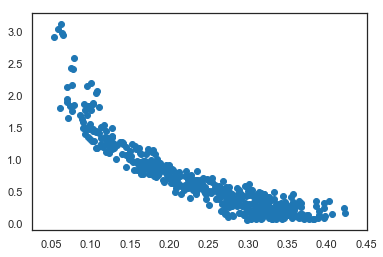

In [64]:
plt.scatter(n_arr, y_arr)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

#save_result("Adam_1650319683", plt, n_arr1, y_arr1)

In [117]:
# Adam_1656982584   / 9 crit "with lambda = ||mu||"
a8, b8, y_arr8, n_arr8 = v4_prepare_data_from_files('Adam_1656982584', 0.2)
print(a8, b8)

0      [0, 32.75711020443774, 0.0, 0.0, 191701.12632767644]
0.25804903140040786 0.756524862045336
0 || 0.756524862045336 || 0 || 0 
1      [0, 22.839043521305335, 0.1, 1.0, 685888.570815393]
0.14347712460465278 0.5933648534016976
0 || 0.5933648534016976 || 1 || 1 
0      [0, 5.907566878313153, 0.0, 0.0, 358728.1428420071]
0.21464324558620412 0.6403611123189608
0 || 0.6403611123189608 || 0 || 0 
1      [0, 37.03223149083259, 1.0, 1.0, 236096.83257197638]
0.25223272554884746 0.7425706744214176
0 || 0.7425706744214176 || 1 || 0 
0      [0, 46.16662812920102, 0.5, 0.0, 113588.93224397363]
0.2381765822414605 0.7591952986290574
0 || 0.7591952986290574 || 0 || 0 
0      [1, 41.462208721501334, 0.5, 0.0, 299064.0917585988]
0.2646168868523052 0.7185615290291583
1 || 0.7185615290291583 || 0 || 0 
0      [1, 52.56631931569792, 0.0, 0.0, 1014794.3006981114]
0.15118450635566805 0.568759861978465
1 || 0.568759861978465 || 0 || 0 
0      [1, 99.38661780827599, 0.0, 0.0, 1278344.452750818]
0.097587281

0.1814948526026971 0.6075308673851444
12 || 0.6075308673851444 || 0 || 0 
0      [12, 66.9931786606154, 0.0, 0.0, 557653.0844943048]
0.19750068300080695 0.608419112758632
12 || 0.608419112758632 || 0 || 0 
0      [12, 83.52345538437503, 0.5, 0.0, 1004300.0217542549]
0.10236327340105256 0.561251403055367
12 || 0.561251403055367 || 0 || 0 
0      [13, 45.74166887042469, 0.1, 0.0, 336938.5132067069]
0.2559494170164063 0.7008517212226792
13 || 0.7008517212226792 || 0 || 0 
0      [13, 36.00616762774605, 0.1, 0.0, 350389.7368598086]
0.20223355371301965 0.6770572362251804
13 || 0.6770572362251804 || 0 || 0 
0      [13, 16.13460910509107, 0.5, 0.0, 165689.51335277455]
0.24776509998165436 0.7632048666366159
13 || 0.7632048666366159 || 0 || 0 
0      [13, 41.67348865928061, 0.0, 0.0, 1455477.7050047829]
0.09455633258137092 0.5420875997003056
13 || 0.5420875997003056 || 0 || 0 
0      [13, 31.293902025113823, 0.5, 0.0, 82426.06173304425]
0.2448757585229555 0.8072218295920178
13 || 0.807221829592

0.24144083774739622 0.7222092434267127
24 || 0.7222092434267127 || 1 || 0 
1      [24, 63.74151862183219, 0.5, 1.0, 148322.98701460424]
0.2717118238093466 0.7509613031176111
24 || 0.7509613031176111 || 1 || 0 
0      [25, 48.830407745784896, 1.0, 0.0, 347228.5180041885]
0.22880987600298042 0.7076183111021402
25 || 0.7076183111021402 || 0 || 0 
0      [25, 60.565771704297276, 1.0, 0.0, 87705.19421858553]
0.2841715221306197 0.8217875699484315
25 || 0.8217875699484315 || 0 || 0 
0      [25, 63.030667301496926, 0.1, 0.0, 137657.38177227235]
0.27322086314287986 0.7270168282352082
25 || 0.7270168282352082 || 0 || 0 
0      [25, 35.93568690138187, 0.1, 0.0, 460813.713306078]
0.21829558485177714 0.6544370918093367
25 || 0.6544370918093367 || 0 || 0 
1      [25, 15.960093030274697, 1.0, 1.0, 246912.36765341766]
0.20594321765012208 0.6891410080361513
25 || 0.6891410080361513 || 1 || 0 
0      [26, 25.24471187134514, 0.1, 0.0, 84977.47002238545]
0.28812443583111674 0.7863732711972955
26 || 0.7863

0.21350657051753816 0.646454686328145
36 || 0.646454686328145 || 1 || 0 
0      [37, 59.47673223884002, 0.5, 0.0, 345284.88882020203]
0.2679908808515236 0.6934253450787388
37 || 0.6934253450787388 || 0 || 0 
0      [37, 34.711407379870494, 0.1, 0.0, 143339.76537463279]
0.27393476468244315 0.7319064651359012
37 || 0.7319064651359012 || 0 || 0 
1      [37, 6.743635068022913, 1.0, 1.0, 766444.4050764074]
0.1746012594789257 0.5879577818000311
37 || 0.5879577818000311 || 1 || 1 
1      [37, 42.22257567858999, 0.5, 1.0, 3655393.1241925233]
0.04338662858723281 0.5115804749559171
37 || 0.5115804749559171 || 1 || 1 
0      [37, 50.71113221524938, 0.1, 0.0, 971553.536361415]
0.11465474496021108 0.5599245650651276
37 || 0.5599245650651276 || 0 || 0 
0      [38, 24.387444459400243, 0.0, 0.0, 278749.4864978897]
0.20311377449004542 0.698991612386087
38 || 0.698991612386087 || 0 || 0 
0      [38, 5.013173475888783, 0.0, 0.0, 429825.4617850584]
0.27798330161176676 0.6670392791563171
38 || 0.6670392791

0.1311208983661388 0.5583618190437813
49 || 0.5583618190437813 || 0 || 0 
0      [49, 33.52009880148002, 0.0, 0.0, 64137.395152997095]
0.277203565508018 0.798291423990867
49 || 0.798291423990867 || 0 || 0 
0      [49, 20.820976170410038, 1.0, 0.0, 449046.5202412104]
0.17425959084490317 0.6136257637370315
49 || 0.6136257637370315 || 0 || 0 
0      [49, 51.549223112645336, 0.0, 0.0, 364573.3465633954]
0.2072719071077261 0.6961490036973575
49 || 0.6961490036973575 || 0 || 0 
0      [49, 88.14982741870767, 0.1, 0.0, 1122524.0559427661]
0.13479608148719222 0.5591359681808011
49 || 0.5591359681808011 || 0 || 0 
1      [50, 45.38787395281666, 0.5, 1.0, 281123.0291325235]
0.21969583134503584 0.6542490051723715
50 || 0.6542490051723715 || 1 || 0 
0      [50, 88.04123839447541, 0.0, 0.0, 282577.66831737675]
0.19936185699156042 0.692230991889687
50 || 0.692230991889687 || 0 || 0 
0      [50, 12.94686932077368, 0.1, 0.0, 190004.74865415052]
0.2533955491189212 0.7416480975011138
50 || 0.74164809750

0.09053829448979406 0.5464732976843143
61 || 0.5464732976843143 || 0 || 0 
0      [61, 69.75230452092964, 0.5, 0.0, 191517.32633251642]
0.22514336791190878 0.747762840622068
61 || 0.747762840622068 || 0 || 0 
0      [61, 92.82388843117783, 0.0, 0.0, 343832.41564629844]
0.2626290099415562 0.660854298180128
61 || 0.660854298180128 || 0 || 0 
0      [62, 8.563131920444416, 0.0, 0.0, 990700.1663676488]
0.11928966285802851 0.5726375020401906
62 || 0.5726375020401906 || 0 || 0 
0      [62, 80.44173458530966, 1.0, 0.0, 358909.80044042075]
0.2727597264709375 0.7073249817142062
62 || 0.7073249817142062 || 0 || 0 
0      [62, 63.75905423488821, 0.5, 0.0, 1547644.164645547]
0.08514459074765372 0.5360986617348531
62 || 0.5360986617348531 || 0 || 0 
0      [62, 24.523361214949173, 1.0, 0.0, 731364.6639732448]
0.141407628026383 0.5840584293816868
62 || 0.5840584293816868 || 0 || 0 
0      [62, 0.5070563778276416, 1.0, 0.0, 1586219.5093482202]
0.09164564348085052 0.5364652433419975
62 || 0.5364652433

0.17387611323252575 0.5905774952658528
73 || 0.5905774952658528 || 0 || 0 
1      [74, 8.152436790059742, 0.1, 1.0, 713712.9273205147]
0.16200443727555228 0.6000823701814675
74 || 0.6000823701814675 || 1 || 1 
0      [74, 86.98505484947114, 1.0, 0.0, 260720.27064083386]
0.2715985337283674 0.7677208901239332
74 || 0.7677208901239332 || 0 || 0 
0      [74, 4.888512088769942, 0.0, 0.0, 386072.0500040443]
0.24123252038053566 0.6852020602006247
74 || 0.6852020602006247 || 0 || 0 
0      [74, 4.934799933404688, 1.0, 0.0, 213944.97618174856]
0.2828057992301283 0.7399220641940909
74 || 0.7399220641940909 || 0 || 0 
0      [74, 17.56330455556358, 0.1, 0.0, 163432.50721451722]
0.20210328453607393 0.7149063329838211
74 || 0.7149063329838211 || 0 || 0 
0      [75, 11.74311540170736, 0.5, 0.0, 287856.03383986506]
0.20758110591193804 0.6650153667184421
75 || 0.6650153667184421 || 0 || 0 
1      [75, 87.43835609148388, 0.0, 1.0, 272989.73561087484]
0.21501995664377913 0.7023090450865875
75 || 0.70230

0.13421314087633368 0.556562146384971
86 || 0.556562146384971 || 0 || 0 
1      [86, 60.46836261676335, 0.1, 1.0, 453212.11190877564]
0.2586964609377893 0.6239603592191988
86 || 0.6239603592191988 || 1 || 0 
1      [86, 99.6442440546212, 0.5, 1.0, 74483.96251176303]
0.28846835720466407 0.768193736964644
86 || 0.768193736964644 || 1 || 0 
0      [86, 68.19186816495562, 1.0, 0.0, 532172.0779868526]
0.2304781968233175 0.63044282831359
86 || 0.63044282831359 || 0 || 0 
1      [87, 1.2260471935755635, 0.1, 1.0, 847105.9222871094]
0.12827656408152593 0.5688523172269492
87 || 0.5688523172269492 || 1 || 1 
0      [87, 49.4970674382, 1.0, 0.0, 1232817.5320199458]
0.1223688553192161 0.5475078016292579
87 || 0.5475078016292579 || 0 || 0 
0      [87, 96.51602768543552, 1.0, 0.0, 452979.96673193143]
0.23410558914629137 0.6483227203636523
87 || 0.6483227203636523 || 0 || 0 
0      [87, 34.76191285946224, 0.1, 0.0, 497084.19015833654]
0.23096596366078082 0.650952997062478
87 || 0.650952997062478 || 0

0.3861171269216485 0.7888305767108629
98 || 0.7888305767108629 || 1 || 0 
1      [98, 10.26950835968934, 0.1, 1.0, 767310.5703339339]
0.15794988247861078 0.5883056627619528
98 || 0.5883056627619528 || 1 || 1 
0      [99, 64.75569580346104, 0.1, 0.0, 75642.90371377321]
0.2333741310814088 0.7680682706557612
99 || 0.7680682706557612 || 0 || 0 
1      [99, 71.79870811021848, 0.5, 1.0, 834142.5276465679]
0.1417453450287572 0.5615380234463574
99 || 0.5615380234463574 || 1 || 1 
0      [99, 99.08327097176158, 0.5, 0.0, 495736.8089038433]
0.23917361809470755 0.6581751956863742
99 || 0.6581751956863742 || 0 || 0 
1      [99, 16.968796454777856, 1.0, 1.0, 926926.7078705828]
0.1190289234093455 0.5794595597081426
99 || 0.5794595597081426 || 1 || 1 
0      [99, 90.4793865554133, 0.5, 0.0, 493203.36232482817]
0.18692072394596526 0.6139764061028221
99 || 0.6139764061028221 || 0 || 0 
tp= 67 fp= 186 fn= 66 tn= 181
ttp= 67 tfp= 186 tfn= 66 ttn= 181
0.2648221343873518 0.5037593984962406 0.496
0.26482213

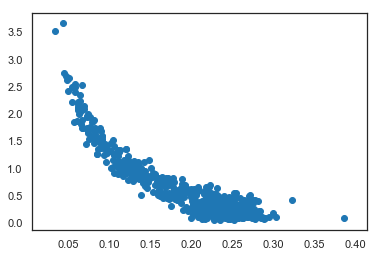

In [118]:
n_arr88, y_arr88 = [], []
for u,v in zip(n_arr8, y_arr8):
    if  v <= 900000:
        y_arr88 += [v]
        n_arr88 += [u]
        
plt.scatter(n_arr88, y_arr88)
#plt.xlabel("noise")
#plt.ylabel("y")
plt.show()

#save_result("Adam_1650301481", plt, n_arr1, y_arr1)

In [ ]:
# Adam_1642238587   / 10 crit
a10, b10, y_arr10, n_arr10 = v4_prepare_data_from_files('Adam_1642238587', 0.5)
print(a10, b10)

In [ ]:
plt.scatter(n_arr10, y_arr10)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

5.460887907233937 2.366892315975944
5.460887907233937 2.366892315975944


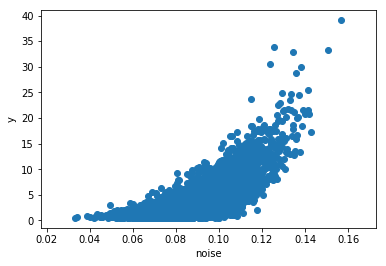

In [11]:
y_data = []
# recover data from test_file
with open(f'plots/Adam_1642206165/test_Adam_1642206165.csv', mode='r', newline='') as csv_data:
    csv_reader = csv.DictReader(csv_data)
    for row in csv_reader:
        y_data += [float(row["y_data"])]
        
print(y_data[0], y_data[-1])
y_data = [y_data[i] for i in range(0, len(y_data), 6)]
print(y_data[0], y_data[-1])

n_arr = [1 / i for i in n_arr]
plt.scatter(n_arr, y_data)
plt.xlabel("noise")
plt.ylabel("y")
plt.show()

## mu_noise = mean_noise_model + random_cov_noise_mosel (maximizing proba of prefering) 

In [15]:
experiments = ['Adam_1641213964', 'Adam_1641214341',
               'Adam_1641217332', 'Adam_1641232385', 'Adam_1641233437', 'Adam_1641219223',
                'Adam_1641220665', 'rmsprop_1641322755',]

## mu_noise = mean_noise_model

In [241]:
v2_total_accuracy = []
v2_vol_accu = []
v2_vol_gt = []
for name in experiments:
    v2_acc_, v2_vol_, v2_vol_gt_ = v2_prepare_data_from_files(name, 0.5)
    v2_total_accuracy +=[v2_acc_]
    v2_vol_accu += [v2_vol_]
    v2_vol_gt += [v2_vol_gt_]

print(v2_total_accuracy)
print(v2_vol_accu)
print(v2_vol_gt)

v2_ratio = [v2_vol_accu[i] / v2_vol_gt[i] for i in range(len(v2_vol_accu))]
v2_ratio 

[0.6047094188376754, 0.6142284569138277, 0.6002004008016032, 0.4343687374749499, 0.4188376753507014, 0.8391783567134269, 0.4185129625355797, 0.42041704170417044]
[0.05861723446893788, 0.0531062124248497, 0.05410821643286573, 0.10070140280561123, 0.09218436873747494, 0.003006012024048096, 0.09285329640741595, 0.09625962596259625]
[0.35120240480961923, 0.34468937875751504, 0.34318637274549096, 0.6067134268537074, 0.6152304609218436, 0.02555110220440882, 0.6174705746595892, 0.6173617361736173]


In [114]:
def v3_prepare_data_from_files(experiment_name, vol_factor, pref=0):
    user_vol_dic = []
    uid_vol_arr = []
    rating_arr =[]
    weights_arr = []
    one_vol_list = []
    y_data = []

    # recover data from test_file
    with open(f'plots/{experiment_name}/test_{experiment_name}.csv', mode='r', newline='') as csv_data:
        csv_reader = csv.DictReader(csv_data)
        for row in csv_reader:
            uid_vol_arr += [int(row["user_ID"])]
            rating_arr += [float(row["rating"])]
            one_vol_list += [float(row["volition"])]
            weights_arr += [float(row["weight"])]
            y_data += [float(row["y_data"])]


    assert len(uid_vol_arr) == len(rating_arr) == len(one_vol_list) == len(weights_arr)



    test_vol_dic = [[uid_vol_arr[i], rating_arr[i], weights_arr[i], one_vol_list[i], y_data[i]] 
                    for i in range(len(uid_vol_arr))]
    # recover result data from results_name.txt file
    
    with open(f'plots/{experiment_name}/results_{experiment_name}.txt', "r") as text_data:
        count = 0
        vol_arr_users= []
        for line in text_data:
            if count == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                mu = temp.astype(np.float)
            if count == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('[')[1].strip().split(']')[0].strip().split(','))
                cv = temp.astype(np.float)
            if count >= 5 and pref == 0:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[0].strip().split('([')[1].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            if count >= 5 and pref == 1:
                temp = line.strip().split(':')
                temp = np.array(temp[1].strip().split('],')[1].strip().split('[')[1].strip().split('])')[0].strip().split(','))
                temp = temp.astype(np.float)
                vol_arr_users += [temp]
            count += 1
    # exploit results and generate metrics
    cv = cv * np.eye(len(mu))
    user_accuracy = []
    cnt = 0
    nb_vol_gt = 0
    tp, tn, fp, fn = 0, 0 , 0, 0
    ttp, ttn, tfp, tfn = 0, 0, 0, 0
    cnt = 0
    print(" max_proba_rating || test_vol_gt || model_vol_pred || volition_accuracy")

    for i in range(len(test_vol_dic)):
        uid = test_vol_dic[i][0]
        #r2 = rescale_rating([test_vol_dic[i][1]])
        r2 = [test_vol_dic[i][1]]
        weight = test_vol_dic[i][2]        
        vol = int(test_vol_dic[i][3])
        y_data = test_vol_dic[i][4]
        noises = sc.random.multivariate_normal(mean=mu, cov=cv, size=1000)
        user_pref = vol_arr_users[uid] + noises
        bradely = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        y = [sc.stats.expon.pdf(y_data, loc=0.5, scale=np.linalg.norm(i)) for i in noises]
        proba_noises = [sc.stats.multivariate_normal.pdf(i, mean=mu, cov=cv) for i in noises]
        dens = [sc.special.expit(bradely[i] * y[i] * proba_noises[i]) for i in range(len(noises))]
        #dens = [1/(1+np.exp(-weight * i * r2[0])) for i in user_pref]
        max_index = np.argmax(np.array(dens))
        #print(vol_arr_users[uid], user_pref[max_index])
        quotient = np.linalg.norm(noises[max_index]) / len(noises[max_index])
        #if bradely[max_index] > 0.5:
        vol_positif = 0

        if quotient <= vol_factor:
            if vol == 1:
                ttp += 1
                vol_positif = 1
            else:
                tfp += 1
        else:
            if vol == 0:
                ttn += 1
            else:
                tfn += 1
            
        if dens[max_index][0] > 0.5:
            if quotient <= vol_factor:
                if vol == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if vol == 0:
                    tn += 1
                else:
                    fn += 1

            
            if vol == 1:
                nb_vol_gt += 1
        print(bradely[max_index], proba_noises[max_index], y[max_index])
        print(f"{uid} || {dens[max_index][0]}") #"|| {vol} || {vol_positif} ")
        
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    tprecision = ttp / (ttp + tfp)
    trecall = ttp / (ttp + tfn)
    taccuracy = (ttp + ttn) / (ttp + ttn + tfp + tfn)
    
    nb_vol_gt = nb_vol_gt / (len(test_vol_dic))
    print("_____________________________________________________________\n")
    return (precision, recall, accuracy), (tprecision, trecall, taccuracy)